In [19]:
import tweepy
from tweepy import OAuthHandler
import csv
import pandas as pd
import re 
import tweepy 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
import emoji
import pandas as pd
from string import punctuation 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\60112\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\60112\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
def clean_text(text):
  #lower case the text
  text = text.lower()
  # Removes all mentions (@username) from the tweet since it is of no use to us
  text = re.sub(r'(@[A-Za-z0-9_]+)', ' ', text)
    
  # Removes any link in the text
  text = re.sub('http://\S+|https://\S+', ' ', text)

  # Removes the word "rt" 
  #text = re.sub(r'\brt\b', ' ', text).strip()
  
   # Removes the word "mobile" and 'phone' and brands name cause it appears too many times that might affect topic modelli

  # Only considers the part of the string with char between a to z or digits and whitespace characters
  # Basically removes punctuation
  text = re.sub(r'[^\w\s]', ' ', text)

  #remove number
  text = ''.join([i for i in text if not i.isdigit()])

  #remove emoji
  text = emoji.demojize(text, language ='en')

  # Removes stop words 
  text_tokens = word_tokenize(text)
  text = [word for word in text_tokens if not word in stopwords.words()]
  text = [word for word in text if not word in punctuation]

  text = ' '.join(text)
  return text

In [40]:
df = pd.read_csv('industry1_data.csv')

In [41]:
df

Author                 Date  \
0      Jessica Santos  2021-10-29 16:41:32   
1               imoke  2021-10-29 16:41:32   
2                  QR  2021-10-29 16:41:31   
3                John  2021-10-29 16:41:31   
4               Alvin  2021-10-29 16:41:31   
...               ...                  ...   
49995      Omkar Raut  2021-10-29 08:41:23   
49996            Loop  2021-10-29 08:41:23   
49997       CaptKavey  2021-10-29 08:41:22   
49998      Linda Ford  2021-10-29 08:41:22   
49999    Cardy Camara  2021-10-29 08:41:21   

                                                    Text  
0      I’m so sick of typing the word ON and my phone...  
1      @ixavieruncle @bernamasoed Same energy when in...  
2           not my professor asking sb to call her phone  
3      @BlueBoop1 yes i hear the 3 nano chip injectio...  
4      @nikewrayy That actually looks awesome if that...  
...                                                  ...  
49995  Godrej family looks to divide a $4.1 billion e...  
49996       @BigweeroundJohn This was my first phone too  
49997  @Candice_OwO @YkYkReZz1 @Spaceraptor18 @RealBo...  
49998  @protectyrbubble Couple of years ago I was cle...  
49999  I just powered DreamLab for 11 hours, 15 minut...  

[50000 rows x 3 columns]

In [42]:
tweets = []

tweets = df['Text'].tolist()

In [43]:
cleaned_text = []

for tweet in tweets:
  cleaned_text.append(clean_text(tweet))

print(cleaned_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [46]:
cleaned_text.to_csv("clean.csv")

AttributeError: 'list' object has no attribute 'to_csv'

In [47]:
cleaned_tweets = list(dict.fromkeys(cleaned_text))
with open('cleaned_tweets.txt', 'w',encoding="utf-8") as f:
    for item in cleaned_tweets:
        f.write("%s\n" % item)

In [49]:
fields = ['Tweets'] 

In [52]:
with open('Tweets.csv', 'w',encoding="utf-8") as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(cleaned_text)

In [44]:
#df['clean_text'] = df['Text'].apply(lambda x: clean_text(x))
#df['clean_text']

In [57]:
import numpy as np

np.savetxt("industry_Tweets.csv", 
           cleaned_text,
           delimiter =", ", 
           fmt ='% s',encoding="utf-8")

In [53]:
cleaned_text

['sick typing word phone changing like makes looks stupid',
 'energy insert phone carger',
 'professor asking sb call phone',
 'yes hear nano chip injection far reliable monitoring every move thought smartphone',
 'actually looks awesome phone',
 'proud announce expanding writing team cover great mobile games like stay tuned news',
 'clearly turned switch play game scroll phone smh',
 'hi shreya would like help kindly connect us via dm along registered mobile number assist priority',
 'phone better',
 'phone calls essential parents prison predatory telecom companies making harder gouging prices pass martha wright reed act keep families connected',
 'four months attempts get warranty replacement phone work five lines cancel today customer two decades get resolution anyone escalate help tried everything',
 'waiting phone',
 'dude took phone send science slides pretty sure saw looking lesbian fanart cant breathe',
 'wow really equate self custody using centrally controlled mobile app',
 '

In [58]:
dict = {'Tweets': cleaned_text}

In [61]:
df1 = pd.DataFrame(dict) 
    
# saving the dataframe 
df1.to_csv('phone_tweets.csv',index=False)

In [25]:
df

Author                 Date  \
0      Jessica Santos  2021-10-29 16:41:32   
1               imoke  2021-10-29 16:41:32   
2                  QR  2021-10-29 16:41:31   
3                John  2021-10-29 16:41:31   
4               Alvin  2021-10-29 16:41:31   
...               ...                  ...   
49995      Omkar Raut  2021-10-29 08:41:23   
49996            Loop  2021-10-29 08:41:23   
49997       CaptKavey  2021-10-29 08:41:22   
49998      Linda Ford  2021-10-29 08:41:22   
49999    Cardy Camara  2021-10-29 08:41:21   

                                                    Text  
0      I’m so sick of typing the word ON and my phone...  
1      @ixavieruncle @bernamasoed Same energy when in...  
2           not my professor asking sb to call her phone  
3      @BlueBoop1 yes i hear the 3 nano chip injectio...  
4      @nikewrayy That actually looks awesome if that...  
...                                                  ...  
49995  Godrej family looks to divide a $4.1 billion e...  
49996       @BigweeroundJohn This was my first phone too  
49997  @Candice_OwO @YkYkReZz1 @Spaceraptor18 @RealBo...  
49998  @protectyrbubble Couple of years ago I was cle...  
49999  I just powered DreamLab for 11 hours, 15 minut...  

[50000 rows x 3 columns]

In [661]:
import pandas as pd

%matplotlib inline
from textblob import TextBlob, Word
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
import re
#stopwords = nltk.corpus.stopwords.words('English')
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tweets_df= pd.read_csv('phone_tweets.csv')

In [191]:
def get_noun_phrases(text):
    pos = pos_tag(word_tokenize(text))
    count = 0
    half_chunk = ""
    for word, tag in pos:
        if re.match(r"NN.*", tag):
            count+=1
            if count>=3:
                half_chunk = half_chunk + word + " "
        else:
            half_chunk = half_chunk+"---"
            count = 0
    half_chunk = re.sub(r"-+","?",half_chunk).split("?")
    half_chunk = [x.strip() for x in half_chunk if x!=""]
    return half_chunk

In [193]:
df_list= tweets_df['Tweets'].to_list()
test_list = list(filter(None, df_list))
# Convert array of comments into a single string
comments = TextBlob(''.join(str(test_list)))

In [197]:
tweets_noun = []
count = 0
for text in test_list:
    print("count",count+1,": ",text)
    tweets_noun.append(get_noun_phrases(str(text)))
    count+=1
    #for i in tweets_noun:
        #print("count",count+1,": ",i)
        #count+=1

count 1 :  sick typing word phone changing like makes looks stupid
count 2 :  energy insert phone carger
count 3 :  professor asking sb call phone
count 4 :  yes hear nano chip injection far reliable monitoring every move thought smartphone
count 5 :  actually looks awesome phone
count 6 :  proud announce expanding writing team cover great mobile games like stay tuned news
count 7 :  clearly turned switch play game scroll phone smh
count 8 :  hi shreya would like help kindly connect us via dm along registered mobile number assist priority
count 9 :  phone better
count 10 :  phone calls essential parents prison predatory telecom companies making harder gouging prices pass martha wright reed act keep families connected
count 11 :  four months attempts get warranty replacement phone work five lines cancel today customer two decades get resolution anyone escalate help tried everything
count 12 :  waiting phone
count 13 :  dude took phone send science slides pretty sure saw looking lesbian 

count 155 :  searching phone team threw away
count 156 :  lucid lands first real time strategy gaming nft project bsc solidproof audit influencers board graphic team mobile legends gaming studio presale november st official group lucid lands developed ttm group tg
count 157 :  real time view phone battery
count 158 :  yeah everything sort defect got pro yesterday working great far phone complaint slippery haha
count 159 :  yit stuck waiting update abt knows spend time without phone
count 160 :  phone older
count 161 :  got mychart phone
count 162 :  allthefeels phone dropped toilet twice first time placed sink flew luckily rice airing cupboard fixed nd time proper job buried pool blue toilet water sadbuttrue
count 163 :  latoken application protected using google authentication phone stolen two months ago abot withdrawing trx latoken wallet possible due security via google authentication please deactivate fa verification
count 164 :  sir request please share mobile us via dm may raise 

count 313 :  actually poor people give f ck privacy cheap damn phone reality
count 314 :  finally updated call duty mobile back bang ranked multiplayer battle royale whatever taking prisoners codm codmnaija
count 315 :  must smartphone
count 316 :  mobile twitter sucks
count 317 :  bet every time tweet shit pop phone goofy
count 318 :  need phone tells people answer
count 319 :  signed twitter google account add phone number requires enter twitter password never made twitter password signed google account ps help settings ticket link broken
count 320 :  hate people fucking phone talking gym equipment like please get tf bro
count 321 :  actually falls phone scams
count 322 :  friends phone obsessed
count 323 :  please send private message phone number team reach help
count 324 :  called phone check personal rates activate personal account joke x cost smb vs personal account wtf
count 325 :  accidentally took keyboard cord phone charger
count 326 :  get side effect youtube music cause re

count 475 :  hundreds songs phone still play
count 476 :  annoying spend hours hold virginholidays phone cut
count 477 :  silent people voted sir
count 478 :  smartphone selfies screen pancreatic cancer eyetest different roads lead destination
count 479 :  get twitter emoji back please however many times close amp open twitter app poorish old emoji phone appears checked setting chosen twitter emoji inconvenient unabla see twitter emoji loads crosses amp boxes twitteremoji
count 480 :  got new phone pay much attention know would lit uzi set
count 481 :  detained arrest yes read rights please phone call
count 482 :  keeping connected experience power fast reliable g network questions g area teams happy help send us dm marissachavez
count 483 :  phone stupid believe caught typo worked fast delete gt lt
count 484 :  catch phone either
count 485 :  decided called called deliberated phone rang decided heard voice
count 486 :  deal wit somebody going phone invading space
count 487 :  phone
co

count 620 :  roblox youtuber understand everybody struggling right see hope back hours mobile computer well
count 621 :  think gf person doesnt phone go pee
count 622 :  heads sim changed call phone phone notice lads
count 623 :  communicate without phone
count 624 :  mobile fucking bullshit id sooner go without fucking phone try whole process third fucking time
count 625 :  get voice heard phone numbers contact info every house senate easy navigate schooled govt wealth info
count 626 :  sir request please share journey details pnr uts mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline rpf india
count 627 :  sorry help lost contact due phone theft delhi railway corridor azharuddin station know
count 628 :  got caught literal chokehold cuz phone pls
count 629 :  thought phone charged last night shìt percent
count 630 :  voicemail messed years third phone even got new phone contract got message days ago month ago never came hate voicemail anyway
count 63

count 769 :  new month bonus serious person needed sy work home smartphone start earning every hours weekly ask hidden fee charges involved scam serious minded person whatsapp number
count 770 :  fudge ok many tabs open phone
count 771 :  mobile amp rust related stuff
count 772 :  alpha charlie useless phone repeat useless phone
count 773 :  hey tim great hear oh go mines working use iphone trying tapping manage accounts reorder accounts check app tp date restart phone kevin
count 774 :  meaning call week change phone number procrastination taken
count 775 :  phone ducking cracked picture snapchat clock filter tell time
count 776 :  hahahahahahhaa currently got home work shift ended took three whole fucking hours get home public transport fucked fuck around route phone died got lost
count 777 :  dad trying renew grandparents deliver home medication qr code letter work login code provided get phone live close pop sort chance help branch
count 778 :  even knowin two phones sometimes even

count 903 :  gay nigga dmed asking number told phone
count 904 :  bars phone
count 905 :  sign hate fingers phone
count 906 :  well thought laughing joke obviously understand severity situation entirely concerned phone spelling called self esteem future reference
count 907 :  hi help request dm us mobile number assist sivaranjani
count 908 :  let get hands flip phone
count 909 :  gene therapy stop bullshit conspiracy theories literally killing people getting vaccinated us citizens died covid get vaccinated get information newsmax fine
count 910 :  kept bg transparent lt maybe twitter personally hates lt
count 911 :  bigbang bagpack minat sms вв pin cdfe free phone strap
count 912 :  paid wks set get another wks get credit finance food supplies mobile phone broken need work afford buy new got money anyone able help phone cash supplies
count 913 :  damn kids took phone smh
count 914 :  phone got update makes feel like fucking baby luckily sure change hate
count 915 :  phone online class 

count 1003 :  hi sorry know damage pixel requesting contact phone chat support team help better way link rest assured well equipped amp best appreciate ezra
count 1004 :  really knocks book done reading wish author wrote terrific friend could call phone whenever felt like holden caulfield catcher rye
count 1005 :  left phone relatives home another country denmark realised boarding plane cost arm leg shipped back allthefeels
count 1006 :  love make sure magentaconnected promos please dm patrickullmann
count 1007 :  good morning falling behind bills catch already phone turned owe car insurance canceled turn internet means communication help would appreciated kiki
count 1008 :  dream srw cast mobile suit gundam armored trooper votoms tekkaman blade macross plus getter robo armageddon amp arc gunbuster hyper combat unit dangaioh super beast machine god dancouga fang sun dougram
count 1009 :  metrobank mobile app acting
count 1010 :  way illuminate goofiness dichotomy essentially replicates

count 1136 :  flip phone nokia
count 1137 :  put ur phone ur boobs
count 1138 :  sleeve vacuum pump ring penis pumps code buy ဆက သ ယ ရန phone viber telegram website tolimolishop website
count 1139 :  dontbuyasus selling flagship phones faulty motherboard asus call back faulty devices give immediate refund replacement instead asking users submit phone service center
count 1140 :  oh know anyone ever answered newsroom phone knows tbh painful especially current climate
count 1141 :  played literally hopes apex legends future mobile gaming gun switching time bad pubg ns looks like first copy codm br think fix waiting apex legends grind
count 1142 :  degraded battery life always worth fast macbook brick charges phone
count 1143 :  put phone farted waiting reaction
count 1144 :  remember last time used pay phone think twenties yeah memory serves smells like porta potty left sun
count 1145 :  million dollar phone
count 1146 :  saiu masmorra especial halloween crypt monsters ark mobile via
cou

count 1258 :  fuck michael day dreaming phone game kyle mommy mommy mommy mommy universe
count 1259 :  jokes phone
count 1260 :  taron beal height class weight position ol dl school mundy mill high school gpa phone check highlight
count 1261 :  hi mr eksi trying reach jfk cargo office since yesterday supper urgent office matter picks phone freight forwarding team trying avail searching tal came across profile help plz
count 1262 :  phone died scared
count 1263 :  ola drivers mobile hung customers app shows ride progress cost ride linked time catch
count 1264 :  gdluck nabil phone w spams
count 1265 :  stopped texting people first phone ring
count 1266 :  still got use paying phone bill ima start dropping week
count 1267 :  anyone else play tetris app phone
count 1268 :  view seeing phone cameras car
count 1269 :  already jailbroken update altstore phone need use computer
count 1270 :  thank honestly right put phone away hours days thx
count 1271 :  told pretend doctor listening eves dr

count 1388 :  hi manjesh help please share query reference registered mobile number via dm may assist better way thanks
count 1389 :  ios sent phone reboot trying auto fill password day going
count 1390 :  ur fucked drop phone plate bit peanut butter sticks ur immediate thought great less calories thought
count 1391 :  check music pandora
count 1392 :  answer question enhance refine accelerate learning upsc practice get upsc practice mobile app gaana logical prelims premium aspirants
count 1393 :  receipts please posted tweet camera phone
count 1394 :  nowplaying calling phone lil tjay f lack
count 1395 :  called branch attorney general office gave number director vital statistics humans available office talk left message amp phone number
count 1396 :  break phone nie lmfao
count 1397 :  mobile ordering fad poses payments fraud threat
count 1398 :  email phone amp age verified
count 1399 :  playing cross waves radio shadows love barry white tune listen directly audio well phone
count 1

count 1494 :  lafayette police department showing transparency reports yet ms myers answer email officer prevost answer phone calls it_is_mafia_not_a_university
count 1495 :  roblox api services currently mobile pc
count 1496 :  phone middle check fuck
count 1497 :  duo mobile switching side approve deny buttons notifications aggressively petty thing happened year
count 1498 :  makes body phone
count 1499 :  phone yall
count 1500 :  horrible mobile orders
count 1501 :  holding phone reading lmfao
count 1502 :  goes lot hear anything know infact information except phone number
count 1503 :  phone companies offer service called caller id sell anyone call
count 1504 :  idk keep calling text numbers blowin phone day
count 1505 :  dread phone ringing afraid
count 1506 :  omg barely made throught school without phone laptop dying whew
count 1507 :  like repeating nd time courtesy kicking ear rd exist look fucking phone pay attention acknowledge whats happening techtard insulting please sake 

count 1592 :  use phone
count 1593 :  issue videos android phone seeing issue influencers posts something ig annoying
count 1594 :  phone tryna ask rest better
count 1595 :  wish heaven phone would call niggas let know motion moving marathon pace slow steady
count 1596 :  beloved style tweet shoutout dumbshit android windows palmpilot phone whatever people send text normal iphone like normal person without bouncing back whatnot
count 1597 :  pay membership dues installments call ghar office make payments phone make number payments amount long dues paid full ghar realtor dues due date january
count 1598 :  week taxfacts mobile tax service
count 1599 :  pikachu sister somewhere amongst cats questioning begging mom phone let home
count 1600 :  hi edgariscoding welcome social media page based recent post see may need support please send us direct message phone number would happy investigate rose
count 1601 :  emily resurrection friday pray lloyd resurrect today answer phone next thing past

count 1736 :  playing noob army simulator mobile
count 1737 :  time check ammo purchases around area phone calls could shed light people notice people california money
count 1738 :  hoping phone okay working hard babe
count 1739 :  older sis used phone earlier forgot log doomed
count 1740 :  anyone know photo vaccination card phone proof need bring actual card
count 1741 :  paid dollars phone app emulators makes portable anyone pays locked console next version backwards compatible complete rube fit screencap
count 1742 :  hi help request dm us mobile number assist sivaranjani
count 1743 :  voting bear vote
count 1744 :  finally made proxy subdomain specific path server know correct say beginner servers fixed touch events javascript let scroll vertically mobile
count 1745 :  products phone watch earbuds etc however earbuds supposed smaller amp fit better get stay ears old ones plus touch controlled try push back messes settings
count 1746 :  explain took two days multiple reports phone 

count 1830 :  wait phantom mobile would really love phantom support safari
count 1831 :  know new mobile phones looks like typed someone notes regardless clear see favourable decisions eh
count 1832 :  icymi check sampath sowmyanarayan delivering keynote mwcla covering transformational future g network mec addition rima qureshi david limp discussing partnership project kuiper leo view
count 1833 :  got set like phone size tv know work vlive
count 1834 :  main phone takyah pergi husband wife handle suggest kena put effort sikit
count 1835 :  phone made gallery front design conference spoke included fart joke gifs sprinkled every gallery
count 1836 :  yalllllll literally crying laughing cause facetiming phone sneaky shit drunk
count 1837 :  phone pc laptop
count 1838 :  include using location services phone already ok wondering opting basic income going able opt answer still shows still reading thought
count 1839 :  phone even texas
count 1840 :  get notifications anything bc like tied p

count 1960 :  downloaded new pikmin mobile game lools dope
count 1961 :  since getting new phone longer need case lets see goes
count 1962 :  idk paste link feom phone
count 1963 :  oh phone need potatoes power
count 1964 :  literally use phone number
count 1965 :  really understand purpose mobile app placed curbside order everything like said arrived waited minutes ever came canceled order ended going drive
count 1966 :  modern world full distractions mobile computer netflix really need spend time outside nature internet good mindful much time spend
count 1967 :  beloved birthday happy birthday nina ilysm giving hug phone
count 1968 :  mane phone working
count 1969 :  kinda phone
count 1970 :  hi guys need help account lost assets unbinding phone number email nothing
count 1971 :  donno wrong spend game ppl spend thound phone without hesitate
count 1972 :  happens old pc cods happen mobile lol
count 1973 :  finally leave alone lookin girls blowin phone twenty questions askin hit back


count 2121 :  every wrong encountered hellish journey sends email last thing friday course answer phone funny consent form attached either
count 2122 :  audio trump phone call georgia officials trump investigation listen call
count 2123 :  relative grandma asked cute girls phone cleaning gallery looked said like girls instead boys smiled said oh thats good
count 2124 :  pubg went hunt zombies mistake pubg mobile zombie via
count 2125 :  became gay moment started putting phone back pocket
count 2126 :  account btw plan streaming lol hope phone run battery skz appears kdljdfklgjdfklg
count 2127 :  hey yes big profit awaits read look banxa performance bitcoin ethereum
count 2128 :  mobile mapping market promising growth opportunities forecast tmr
count 2129 :  bro opening phone makes happy
count 2130 :  sorry inconvenience may caused please send us dm phone number email address associated account along order details assist looking forward response
count 2131 :  hey marketing media friends

count 2270 :  feel like especially mobile tries far much
count 2271 :  saw lost phone
count 2272 :  automated divine mssgs 𓁟 predictive text allow phone finish message ancestor deity spirit guide spirit guide wants tell that_____ happy halloween
count 2273 :  stupid phone love supposed always even fight medicine long point vet literally said holy shit suddenly finally went owners love tbeselfish
count 2274 :  job open city edmonton edmonton ab follow us turn mobile alerts hear jobs like soon posted engineering project manager lrt engineering
count 2275 :  games phone
count 2276 :  new phone means painstakingly recreating open tabs log closed three gd years send help
count 2277 :  currently streaming laptop watching dokyeom fancams phone recharge
count 2278 :  scheduled tweets mobile
count 2279 :  amp r block customer email address send information phone hours waiting someone pick
count 2280 :  girl party city complaining phone must following around cause seeing every aisle literally hi

count 2421 :  phone calls used latency speed light milliseconds ny fact milliseconds loop back headset definitely improved
count 2422 :  ethiopia rejects allegations ethnic cleansing tigray block humanitarian aid tigray knowing extent amp severity needs dismiss pleas else could targeting people neveragaintigray
count 2423 :  top fall love experienced much pain never truly love us phone night waiting return bed safely clean wounds fights piece back together move goes wrong
count 2424 :  new token bunscake bscake handing cake awards holders bscake provides regular income project mobile game xcacceecdfdaddcebcef
count 2425 :  note figures show much better desktop sorry poor mobile optimization
count 2426 :  job open tetra tech norfolk follow us turn mobile alerts hear jobs like soon posted gis analyst generalscience
count 2427 :  phone geekin
count 2428 :  rather bank require customers register uf keys person ff id check phone certainly web browser someone wants attack high value bank acc

count 2566 :  tryna download save design put together last amp half days new merch dropping amp working damn near aired space phone amp still nothing welp fun lasted
count 2567 :  answered phone rob talking clearly need nap
count 2568 :  playing cross waves radio game barry manilow tune listen directly audio well phone
count 2569 :  yemen emigrate possible phone number
count 2570 :  nottingham opticians answering phone half hour would like speak someone
count 2571 :  think harder reliably phone ground level recorded cars going past first floor window derived speed two lampposts distance took kerbstones head harder perspective
count 2572 :  prison telecom companies charging minute phone call unconscionable must pass martha wright reed act keep families connected
count 2573 :  personalised marble phone case hard cover huawei p custom initial ebay
count 2574 :  like quarterback throws yards game mobile quarterback god running read option halloween grow pan count chocula
count 2575 :  prob

count 2719 :  miss dual sim much iphone hate bring second phone time
count 2720 :  jio google smartphone analysts impressed
count 2721 :  area phone call radio show via
count 2722 :  definitely going damn phone changing lit
count 2723 :  asking questions getting phone records investigating done go federal office federal prison
count 2724 :  guys going tackle cell phone
count 2725 :  teeth whitening safe effective procedure produce satisfying results specialists phone call away call us teethwhitening everbrite teethwhiteningservice teethwhiteningspecialist teethwhiteningnj
count 2726 :  reporting power outage phone getting
count 2727 :  hide phone happen hbd aditi rathore aditirathore
count 2728 :  qevin finally got morning twitter talking point printer hours late probably apple wiping phone clean
count 2729 :  throw fucking phone away
count 2730 :  phone broken
count 2731 :  poor cunt burner phone use joy
count 2732 :  taking look cougar chemical mobile power washing systems landa pgdc

count 2864 :  forgetting phone odd places
count 2865 :  buy rv mobile command centers alpr better practice shooting ranges basement police station many things
count 2866 :  people phone conversations speaker trying get coffee hear incompetent using fax machine
count 2867 :  hello thank sharing yet received payment inbox us person made payment pay bill number mobile number used follow eric
count 2868 :  dropped phone toilet weeks tried put rice work allthefeels
count 2869 :  gon leave start building something replace affiliate marketing easiest side hustles going need things phone course affiliate persistence start get paid every friday
count 2870 :  hi andrew sorry hear sensor please send us direct message phone number help troubleshoot thank
count 2871 :  weverse namjoon whatcha gon refrigerator vacuum phone namjoon whatcha gon kloud draft beer
count 2872 :  left therapy therapist personal phone number
count 2873 :  chill knowing getting first soobin selca new phone
count 2874 :  asus

count 3010 :  phone moment
count 3011 :  must join virtual meeting electricity wifi computer phone signal either nice eskom virtualmeeting
count 3012 :  pinetworkgood night ask member verify phone number tried available country options still work indonesia
count 3013 :  get memes phone drop got good ones
count 3014 :  phone number verification available countries except usa amp canada allow parts world part mining make sense said verify claiming coins
count 3015 :  always answer phone enthusiasm voice show appreciation caller good phone manners essential convey authority line stand instill confidence voice
count 3016 :  google search unlock ee phone mate takes mins
count 3017 :  usually watch phone dailymotion difficult rewind seconds case missed something okru allow rotate phone reading subs almost impossible
count 3018 :  paedo phone
count 3019 :  recently yr boy ran home neighborhood phone midnight police police told number tracked track companies sadly boy sim
count 3020 :  mobile 

count 3149 :  would turn phone
count 3150 :  lmaoooo never answering phone number know
count 3151 :  grow affiliate marketing earn figures phone free video explains enjoy benefit affiliate marketing easily interested dm
count 3152 :  yes give phone right wash ass
count 3153 :  new ways earn coming really soon making innovative move hosting mobile metaverse gon look forward changes bring
count 3154 :  job open bank cicero follow us turn mobile alerts hear jobs like soon posted client relationship consultant banker chicago central multiple locations branchbanking
count 3155 :  lie small torch light phone dey use get shishi sapa jé
count 3156 :  girl went thru phone packing bags think going goa
count 3157 :  woke hours ago head saw tweet like damn bite way almost threw phone
count 3158 :  first step putting biden reign tyranny back place judge blocks biden admin firing unvaccinated employees pending religious exemptions download app read free
count 3159 :  listen show weeks stopping pro t

count 3298 :  new phone today frying little head whoever fuck keeps messaging reply working days figure shit
count 3299 :  phone eats first
count 3300 :  halloween office fantastic nothing beats walking cubicle seeing dracula fangs answer phone
count 3301 :  power wrote story wordpress phone
count 3302 :  weverse update rm commented namjoon whatcha gon refrigerator vacuum phone namjoon whatcha gon kloud draft beer
count 3303 :  pandemic
count 3304 :  david apologized issue phone call need damn respect rant park barb amp jace followed delusional people love jenelle tv
count 3305 :  loved phone messages
count 3306 :  literally updated phone came back forgot bad
count 3307 :  prison telecom companies charging minute phone call unconscionable must pass martha wright reed act keep families connected
count 3308 :  job open shawmut designs boston follow us turn mobile alerts hear jobs like soon posted senior superintendent construction
count 3309 :  work fell asleep started sex dream dropped 

count 3453 :  scarfing amp barfing spit phone middle girl resident barfer hair balls collars mean necklaces adding chip would easy order today princess scarfs never food motivated life
count 3454 :  weverse namjoon whatcha gon refrigerator vacuum phone namjoon whatcha gon kloud draft beer
count 3455 :  flex midday motivation flex waterproofing amp building products business parkway carlisle oh phone toll free website motivationalquotes motivational motivationmonday motivationalquote motivati
count 3456 :  oh download onto phone xx
count 3457 :  matchy phone nd header lt
count 3458 :  trying browse privately isp
count 3459 :  efren drivers phone hungry wtf never received order
count 3460 :  yooooooooo going crazy look grapice enemys halo going mega super hit thanks ready download best service time xbox pc mobile tablet
count 3461 :  read article alain philippon case truly upsetting know many people go issue laws regarding phone access canadian border need made clear people rights violat

count 3589 :  less time phone time hanging gt gt
count 3590 :  phone really fell lip busted bitch
count 3591 :  brain wanted machines love
count 3592 :  even know got like bitch blowin phone like miss know love way kiss ph
count 3593 :  google needs think old school new phone
count 3594 :  phone corrected nail polish nail policy tbh blame
count 3595 :  guyssss check new phone casee
count 3596 :  zosi ch p poe home security camera system outdoor tb hard drvie channel mp nvr recorder pcs mp p bullet cctv computer electronics kit laptop match mobile saverdeal seagate simply supersaverdeal
count 3597 :  yemen emigrate phone number
count 3598 :  dark alley took picture somehow phone camera captured light without using flash technology wild
count 3599 :  actually said home phone
count 3600 :  yaknow anxiety calling dr office yeah well side phone call imagine feel
count 3601 :  desktop version website showing newborn site mobile version
count 3602 :  went concert last night laid unlocked phon

count 3705 :  mobile gaming showcase shopeepickapresent shopee shopeebigchristmassale
count 3706 :  says someone book online go buy phone mind boggles
count 3707 :  hello mully please confirm dm amount sent recipient mobile number well transaction date support
count 3708 :  mom confiscating phone anymore happened
count 3709 :  landlord finally sent us bt range extenders actually use phone room internet fast
count 3710 :  difficult commitment minister keep let hope direction scrap fee happens quickly things portfolio like midwifery mobile mental health expanded dental program peipoli
count 3711 :  grow affiliate marketing earn figures phone free video explains enjoy benefit affiliate marketing easily interested dm
count 3712 :  pc users play roblox mobile users cant
count 3713 :  winnie give phone
count 3714 :  building mobile wallet write first check fund team support
count 3715 :  scene accidently hilarious scene pushing white liberal feminism narrative main character struggling bring

count 3814 :  ahdonis supilana gmail dhonis device used android phone internet mobile data average slp day slp day assure trusted person dm info interested thank much
count 3815 :  need new phone
count 3816 :  phone updated overnight find shit overlay purple green cool guess
count 3817 :  phone going creative mode turning shipping packages day
count 3818 :  sure thing takes phone opens blank contact hands camerupt guy
count 3819 :  tb phone memory supposed
count 3820 :  namjoon spammed much phone asked mute poor guy
count 3821 :  mother kidnapped lev tahor children stand explaining recording lev tahor leader kidnapper yakov weingarten stating kidnapping shabbos driving using cell phone flying allowed situation
count 3822 :  pain loss due mobile
count 3823 :  got notification phone dropped
count 3824 :  job open united rentals phoenix follow us turn mobile alerts hear jobs like soon posted power amp hvac mechanic transportation
count 3825 :  shake phone send feedback people programmed s

count 3928 :  today agenda build coffee table eat undeniable lunch print documents finish chapter blow phone send luck
count 3929 :  mtn ghana network mobile fiber broad data unable make call receive calls location lakeside estate
count 3930 :  new invention funny slim shady phone mouse
count 3931 :  yeah need tp charge phone hi joon namjoon rm 김남준 감준 알엠
count 3932 :  trying charge move flight usa restrictions lifted already charging change post restrictions get phone twitter chat bot
count 3933 :  phone ducking data
count 3934 :  circle small phone rings know
count 3935 :  idea went straight voicemail sign via desktop bit annoying use mobile app even give second attempt
count 3936 :  mobile soon voice calls go g like data
count 3937 :  phone look ey maripoindi gn
count 3938 :  get new phone changing number many spam calls
count 3939 :  phone preparing icloud link nvm
count 3940 :  hear mega phone gm gm gm
count 3941 :  starting first mobile chicken tractor homestead via
count 3942 :  

count 4053 :  time brain report nearest hospital notice arm speech problems time fast contact doctors ohealth app phone cares worldstrokeday stroke telehealth
count 4054 :  kky reaction episode kdfj stream appears cameo phone episode
count 4055 :  rip phone
count 4056 :  candy crush omg glad zero games phone
count 4057 :  president got instruments power phone call away arrest thieves problem shocker whip cracked hayo tuu
count 4058 :  phone working download android emulator vote whosfan
count 4059 :  almost ashamed admit spent maybe minutes trying screenshot stored passwords old phone send new phone write tell spoiled technology
count 4060 :  trying browse privately isp
count 4061 :  spamming phone shit ur retweets obv solution blocking
count 4062 :  probably bad time say frames animatic done put watercolor texture text phone bitch got bit delayed
count 4063 :  bad letting presents slip back bought secretly something bday seconds later accidentally plugging charger showed phone screen 

count 4139 :  cav used successfully mobile infantry days charges prior fww say successful charges high wood example
count 4140 :  tbf always going look comparing frame mobile phone someone house pro studio shots lighting camera performance subject dimensions totally different
count 4141 :  phone overheating
count 4142 :  rumor milk amp cheese olney shuttered doors opening months ago website deleted phone unanswered anyone confirm
count 4143 :  youtube nahi mere phone hain
count 4144 :  ex forwarded email phone bill made sad miss know relationship anger abuse
count 4145 :  green colors blue color blend old samsung galaxy phone maple leafs sky photo blender hope like clickers leaf plant tree maple mapleleaf sky blue green brown nature
count 4146 :  phone saw kang taehyun glitched help
count 4147 :  mobile compared smartphones providing workspace available even fairly outlandish physical setups right improvements smartphone performance basically useless since mostly interface limited
coun

count 4273 :  quote ur fav apps ur mobile relegram twitter fb insta ludo
count 4274 :  upgrading phone must best decision made recently lmaooo
count 4275 :  even pay phone bill break jace plan gone mad let stop playing
count 4276 :  wayyyy many games phone
count 4277 :  ex followed ig last night brb saging phone
count 4278 :  job open staff san antonio tx follow us turn mobile alerts hear jobs like soon posted anesthesiology physician anesthesia healthcarejobs
count 4279 :  job open adecco kalamazoo follow us turn mobile alerts hear jobs like soon posted warehouse packer warehouse
count 4280 :  baby crying awitch tv kid crying give mobile rge world
count 4281 :  grabe different people prayed phone nabati kayo nako ang love lord
count 4282 :  hi please provide us registered mobile number via inbox would like call discuss request consent call pm please respond back stating yes thank luis
count 4283 :  recent survey emarketer found average person clocks hours time mobile phone every singl

count 4436 :  shot phone teampixel google
count 4437 :  smart home live easy use app apple homekit compatibility providing endless possibilities stylish home automation entrepreneur automation mobile diy apple app iphone free iot sauter honeywell siemens
count 4438 :  prison telecom companies charging minute phone call unconscionable must pass martha wright reed act keep families connected
count 4439 :  buddy get phone like
count 4440 :  viciei brega funk kiss thru phone
count 4441 :  thinking like something idk mom gave boost mobile looked like brick told find way buy minutes lol
count 4442 :  sorry old fake sarah phone right cuz dead
count 4443 :  could get phone back probably would use blues purples
count 4444 :  devices seem connected internet cast music video app phone girlfriends phone restared phone checked wifi nothing works
count 4445 :  nevada branches closed today recognize nevada day online amp mobile banking speechaccess atms available convenience business hours return nor

count 4573 :  nasib takde phone number cuz gon see barking abt bts status ws hahahaha
count 4574 :  forget smartphone technology wait endorse dod budget course none advancements technology pouring money unskilled labor
count 4575 :  born world fuck king crimson phone dead assassins
count 4576 :  blowin phone said trippin reason gon call crazy call feinin
count 4577 :  beige pyjama sets overly colourful button shirts solid colour toques totoro stationary washi tape breakfast foods recycled phone cases magnetic facial piercings vegan slogan fridge magnets vintage doc martens adult colouring books
count 4578 :  new video unboxing new google pixel installing new ultra hybrid case pixel plenty videos coming next week phone stay tuned
count 4579 :  soo general said missile convey phone call chinese counter part yuhh know juss shit yuhh look yoo
count 4580 :  mins phone trying get use total joke use really
count 4581 :  fight prison phone justice help keep families connected pass martha wrigh

count 4720 :  jay jay grabbing mans phone like small boy could never haha
count 4721 :  much say effectively tweet maybe via phone podcast
count 4722 :  abh sachi turns phone
count 4723 :  tweeting new phone
count 4724 :  dont miss phone itel
count 4725 :  wan airplane mode phone day
count 4726 :  looks really bad galaxy phone kinda good iphone lol
count 4727 :  flame going thru rosters talking player bit gets beryl saying lol play solo rank plays mobile games scream wish subber cause understand small part videos sad cause says lot impt stuff
count 4728 :  crazy recognize karen talking phone phone jobs
count 4729 :  word cloud sponsored walloop live wallpapers windows desktop pc android phone
count 4730 :  monthly call answer red bat phone aggressive martian saying buy fucking altcoin whole world fckd
count 4731 :  itunes amazon iphone makes hard put music phone play frustrating say least hahah
count 4732 :  wow didnt expect air sooyoung phone call part kyung wisemountainvillagelife
co

count 4875 :  phone updated lem see dis
count 4876 :  realize look like fuckboy ass nigga cussing phone overit album cover
count 4877 :  hm ang nokia phone srs
count 4878 :  every time phone ring sleep rell rell answer give phone
count 4879 :  hill climb loan climb
count 4880 :  hi sorry hear negative experience wish discuss matter us addressed passed along management team please dm us plan cert phone thank
count 4881 :  use notes section phone write ideas projects checklists quotes
count 4882 :  privacy researcher srinivas kodali sends hyderabad police legal notice stop unlawful surveillance activity including search mobile phones persons duress cops checking whatsapp chats citizens checks drugs
count 4883 :  need kevin spaceys phone number
count 4884 :  happy fossilfriday fridays museum geology feature chance watch paleontologist action mobile prep lab story hour activity
count 4885 :  halloween safety use reflective tape clothes carry flashlight amp phone amp go houses well lit
coun

count 4988 :  like said context definition matters meat avoidable phone use day day life method communicate animal cholesterol avoid sure concept hard
count 4989 :  hello sasktel sold broken phone sasktel seems problem cant figure stupid aging filter camera sasktel sorry sir galaxy doesnt aging filter oh oh
count 4990 :  charge phone
count 4991 :  full tank gas fully charged phone
count 4992 :  hard tweet foot nippy spads must phone
count 4993 :  cause r ppl nosy tryna look beomgyu edit girl kept trying look phone let watch beomgyu edits peace
count 4994 :  hopefully phone airpods last rest day
count 4995 :  try camera new phone lighting less ideal clouds nice go walk
count 4996 :  gone lucia phone begging clean house sunday
count 4997 :  lynx offers white label guest portal app customize lynx guest portal web app logo color theme app download required opens browser phone know guestapp whitelableapp vacationrental hotels
count 4998 :  thats track movements cheap phone connect internet 

count 5118 :  job responsibilities family plus pretty sure stopped million plus times daily questions phone calls day keep time send tweets thank updates locals
count 5119 :  phone asking friend
count 5120 :  full blackout r area co carlow hours get resolved updates business emails phone
count 5121 :  jeremiah thus saith lord learn way heathen dismayed signs heaven heathen dismayed contact us ext visit us every saturday pm address ching dairy road mobile
count 5122 :  jammin famam listen fm amp dab radio uk alexa skills google assistant mobile apps online afrobeatradio cosororadiouk cosoro
count 5123 :  kidding build get new phone
count 5124 :  career social life stress affect anywhere time textcoach lets exchange texts voice notes videos coach boost emotional health available mobile desktop
count 5125 :  phone bad
count 5126 :  phone fucked
count 5127 :  baby foul monica literally looking someone confide linda used personal gain sad hearing phone conversations cause tell monica wanted

count 5241 :  phone calls essential parents prison predatory telecom companies making harder gouging prices pass martha wright reed act keep families connected
count 5242 :  mj playing phone tag days love
count 5243 :  guess switch phone
count 5244 :  fight prison phone justice help keep families connected pass martha wright reed act help ensure incarcerated people stay touch loved ones means success released
count 5245 :  sms tc id get response services phone senior citizens may solve issues every time visit customer home must given priority password change may made easier
count 5246 :  phone
count 5247 :  us back monday morning forget still book services report problems online well app contact centre phone lines open saturday pm well great weekend
count 5248 :  live brother mostly lost mom last year due covid dad really stay home due work buying new phone even option due fact expensive even sold twice price mostly since official retailers
count 5249 :  mobile players suffering
count 

count 5365 :  remember xiaomi calling many budget phones desh ka smartphone launch mii stands india blah blah people never pay attention
count 5366 :  happy halloween weekend fear rtd provide safe reliable trips weekend festivities use apps like go vamos mobility app ezhub purchase mobile passes always ride count
count 5367 :  check product genuine leather vintage long clutch phone wallet rfid gifts lori starting shop
count 5368 :  let think wants know truth uninstall mom wrong gamingmemes gamememes game gaming humor funny videogames mobile smartphone gamemine
count 5369 :  everything looks great like little visual bug mobile version firefox
count 5370 :  theguilty concept level damn new try police chase investigation lot phone calls drives whole movie climax might flat thats ended best attempts recent favourite movie yes added
count 5371 :  thrilled announce shop future mobile experience picked two awards event marketer magazine ex awards experience design amp technology awards gold a

count 5504 :  tour house brushing using phone
count 5505 :  dont use meta phone got
count 5506 :  phone really set okie doke
count 5507 :  like putting phone rice slapping remote bro nobody knows came works
count 5508 :  medtech booms challenges await travel tourists caribbean covid covidtesting pcr cybersecurity vaccinepassports greenpass iot bigdata medtech privacy healthinsurance healthcare immigration innovation mobile apps cybercrime fraud
count 5509 :  credo mobile dangerous amp dishonest company advice anyone considering due diligence use trustpilot amp read comments company purports doubt even donation claims legitimate amp try silence
count 5510 :  stare phone msg back called
count 5511 :  oh watch daraz mobile app ptcl smart mobile app facebook live streams
count 5512 :  kk gon watch episode miraculous let phone charge
count 5513 :  since roblox playing coolmath games mobile device robloxdown
count 5514 :  hi sarvagya please share query reference registered mobile number via 

count 5663 :  able access phone week due personal crisis came back excited hang person unconditionally liked weeks past nearly hit rock bottom making time within months
count 5664 :  show pictures phone energy w using pictures
count 5665 :  thursday evening dhanari police sog team raided house munshi giri village bhakrauli information fake petroleum products police found fake diesel petrol filled eight plastic drums liters fake mobile filled four cans
count 5666 :  phone trying tell jokes card standup standupcomedy comedy standupcomedian storyteller funny funnyvideos
count 5667 :  word cloud ʖ sponsored walloop live wallpapers windows desktop pc android phone
count 5668 :  class sneaking phone
count 5669 :  like gon ask whos back phone said baekhyun exo said wonder dont know
count 5670 :  phone rustier mater
count 5671 :  jiophone next price india revealed starts rs financing
count 5672 :  free cod mobile menu ios android
count 5673 :  g phone
count 5674 :  minutes remaining grabbed ph

count 5814 :  anybody else like sakasaki natsume hit mobile game ensemble stars hes unit switch btw like like lot
count 5815 :  nna feel give mek ski fight much attention
count 5816 :  hi saurav looking please share registered phone number private message could please let us know good time connect call case require details
count 5817 :  waiting greet phone delivery person nice lloyd
count 5818 :  phone blowing meeting
count 5819 :  explained concept doomer boy wojak mom halloween costume googles phone goes even costume look like
count 5820 :  sorry issue raise please share phone number us get intouch thank km
count 5821 :  hahaha hella yelling laying phone
count 5822 :  found bm phone ima turn wi night leave
count 5823 :  would prioritise buying phone laptop
count 5824 :  might making shit think remember rumors nintendo releasing mobile phone way way back day couple years gba back day
count 5825 :  taking phone calls dusty looking tall dark handsome dude thing missing tall opie tangeri

count 5969 :  whenever breastfeed baby phone gets mad smacks like bruh suppose stare like mins lmao
count 5970 :  many pictures saved phone
count 5971 :  vp worldwide head telco mobile tech partnerships inmobi explains inmobi new solutions telcos enable operators break digital commerce advertising
count 5972 :  side note get phone working properly turn realized never turned phone know
count 5973 :  hao strangers nikishaashuka matter naeza chapa story via phone call kwa mat
count 5974 :  bring phone eerh
count 5975 :  makes special getting phone iconic snap phone says disabled mins
count 5976 :  turning phone need call lolo
count 5977 :  best live broadcast match الباطن_الرائد الرايد_الباطن live stream mobile gt gt youtube gt gt ps gt gt like retweet
count 5978 :  damn taking phone dark mode whole different vibe
count 5979 :  ima phone
count 5980 :  daughter currently going hrs cross contamination kitchens seafood regular food couldnt breathe tongue swollen guys even answer phone answer

count 6122 :  hey coach nathaniel wilson wr athlete central gwinnett high school gpa sat phone number please look film coach short point
count 6123 :  sent get new phone
count 6124 :  mobile game ads make question grasp english language
count 6125 :  getting yet liberals say beat virus wont happen
count 6126 :  wish mobile game
count 6127 :  good point know going meet radio phone
count 6128 :  feeling stuck go nature phone pen paper peace go thoughts feelings way remain stuck
count 6129 :  biggest wish win mobile
count 6130 :  arrest us phone thats funny reason
count 6131 :  anyone guesses phone battery percentage gon ur dn week hint close
count 6132 :  hi ashley please dm us mobile number email address linked account assist appropriately
count 6133 :  pediatrics session tips tricks managing pediatric hip problems pm pm location commonwealth eight presentations two panel discussions mobile meeting guide aoaofall aoaodocs
count 6134 :  zayn malik pleads contest harassing yolanda gigi ha

count 6280 :  quote ur fav apps ur mobile twitter whatsapp telegram instagram dream
count 6281 :  looking phone like wtf happening
count 6282 :  phone number call get clogged drains flooded streets cleared
count 6283 :  might go dinner partake smartphonephotography new phone
count 6284 :  phone humira people misfired pen questions stupid medication go like problem
count 6285 :  sorry ive glued access road mfor last days got access phone good look cause big coat going stuck time
count 6286 :  new phone wallpaper thank
count 6287 :  hi please please help locked account unusual activity option unlock email asking verify phone number unlinked years ago phone linked anymore years
count 6288 :  woman phone worst devil hip saying literally stomach drop
count 6289 :  downside always first phone call commanders entire career
count 6290 :  yes afford new phone
count 6291 :  simple idea standard digitally signed way companies publish internet list authentic outbound amp inbound phone numbers via 

count 6433 :  mutuals twitter mobile contacts list many
count 6434 :  sir madam kindly share pnr mobile number direct message dm via link irctc official
count 6435 :  ive already talked mom phone times today allowed ever
count 6436 :  quote ur fav apps ur mobile twitter youtube whatsapp telegram instagram
count 6437 :  could please elaborate issue concern without providing personal information like order number phone number email address tracking number assist accordingly manishanker
count 6438 :  phone screaming rebuy tb
count 6439 :  phone case topped sorry
count 6440 :  macron talking biden looking phone waiting response
count 6441 :  yep unfortunately stupid people walk among us everyday give mobile cars clothes etc pity anything else
count 6442 :  get ur phone look deez nutz instead
count 6443 :  hi please please help locked account unusual activity option unlock email asking verify phone number unlinked years ago phone linked anymore years
count 6444 :  mad like two days phone tr

count 6585 :  wait get new pc play minecraft tired phone
count 6586 :  waiting phone
count 6587 :  quick laneone check laptop phone
count 6588 :  imagine jc bed cheol snoring softly slept lays busy phone legs entangled bc need touching member calls eat refuses saying bc gets cheol wake like
count 6589 :  used call cell phone
count 6590 :  leave bluetooth phone audio connects wife jeep watching film
count 6591 :  crullers would taste better got phone
count 6592 :  salon feeling popular phone blowing namjoon weverse notifications
count 6593 :  phone baby
count 6594 :  get better trade jobs even someone without high school degree could harder trade better pay receive much answer phone
count 6595 :  bill got printed pm pm sign deliverable anyway reach team tried phone customer support believe last order placed domino know matter time tell
count 6596 :  sure good overall definitely better previous phone
count 6597 :  got phone call coach said hurricane touchdown tonight comets feild rain se

count 6738 :  namjoon seriously would ever let spam phone much lol
count 6739 :  phone wayyyyy finallyy
count 6740 :  everyone got phone pics every ten minutes entire flight
count 6741 :  mbadde ngamba munkoleleyo ka marathon run car wash dynasty needs new phone
count 6742 :  search facts string together truth revealed saji crossroad mobile suit gundam
count 6743 :  phone
count 6744 :  literally jobs anyone learn skill get paid harder skill bigger pay much skill answer phone hence lesser pay
count 6745 :  namjoon field day weverse atm phone keeps blowing
count 6746 :  wtf wrong phone make calls
count 6747 :  creative high school students amp grads planning apply talent design careers graphics footwear games mobile apps housewares photo video tomorrow explore ku design programs virtual national portfolio day info
count 6748 :  phone using run yet much would charge port phone btw
count 6749 :  job open portsmouth regional hospital portsmouth nh follow us turn mobile alerts hear jobs like

count 6893 :  lmao laugh much phone serena stop coughing
count 6894 :  girl dont phone broken
count 6895 :  hi case problem agoda booking kindly send us via dm booking id email address phone number leas guest detailed request look case regards mixzi
count 6896 :  hey thought like try ibotta cash back rewards app use make real money every time shop groceries online purchases use referral code fvlfvay registration sign
count 6897 :  flagship experience promised customers bought ultra back july received update far support provide flagship phone
count 6898 :  week punk piledrivers available featuring awesome available wherever get podcasts podcast punk
count 6899 :  smiling phone like idiot
count 6900 :  helluva week going first tech shabbas ages highly recommend taking day without devices know always practical use phone music downloading albums turning data wi
count 6901 :  india reliance jio launch google smartphone
count 6902 :  took forever
count 6903 :  tour across campus walked behin

count 7042 :  love itel phone
count 7043 :  play mobile rn
count 7044 :  car park watching group boys play fighting deliberately crashing shopping carts road parked cars egged several dads approving dads joins another films proudly phone
count 7045 :  happens public know rights found innocent privacy breached hyderabadcitypolice punished breaching constitutional right hyderabadpolice officers given biryani checking phone gn
count 7046 :  better hang phone call kiss hot mouth feeling romanticall
count 7047 :  phone calls essential parents prison predatory telecom companies making harder gouging prices pass martha wright reed act keep families connected
count 7048 :  new phone almost locked twitter oof
count 7049 :  word cloud sponsored walloop live wallpapers windows desktop pc android phone
count 7050 :  carmel coffee cranky cracking phone screen
count 7051 :  fr could adblock phone issue definitely made realise much use phone yt days
count 7052 :  phone ninixmarymic
count 7053 :  mobi

count 7201 :  remember phone works ways
count 7202 :  uhhh never get away front matter long far go time throw phone
count 7203 :  kindly resolve matter immediately harsher steps phone dealer convenience attaching bill image broken back panel
count 7204 :  askarun phone better camera speaker
count 7205 :  called us stupid bitches phone lmao fucking hate
count 7206 :  global smartphone shipments sink due supply constraints
count 7207 :  rm blowing phone lol
count 7208 :  abdulrel battlegrounds mobile india id abdulrel bgmidev twitter follow
count 7209 :  connect directly punjab congress network learn video get latest information related congress mobile phone messaging wa
count 7210 :  problem got phone stolen gay bar secure spend money phone thinks special
count 7211 :  phone slacking
count 7212 :  see offensive line holding guys like jasheen davis miles fox rondell botheroyd think gunnar mobile enough escape much
count 7213 :  updated phone ios cool weird
count 7214 :  jumping conclusio

count 7361 :  certainly help request dm registered mobile number digit orn order reference number assist sunita
count 7362 :  john wayne gacy art google search
count 7363 :  blowin phone know trippin reason
count 7364 :  guessing answering phone bias similar recall polling
count 7365 :  phone always dying
count 7366 :  phone pharmacist
count 7367 :  phone number scammer pretending coinbase recruiter get bank info
count 7368 :  nctdream phone lockscreen
count 7369 :  app let check hour minute wait phone maybe need hire new people check flight delta deltaairlines
count 7370 :  good morning cuties late phone huh explain
count 7371 :  prison telecom companies charging minute phone call unconscionable must pass martha wright reed act keep families connected
count 7372 :  television german authorities investigating suspect disappearance madeleine mccann harry yep believe evidence photos videos phone pings inside information verbatim oh conspicuous
count 7373 :  fight prison phone justice hel

count 7522 :  album phone named aww full adrienette ladynoir tweets
count 7523 :  added keychains phone nyan nyan minmay pottering
count 7524 :  namjoon blowin phone
count 7525 :  vote number three device used phone sbbazinga mvrelease sbbazingamvoutnow rawrawards rawratin
count 7526 :  mobile version world ends looks like newgrounds flash game
count 7527 :  weak iphones tell ppl phone dnd
count 7528 :  mfers even bout able text phone nothinggggg
count 7529 :  feelings wierd mobile cause always keeps data connection sometimes mobile locked google assistance works give command assistance replies like please check data connection mobile unlocked works
count 7530 :  hahaha mr b luvin new nana phone cute naaa nots gettin real punkin eithfer mom still gots moratorium holidays beginnin tink borderin permanent wees gon bees enjoy fun wiff uver weetis anyway
count 7531 :  know relates wrote blueprint helped people make first using phone internet connection irrespective world click link get fre

count 7677 :  phone going dnd
count 7678 :  yeah dear btw cause mum away phone weekeend dpt
count 7679 :  pc players play mobile players still stuck login streak robloxdown
count 7680 :  special affection jungwon way cares members heat packs phone calls way always make sure connected engenes good nights good morning good afternoon small big things always things matter
count 7681 :  felix pick god damn phone stupid bitch fuck children
count 7682 :  almost done fanart making need make changes done today note school use phone chromebook
count 7683 :  see walking head phone
count 7684 :  bunscake mobile game bunscake blast crypto gaming rewards cake earn cake hodl bscake xcacceecdfdaddcebcef
count 7685 :  readings open phone slots left october open availability november new services added
count 7686 :  blowing phone rn
count 7687 :  last line omg say ussssss bestie phone please please
count 7688 :  would like speak representatives irs mr baloogo employee id rude phone dispute thats job ass

count 7832 :  sure talk phone loud voice mundane plans day
count 7833 :  new phone
count 7834 :  phone better b dry get haircut
count 7835 :  phone game nvm
count 7836 :  hate phone asks mute weverse notifs someone starts commenting omg judging favs mind business
count 7837 :  five things grateful today raining food stamps quiet places mobile phones
count 7838 :  put number business card someone phone call anxiety bad
count 7839 :  oh hate ones know rules repeatedly break anyway sir know phone calls allowed
count 7840 :  almost ganked phone today
count 7841 :  hold hours trying change phone number onlne account
count 7842 :  get something brag get drunk forget phone money buy new meanwhile catch tweeting phone hmmm
count 7843 :  change phone background match incredible banjo kazooie jiggyed album currently repeat
count 7844 :  value know maybe got outta phone realize wtf letoya luckett
count 7845 :  cancelled service renewal phone number
count 7846 :  phone number
count 7847 :  think m

count 7989 :  wow think gon movie hold breath waiting phone call ijs
count 7990 :  literally scrolling phone hours
count 7991 :  earn litecoin bch smartphone bitcoinaccepted bch
count 7992 :  amount times type fuck phone autocorrecting duck anything replacing random words fuck instead
count 7993 :  ran away phone
count 7994 :  reminds substituted various swear words love respect dear wife phone course tell eff polite company
count 7995 :  returned order month ago phone calls dozens chats still received refund keep getting told glitch show order even though see told numerous tickets submitted still resolution
count 7996 :  stop using phone
count 7997 :  someone phone away
count 7998 :  phone knows searching
count 7999 :  tried calling phone support says closed yall alive
count 8000 :  phone acting fucked morning ion need dis
count 8001 :  thing phone either niggas insecure trifling ass exes
count 8002 :  haunted house maze holding phone drops leaves ten floor
count 8003 :  reason missin

count 8129 :  yes noticed earlier xiaomi miui crappy phone app time google welcoming change
count 8130 :  mark landry phone nbr expect call tonight bill feel free call well
count 8131 :  bruh followers lmao account plus got new phone logged old days ago
count 8132 :  ye used inspo made base memory phone piak died
count 8133 :  boss small phone lie
count 8134 :  good morning little gay people phone
count 8135 :  phone gon work get yet
count 8136 :  steve harvey confirmed woof cheems whale got phone agent
count 8137 :  cracked screen work phone second time past months sure hell hates
count 8138 :  least try save much make sure phone isnt going
count 8139 :  apart metro sometime recently took line mentioned immediate due payment witch plan would like days later phone paid bill full left confused
count 8140 :  getting collected streams every day thing search history maybe high level text call phone data little bit human based crawling tech scour mails documents discovery
count 8141 :  joon

count 8287 :  ducatus ducatuscoin duc weareducatus ducatus ecosystem exists web wallet runs desktop platforms windows linux macos mobile ios platforms android
count 8288 :  egregious though doll umar still using corded phone
count 8289 :  resting earlier today huhu really stay much longer help streaming feeling well headache cause phone since morning classes tom playing focused playlist resting
count 8290 :  fill form including lost phone number thank
count 8291 :  father phone got stolen unable locate believe might train delhi pune locate delhi pune delhi mumbai dr anand trimbak chaphekar age indianrailways
count 8292 :  jual aplikasi premium testi whatsapp beli netflix sharing spotify viu youtube canva pro disney hotstar wetv vidio premier vsco x grammarly hbo go remini scribd inshot alight motion ios picsart iqiyi microsoft
count 8293 :  always available phone calls
count 8294 :  anyone else get feeling like phone vibrated text pocket phone setting desk
count 8295 :  see mobile mayb

count 8446 :  day franchisee convention sure catch mobile online ordering delivery mood workshop cro rob taylor digitalordering fooddelivery restaurantbiz restauranttech orderone businessgrowth
count 8447 :  severe anxiety simple phone call would make puke
count 8448 :  jammin burna boy ft chris martin monsters made listen fm amp dab radio uk alexa skills google assistant mobile apps online afrobeatradio cosororadiouk cosoro
count 8449 :  vote number two device used phone sbbazinga mvrelease sbbazingamvoutnow rawrawards rawratin
count 8450 :  elena made sure vervain necklace stakes near hidden elena phone loud ringer
count 8451 :  biden pope told keep receiving communion
count 8452 :  urgent recall issued people burned stop using phone charger news mycharge recall
count 8453 :  unable log tv phone using credentials tv app keeps telling password incorrect
count 8454 :  phone still
count 8455 :  login mobile pc
count 8456 :  phone playboi carti
count 8457 :  meta wanted win metaverse wou

count 8582 :  femcel strikes
count 8583 :  hello alyssa vanessa social media please dm full full delivery address tracking number phone number email address would happy research
count 8584 :  almost year experienced constantly transfer money fro mobile money instantly never delays unexplained charges withdraw limit either sure mishap solved
count 8585 :  waduhh dah homework tachod btw thank babe lt btw bring phone hostel maybe rarely open twitter
count 8586 :  hell think nsa listening phone calls ok checking bank accounts find tax cheats purveyors child porn ok voted constituent start listening q freaks
count 8587 :  let answer montanan launder money sell illicit materials computer looking bank account trouble much send lot texts emails talk phone lot sometimes really private stuff bugs
count 8588 :  material difference computer snooping every phone call email text sent montana residents flag problematic conversations computer snooping every bank transaction flag problematic financial 

count 8741 :  jiophone next smartphone hdr photography google feature drops
count 8742 :  phone stay dry
count 8743 :  online ticket reminder tickets orangefield isd high school amp middle school sporting events home must purchased payk please scan qr code flyer mobile device access payk website
count 8744 :  trynna help yall save money else yall trending motivation success podcast goals shop store smartphone producer movie instagram music gamer painting food cooking style technews rap hiphop sales
count 8745 :  notes poppin phone
count 8746 :  hours since get app giving error message already updated closed opened restarted phone uninstalled installed nothing seems work anyone else problem would appreciate help
count 8747 :  aur phone internet chal rha like zong etc
count 8748 :  cardi bodak yellow miley hannah montana eminem accident growing allowed listen music mother finally bought phone listen friend got send whole music latest album recovery
count 8749 :  metadata information capt

count 8899 :  acting like sick sitting around talking shh get tired alone awww friend phone
count 8900 :  yoh think better phone could bought
count 8901 :  better pick phone itakura san
count 8902 :  sky offer dual sims get whatsapp business phone use number would like get dual sim numbers phone help would great thank
count 8903 :  join worms army nft nftcollector nftartist nftdrop nftcommunity nfts
count 8904 :  dumb ass phone bed mode shit pissed
count 8905 :  contact number close relative good neighbour hand case need phone part nhw scheme let coordinator know coordinator identity people may vulnerable offer reassurance
count 8906 :  coaches advisors always needed commitments short minute phone call advisors four hours three months coaches time may used towards annual cpd requirement learn
count 8907 :  hi tried add phone number account system replied enter correct phone number happened
count 8908 :  attempt save replying wrong online dating chat really make contacts instead keeping

count 9054 :  photos abie phone ok
count 9055 :  stand phone decides close tabs safari like
count 9056 :  mobile
count 9057 :  thanks listening real dark pattern phone number easily get attached account know access try attach main account instead digit code says phone number attached another account
count 9058 :  spam bots ruined phone calls everyone wants talk matrix shrek
count 9059 :  made phone call players mom shenanigans pulling hell broke loose
count 9060 :  hello days without internet lifting call contacted provided phone number please fix soon possible reference number sr
count 9061 :  someone samsung phone send step step screen shot send picture thanks
count 9062 :  wonder much videos stocked phone
count 9063 :  oh phone gon
count 9064 :  deceptive country kept silent fact revealed israel minions tapped mobile phones presidents political figures many countries including several western countries using malignant tapping program
count 9065 :  available directchat amp phone chat

count 9222 :  put phone
count 9223 :  try calling private cool used burner phone lmfaooooooo kinda ppl life love
count 9224 :  texted amp called like times phone
count 9225 :  nazi cosplayer attention cell phone replace us
count 9226 :  back old phone icloud follow prompts new phone set away go everything
count 9227 :  playing radio burna boy wonderful listen live download radio mobile app ios android
count 9228 :  mobile phones killing headphone jack baffling design decision st century
count 9229 :  started clicked discord link page loaded browser asked phone number confirm account immediately created secondary account unknown information tied toy phone number real discord account got burnt
count 9230 :  baywatch mobile users blazing fast advertising free viewing register get free iastracoins credit card needed art
count 9231 :  scratched phone screen already knew shoulda put cover last night
count 9232 :  try put phone may skip
count 9233 :  tita atts phone right oh coz dead hhuhuhuh

count 9368 :  mosquito trying eat mobile phone dude
count 9369 :  alrighty gon turn phone cause need focus homework pls let flop
count 9370 :  sense contact numbers site get information nobody answers phone geez
count 9371 :  trick unknown callers may contact medicareoe fall promises free offers gifts never give medicare number phone email learn ways guard card slamthescam
count 9372 :  comes stlrs mobile outreach amp enrollment office mobile office provides safe friendly environment individuals receive assistance information health options amp community referrals stlrsmobile coveredca communityoutreach
count 9373 :  signal phone number sessions collect meta data cool
count 9374 :  baddest spy whatsapp without target device gone days hold target phone time quickly browse content without caught advance spy app developed track every detail target phone remotely
count 9375 :  papatip make sure page loads quickly mobile devices google rank higher based mobile friendliness learn high speed 

count 9448 :  hi jen go phone settings disable automatic roaming happen get near border pick american towers
count 9449 :  symir mitchell twitter school thomas heyward academy gpa class position lt height email symir phone
count 9450 :  phone break bec amount notifs coming endless
count 9451 :  nail kid halloween costume shatter phone screen taking pics idea sets day going go thrilled costume
count 9452 :  wall street journal terrible customer service issues fixed despite hours phone unable reach sup
count 9453 :  phone updated android hate access apps already home screen wth
count 9454 :  losing phone crowded store icing cake today
count 9455 :  ह थ क द ख क और द ख क और jiolyf security refundable years gimmick amt refunded finer print terms amp conditions entirely different crores got mobile refund gst rules game changed jiophonenext
count 9456 :  love new smartphone much everything feels snappy apps opened instantly coming android android feels like huge upgrade
count 9457 :  product 

count 9609 :  word cloud ಥ_ಥ sponsored walloop live wallpapers windows desktop pc android phone
count 9610 :  roblox please make fast pls roblox working pc mobile thats unfair
count 9611 :  reason cancelled phone internet direct tv disgusting company
count 9612 :  good friday make blow dis girl phone aggravated
count 9613 :  hello received letter watch contract coming gave option new watch esim nowhere online make either selection seems impossible get phone number way please
count 9614 :  really passed childish stage going thru nigga phone correct wrong go thru phone mandatory go thru
count 9615 :  cockapoo reaching new heights leading mobile app release bscgems cpoo cpooapp
count 9616 :  google india smartphone custom android launches november
count 9617 :  forgot phone loud lastnight someone chose video call
count 9618 :  streaming pubg mobile hang powered mobcrush
count 9619 :  know could actually call ghostbusters least gon call producers set toll free number prior movie release pu

count 9765 :  roblox please fix mobile
count 9766 :  cracked phone yesterday bad ass nephew threw fit yeet phone counter shit shattered got new coming tomorrow lol
count 9767 :  seriously might ugliest update ever seen shit atrocious feel like phone less functional got half customization accessibility lopped bananas real product entire team people decided ship
count 9768 :  least phone house keys
count 9769 :  mobile twitter trends spent week trying get read hit piece sharks cape cod desktop obsessed supposed fear older millennials gen really wish could disable entire feature
count 9770 :  phone shows time guys give every benefit doubt covering ass
count 9771 :  lol must drugs phone number even looks
count 9772 :  know majority parents give kids tablets give access parents phone pretty sure google tablet
count 9773 :  used many back tv days ran mobile truck scratch
count 9774 :  google brings encryption voice phone calls
count 9775 :  difficulty trying mobile device due work using daed

count 9931 :  another image shown selfie took hospital romero said remember phone password first scared forget something use every day said
count 9932 :  bouta upgrade phone
count 9933 :  thanks reaching sorry hear let see help dm us order phone number email order number store location purchased store case managers working high volumes help soon
count 9934 :  new phone
count 9935 :  reached phone gino fratelli right uh khonjin hang talk
count 9936 :  sir kindly share mobile number direct message dm via link irctc official
count 9937 :  got phone back never felt ignored
count 9938 :  rare photo unshaven merwin relaxing hot spring cell phone perhaps composing lines held cloud unseen whole night mind came turning white holding thin
count 9939 :  fucking hate twitters new cropping mobile would need gradient behind image point zoom image little add fucking line image sort error
count 9940 :  ios bad finally got phone perform normally still hiccups tho
count 9941 :  phone autocorrected addic

count 10015 :  really important
count 10016 :  assume hope flash phone took picture
count 10017 :  need job sign free middlemen job jobs jobsearch dataanalytics machinelearning python javascript womenwhocode programming coding daysofcode devcommunity gamedev gamedevelopment indiedev indiegamedev mobile gamers rhop
count 10018 :  back yourodds boost enhanced price william hill bet amp get free bets join via mobile new customer offer amp cs apply
count 10019 :  get ready upgraded card management spend tracking tools coming november mobile app
count 10020 :  isolation affects mentalhealth list mental health resources still operational covid crisis services canada kids help phone suicide prevention centre first nations hope wellness
count 10021 :  job open winncompanies raleigh nc follow us turn mobile alerts hear jobs like soon posted maintenance technician skilledtrade
count 10022 :  patrick trying bite eat brother starts setting phone
count 10023 :  answer question enhance refine accele

count 10173 :  great customer service variety mobiles supportive staff thanks today loved phone
count 10174 :  mikarin stole phone draw sigh
count 10175 :  phone arriving release date pre ordered even dispatched yet
count 10176 :  literally thought phone lol
count 10177 :  shit sad mf got leave bog use phone
count 10178 :  dm us names phone number closest branch information thank participated challenge
count 10179 :  urgent recall issued people burned stop using phone charger
count 10180 :  write pon phone
count 10181 :  sales manager salesman funder phone customer difficult thought renew contract listen advise sales person get call
count 10182 :  absolute asshole dart bad enough phone loud speaker decided make another call fm
count 10183 :  according tmz zayn malik charged harassing gigi hadid apparently telling phone strap f cking balls defend partner f cking mother house
count 10184 :  vod stream missing twitch cruel prank mobile viewer
count 10185 :  spent whole date blowing phone 

count 10336 :  tweeting work phone
count 10337 :  hi thank reaching sorry learn experience like notate feedback please dm us details offer question full phone number linked account review account reply thanks
count 10338 :  yaassshh cute phone
count 10339 :  stop sharing vids yungblud tl smell thru phone
count 10340 :  get power back tomorrow gon drive nearest town wifi reception watch phone
count 10341 :  key considerations clinics organisations date tech phone always reliable staff training essential privacy make every contact count even phone screen health amp social issues eacs
count 10342 :  family things needed help sister school time look phone school tiring thank appreciate much
count 10343 :  switched phone
count 10344 :  paddy derry got phone number twitter
count 10345 :  palo alto thee cutest vibe mobile startup boom even fb offices cute amp fun early days kaboom
count 10346 :  mean dropped phone shower phone fine part sooo maybe okay
count 10347 :  google jio smartphone cus

count 10500 :  lost seed phrase toast wallet back early days phone broke access lost xrp still scares day xrpthestandard
count 10501 :  even though roblox still mobile players still greatful hope nice great day everyone yes raxts
count 10502 :  like feeling getting new phone
count 10503 :  allthefeels carefully put phone towel swimming pool protect got pool shivering grabbed towel phone fell paving slabs glass shattered oh dear
count 10504 :  happy th deep purple perfect strangers recorded august horizons stowe vermont mobile studio released october th polydor records label
count 10505 :  starting think companies never receive high amount calls wait phone see patient waiting minutes win
count 10506 :  twitter laptop hard going aback mobile gt
count 10507 :  decided go back university today use better machine run heavy r script left home without phone city dangerous afford lose right got university tried access email download data script
count 10508 :  malicious phone call agents retail

count 10575 :  boris holds urgent phone call polish pm panics polexit threat
count 10576 :  need advice power attorney matters matters search tolegal law firms area many offer free initial consultations phone person powerofattorney estateplanning
count 10577 :  reminds jennie loves designing phone cute stickers
count 10578 :  removed facebook messenger phone removed startup tabs unplugging metaverse pretty easy
count 10579 :  nowplaying lewiscapaldi someone loved playingnow listen
count 10580 :  hello open commissions dm reply tweet interested
count 10581 :  clean used mobile phones tsh tsh tsh note tsh note tsh motoral force tsh lg x price tsh sony xperia xz tsh huawei plite gb call text
count 10582 :  satguru_videos greatestguru_intheworld godmorningfriday know get spiritual books gyan ganga jeene raah send us address mobile number via whatsapp visit youtube channel
count 10583 :  rolando guests sensual halloween soiree today phone tap victim top guest list
count 10584 :  would love 

count 10738 :  phone
count 10739 :  phone going flight
count 10740 :  china capt slappy made phone call guess
count 10741 :  shit shit shit thought phone interviews see hours office
count 10742 :  allthefeels year old dropped phone toilet cracked screen whilst lol
count 10743 :  love mcc realses teams class teacher yells phone
count 10744 :  behind bills phone bill grand owe couple friends even afford pay back actually wan cry aye
count 10745 :  apple needs make like spotify play music phone sync console golden
count 10746 :  phone hand think ignoring right ignoring
count 10747 :  delete account burn phone priest bless ashes hottest shower imaginable wash ick
count 10748 :  sexual tension phone kept near mom room
count 10749 :  word cloud ꙩပꙩ sponsored walloop live wallpapers windows desktop pc android phone
count 10750 :  fascinating talk fyi actually easy way use encrypted email smartphone apart apps like protonmail heard
count 10751 :  dear two factor sms based authentication broken

count 10899 :  went b amp q dad amp got wheelchairs staff member knew got mobility scooter lost bag phone purse car keys fab time getting away ran around screaming dad
count 10900 :  telesin dimmable led video fill light lamp ipad phone camera live f ebay
count 10901 :  job open cellular sales olney md follow us turn mobile alerts hear jobs like soon posted verizon sales consultant sales
count 10902 :  hope would screen record log tv provider phone watch app
count 10903 :  go ever ps downloaded throw phone bruh
count 10904 :  people tell speak well time like expect alyssa phone confused hell
count 10905 :  car warranty covers seat fabric feel like upper class scheduling mobile technician detail car
count 10906 :  android flutter building mobile applications flutter language
count 10907 :  liking phone amp made google price say anything
count 10908 :  new phone
count 10909 :  omg thats good ever took phone silent would
count 10910 :  according meta data playstation pc mobile
count 10911

count 11062 :  get job pay phone bill
count 11063 :  hoping get let store called otherwise get spend weekend day phone three stores sigh
count 11064 :  phone morning getting services cut bad feel like need drink
count 11065 :  tried says following wanted phone number verify code
count 11066 :  update phone brb
count 11067 :  check store see qualify free boost mobile gb phone plan mobile hotspot plan valued mo boost mobile west little york houston tx ebbp limited time offer qualifying household additional terms conditions apply
count 11068 :  sir rpf ldh found unclaimed mobile value rs near waiting hall ldh rly stn kept safe rpf post ldh thereafter mobile phone handed owner due formalities verification
count 11069 :  mins drive peek outside fail recognize road text father tiles bic phone brand sells pencils mind says arrange grandfather meet next stop
count 11070 :  join worms army nft nftcollector nftartist nftdrop nftcommunity nfts
count 11071 :  presents today fantastic initial resul

count 11212 :  lots notifications create problems phone
count 11213 :  hello open commissions dm reply tweet interested
count 11214 :  wise told city official get offered free tickets anything offer pay invent scheduling conflict another wise told always differentiate fundraising lobbying personal phone calls smart guys
count 11215 :  ok phone
count 11216 :  hey know visiting phone email gone unanswered days families desperately attempt schedule person visits loved ones pocahontas scc
count 11217 :  phone wont flyaway probably run away singing let free dimashqudaibergen
count 11218 :  wtf phone logged twitter reason lost drafts
count 11219 :  uh good excuse think account aware vlives amp performance content shows idols offstage second folks know idols perfect need personal kkt account phone number know
count 11220 :  think team golden standard think know gauge whether fighter dedicated canelo fighting floyd ryans age plus fights already dude needs recover put phone family
count 11221 :

count 11379 :  never ending relationship phone
count 11380 :  omg got reset ur phone transfer everything
count 11381 :  edited
count 11382 :  hello happy look please follow dm us account information including full address phone number may assist jf
count 11383 :  signing niteflirt still buy goodies
count 11384 :  second day waiting delivery still turned within promised pm try chase online system accept uk phone number comply usa phone number format called international carrier
count 11385 :  avoid like plague spent mins holding phone emails answered weeks access information bad move use company
count 11386 :  city tyler municipal court tyler water business office phone system currently city information technology department working closely cisco resolve issue
count 11387 :  good chance double duty today go check hsk make hop skip jump mobile vgk listen hsk tune beginning vgk ducks
count 11388 :  many phone gallery messy right hard search photos every photoshoot look amazing luv yeri 예리

count 11545 :  kinda new flip phone
count 11546 :  youtube premium sick downloads listening videos phone turned amazing get youtube music solid music app
count 11547 :  ok yeah got plus since like notis twitter made phone slow sometimes told dad said upgrade like phone screen
count 11548 :  fb recently moved require users provide phone number card details unlock ability sideload apps oculus unconfident walling garden time soon
count 11549 :  possible able look runescape mobile client keeps crashing teleporting things
count 11550 :  activision acquires digital legends mobile call duty titles
count 11551 :  evening times massive solar flare set cause mobile gps signal failures weekend massive solar flare could cause problems mobile phone gps users weekend trendsspy
count 11552 :  wow thats alot unfortunately use codes since mobile hope fro lol
count 11553 :  kids gone saltyyyyy get older cause baby listen imma alllll business phone alllll cause wyd
count 11554 :  new phone
count 11555 : 

count 11712 :  phone number
count 11713 :  yeah completely understand mobile sure awful desktop looking know actually count yt searches maybe short feeds
count 11714 :  good morning little people phone
count 11715 :  ability chart phone mainly rely force
count 11716 :  speak inverness driver said would phone ahead keeping ullapool bus happened departed
count 11717 :  thanks f officially storage phone camera roll literally f related say f say daniel would predictable
count 11718 :  paypal verification codes coming phone phone number tried different number
count 11719 :  new retina cost pass phone screen sha
count 11720 :  bt mobile glasgow
count 11721 :  running remote areas phone charger works car important amp proliferation chargers usb ports charging gps device car power possible find list key items keep car
count 11722 :  probably heard majority people searches phones tablets find website mobile search huge infographic barb drozdowich writingcommunity websites
count 11723 :  pushed 

count 11879 :  well designed supervision trees limit impact unexpected errors save unwanted phone calls middle night
count 11880 :  find phone actually working wrote actually backpack
count 11881 :  thing hate mobile loss independence bt made sacrifice patiently waiting
count 11882 :  think better without truth go day without thinking know cause spammed phone fw go ahead listen nigga never made pass friends
count 11883 :  fact drunk ass kept saying lastnight phone
count 11884 :  thing phone always going dead
count 11885 :  need harry spencer cant say didnt least selfie wiht know phone
count 11886 :  phone cover slippery iphonepromax
count 11887 :  random lady texting phone number making uncomfortable
count 11888 :  bryant merriwether jr height weight position wr db class city state rosepine school rosepine high school st team district vernon parish team state honorable mention phone bryant
count 11889 :  breaking secret behind trump jan phone call revealed congress must subpoena joe di

count 12040 :  put phone car bumper loading boot made journey home thought lost phone next day found amazingly still car bumper allthefeels
count 12041 :  delete much shit phone photos videos ridiculous
count 12042 :  ignore word call phone gets best
count 12043 :  number phone feel calmly whatsapp line send picture description kind guy judges person type job open person
count 12044 :  family member confused phone amp took accident amp left home zero communication anybody
count 12045 :  rs mobile load lucky winner winning match avail life time opportunity reply pakvafg
count 12046 :  phone number customer account number yet got connection billing date started last days bsnl team promising connection yet got connection please connect asap
count 12047 :  kindly follow back share mobile number dm follow assistance co
count 12048 :  gon sick save numbers phone texted friend asking wanted watch dune sending realized sent wrong person trying ignore
count 12049 :  dear young people enough gre

count 12208 :  life phone freestyle happen
count 12209 :  new phone
count 12210 :  dear deep trouble deleted video phone recycle get back
count 12211 :  get making appointment called hair salons single even picked phone
count 12212 :  ive trying connect phone speaker two hours finally got work
count 12213 :  missed connecting flight hour wait phone airport agent rebooking hundreds people line please looking immediate assistance
count 12214 :  phone call away readytogiveahand
count 12215 :  definitely big news day reveal rhiannon spear resigned chair glasgow snp group council week much good news folk handle day switching phone mannysingh
count 12216 :  job open saic lascruces nm follow us turn mobile alerts hear jobs like soon posted lab systems engineer engineering
count 12217 :  acerage home aragon gribble rd aragon gamls listing price steve ware amp keith holmes listing agents steve cell phone keith cell phone elite group georiga
count 12218 :  soobin older bro got new phone probably

count 12292 :  please answer phone need talk something important meeting call back meeting
count 12293 :  zeiss optics offering coating vivo x series elevates mobile photography experience zeiss optics offering coating stufflistingsarmy vivoxpro vivoxproxstufflistings
count 12294 :  dont know phone amor oesé
count 12295 :  able receive otp days banking restarting phone
count 12296 :  idk anyone watches rana ijaz way meene laughs picks phone watching game
count 12297 :  got smiling ur phone like wonder baby
count 12298 :  stolen would save mobile number
count 12299 :  make phone call feeling low day glad
count 12300 :  know install youtube vanced wan watch shit phone
count 12301 :  web phone
count 12302 :  officially year mobile tour mobile marketing tour strategies drove results experientialmarketing
count 12303 :  social engineering ok everyone never gets old yes
count 12304 :  covid booster clinic beauly clinically vulnerable november mobile unit phipps hall beauly drop clinic appoin

count 12454 :  saw couple store girl phone recording shop dude annoyed yall
count 12455 :  yeah hate amiibo frustrating convenience features locked behind plastic toys cards limited quantity often print thankfully android phone tablet right nfc tags easily make amiibo
count 12456 :  could try ivcam makes phone webcam works via usb wifi need pc application free get watermark obs get rid watermark cropping webcam field
count 12457 :  minjeong talkative right phone stop vibrating
count 12458 :  boldness woman conducting phone interview speaker middle panera rn aspirational
count 12459 :  halloween promos power bundle gold get pages power charts excel rows mobile optimization included information contact us operations guru
count 12460 :  phone sooo dry
count 12461 :  phone would blow oh god
count 12462 :  india get jiophone next instead pixel
count 12463 :  short clip longer mentions niners fire head coach phone kyle shanahan organization mentioned abt losing record head coach every excuse

count 12615 :  thing wrong phone number sad thing onedaywithhyungwon oneday monstax
count 12616 :  lol phone generation reads never read book shows kids
count 12617 :  listening spotify pc open instagram phone video plays pause spotify scroll picture music start playing connected
count 12618 :  quick phone edit get editing computer back inspired edit
count 12619 :  assignment mins main phone mins
count 12620 :  contact us seo consultation learn top ways improve website traffic minute phone call david sanchez rn healthcaremarketing medicalmarketing doctormarketing marketyourpractice medicalpractice
count 12621 :  finally reached wonder years wonder parked car wonder left cell phone wonder glasses wonder put shopping cart wonder came wonder day
count 12622 :  providing best back office management services productivity support email sales phone backofficesolutions backofficeoperations backofficesupport outsourcing virtualassistant technoloy technologypartner promoproducts tweets
count 126

count 12780 :  finna sleep phone
count 12781 :  fluent recognized mobile gaming leader appsflyer performance index xiii
count 12782 :  good student turn camera whole school year promise turn tasks time procrastinate use phone unless school matters
count 12783 :  ports least vessel waiting berth ensenada lb hueneme oak tacoma vancouver prince rupert ny nj norfolk charleston savannah mobile houston plus day wait panama canal supply chain problem lb problem
count 12784 :  numbers saved phone answer sneaky link
count 12785 :  benji tearing heart phone storage
count 12786 :  yet mobile users anyway
count 12787 :  turning phone today
count 12788 :  power boulevard onaway amp woodbury restored phone service back thank patience understanding
count 12789 :  apple gon include either charger mag safe box cause buying seperate items charge phone ridiculous gon transfer data computer use wired headphones theres many variables
count 12790 :  gon start r g f f procreate art streams use capture card c

count 12942 :  trust got phone smfh powered forever
count 12943 :  vegas hottest ticket suddenly available complicated many reasons outside golden knights control vegasborn nhl
count 12944 :  swear almost threw phone wtfffff
count 12945 :  difference mother phone
count 12946 :  support kamal expensive phone expensive use kuraa bundle kuraa recharge saaa
count 12947 :  new phone text
count 12948 :  playing cross waves radio independent women part destiny child tune listen directly audio well phone
count 12949 :  still answer home moving phone line ideas please someone call ridiculous
count 12950 :  bahiyyih soobin brother buying sibling new phone
count 12951 :  automatically logged login thru mobile x_x
count 12952 :  steals phone dad many cops outside mind dead
count 12953 :  would put ur phone number
count 12954 :  g set vastly increase attack surface hackers machine learning based tools offer best defence
count 12955 :  patient called doctor multiple times phone call yesterday uber d

count 13028 :  ica new delivery signed dotted line yesterday bell mobile ford transit major thank minnetonka rotary club hopkins rotary club lake minnetonka excelsior rotary club excelsior rotary helping raise funds
count 13029 :  wendy scrolling phone saw cock balls tl
count 13030 :  gago logged twitter phone
count 13031 :  pull coin list mobile get scary eyes pop
count 13032 :  put phone stop replying bitches acting like
count 13033 :  wake disconnected phone would disconnect services middle night two separate nights technician said would even go homes disconnects anymore
count 13034 :  fisaldfjkaskfd someone need ur phone away gramps
count 13035 :  charge phone
count 13036 :  new phone cutieeee
count 13037 :  imma need phone number
count 13038 :  attention next chance qualify roommate year coming make sure phone incase get call enter qualify yet waiting yyj virginradiovic
count 13039 :  back day fancy spotify encode mps fit windows mobile pocket pc happy could fit like good songs da

count 13105 :  walk straight someone walking towards staring phone stand still let walk moan lecture look bloody going older get grumpier get due covid missed
count 13106 :  leorio hey new phone
count 13107 :  phone open apple music headphones disconnected accidentally played torch
count 13108 :  grandpa using phone ohm
count 13109 :  used hit phone felt alone day gave feeling better alone
count 13110 :  wait tell later pls sister wandd phone back
count 13111 :  tmobilecenter upgrades lighting scoreboard systems covered money kansascity general fund
count 13112 :  new phone jumpin full version amp better quality
count 13113 :  phone class
count 13114 :  yeah thing phone
count 13115 :  scared hit streets halloween hey pharmacist manage nhs repeat prescription phone delivered free charge download today heypharmacist halloween
count 13116 :  three types mobile genetic elements pass antibioticresistance traits directly germ germ plasmids transposons amp phages see mobile genetic elements w

count 13262 :  please share registered mobile number get call executive regards paytm
count 13263 :  everything okay tmr get old phone back dheuehdebebhd wbu
count 13264 :  baeeee know good create new acc old ass phone since changed phone
count 13265 :  phone win cutie
count 13266 :  hi greetings bajaj finance like address earliest please provide us registered mobile number via dm assist thank hitesh
count 13267 :  soon cell phone downloaded still answer status sad onedaywithhyungwon
count 13268 :  blessing people phone every morning say shit back simple thanks ok cause god got
count 13269 :  serious wonder could never find song apple music lowkey pissed searching typing shall wear crown eons grab phone right see happens
count 13270 :  mandicime phone futhi since drinking grooving tonight
count 13271 :  spotware enhances mobile app new functionalities fazzaco learned spotware systems online trading platform developer enhanced ctrader mobile app new functionalities forex fx forexnews fo

count 13417 :  hive makes easy mean still make unstable harder freezing issue ocing would highly recommend mobile scroll change clock settings well
count 13418 :  unlocked rugged smartphones blackview bv g lte rugged cell phones android ip waterproof drop proof screen gb gb dual sim mah battery gsm mobile black love tech
count 13419 :  actually good fuzzy blanket warm socks headphones charger audio books bbc radio adaptations phone feeling well reading anything hard manage audio books nice back listen
count 13420 :  everytime go sleep got people calling like really bouta keep phone dnd
count 13421 :  masten lunar exploration vision clps xelene __
count 13422 :  parents say good night say phone rakh
count 13423 :  agents get agents unlocked cheryl tunt archer danger phone
count 13424 :  boy watch leave ur ghost wish good luck lonely push red everything phone memory
count 13425 :  think worked test later make sure thanks clear toggled phone find place laptop
count 13426 :  unless talks h

count 13583 :  ite stop playing mo wtf phone
count 13584 :  yup dealing fun chaos years lol usually design develop mobile first desktop less headaches
count 13585 :  lmfoaoao ok tho ur good tho remember joo thinks ur special still pretend company told get tf phone get
count 13586 :  got error phone saying desktop browser supported ended resetting password able get
count 13587 :  robert tonyan season seem like acl problem would get phone giants try pick evan engram
count 13588 :  hold mins customer problem phone lines
count 13589 :  government reinitiated mobile internet sheikhupura protest anything hours ptcl broadband services shutdown time reinitiated hours thankfully pakvsafg
count 13590 :  started cell phone business big bag ones family trolled noone ever going buy portable phone holiday conversations real fun bring point good beach right
count 13591 :  mobile
count 13592 :  white lady sitting front ferry crypto bro talkin doge coin etherium phone thank god every day crypto
count 1

count 13748 :  hi thank much reaching ride experience glad look could please dm us phone number email address full linked lyft account
count 13749 :  summary app side guardian
count 13750 :  full sunday timetable returns weekend october process updating journey planners services viewable mobile app amp website tomorrow afternoon travelling us sunday much look forward seeing
count 13751 :  amp gone get phone bill back blood audit
count 13752 :  rainbow six siege mobile download download amp play rainbow six via
count 13753 :  india reliance jio launch google smartphone
count 13754 :  first mails bought cute high quality pc phone freebies got yupi candies eaten pc lt big shoutout thank youu packaging super safe
count 13755 :  smartphone year giselle tothemoonwithgiselle 에브리바디_룩앳미_지젤_생일이잖니 えりが綺麗ですね
count 13756 :  suppose collect phone
count 13757 :  know meme tried restarting phone work try putting airplane mode seconds turning airplane mode basically force manually reconnect lte network


count 13919 :  cut last nights show crowd going wifi cut phone got back soon though
count 13920 :  use phone ohh
count 13921 :  would still nokia phone harder rock good enough damage bones
count 13922 :  omgngngjfjd nromal phone finally omg download apps
count 13923 :  important note documents related complaint including pin messages aviation records text message cuomo cell phone matter public record given upon request
count 13924 :  sir request please share journey details pnr uts mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline rpf india
count 13925 :  hi kindly dm us mobile number assistance mbm
count 13926 :  jammin sarkodie ft zlatan amp rexxie vista listen fm amp dab radio uk alexa skills google assistant mobile apps online afrobeatradio cosororadiouk cosoro
count 13927 :  awesome news nick dm away need anything else frank maez
count 13928 :  hello sandra sorry issue delivery please dm recipient address tracking number phone number email happy 

count 14086 :  texted like phone therapist checked knocked
count 14087 :  hi sorry missed tweet phone reps dial dwp report leak still leaking please dm address thanks dh
count 14088 :  plz truly need blessing need either buy new phone pay phone bill single mom really need phone phone thx blessed day tessnk
count 14089 :  remembering got anonymous hate phone call called broke ass bitch damn funny
count 14090 :  done manifesting functional phone
count 14091 :  phone today
count 14092 :  something like saved phone
count 14093 :  worth phone wallpaper
count 14094 :  pay use code lssbf lisen car phone holder mount gravity phone mount car vent upgraded stabler amp compatibilit amazon deals discount offer
count 14095 :  know mobile beauticians
count 14096 :  ever guess graphics would either capped bar settings along kind blend mobile port roblox control wise xbox port feature wise like game chat default ect
count 14097 :  play used utility player barca b fills right back lot quick mobile got 

count 14257 :  new phone new life
count 14258 :  amp dropped phone toilet
count 14259 :  hi naveen unable fetch details given information kindly share paytm order transaction id along registered mobile number via dm may assist better way thanks
count 14260 :  mobile users country found stalkerware programs
count 14261 :  guy rifle next suit eye patch talking phone outside bank think shit hit fan
count 14262 :  someone waupun answer fuckin phone
count 14263 :  today interesting xiaoting phone case cute like shall tomorrow let xiaoting show bored keper xiaoting 션샤오팅 shenxiaoting
count 14264 :  ah ofc minho would first member change phones ㅋㅋㅋㅋ rmb time first got phone using ip showed stays ㅋㅋ ig pictures phone lenses new casing rather
count 14265 :  jiophonenext remember freedom mobile freedom mobile company provides phone rupees years go phone available market please think buy
count 14266 :  yes issue mobile device clogged useless apps etc removing clearing cache restarting fixed origin

count 14415 :  getachew reda tms said high ranking personal phone conversation asked ian generals tell ian pm wrong track listen remove power homework proof instigating coup
count 14416 :  got phone already big amount hentai
count 14417 :  using phone cousin stating speech front us pp
count 14418 :  hahaha sure phone ringing hook main stream media eager share info world blame msm
count 14419 :  oh brother gifted phone
count 14420 :  step jax mobile testing unit get tested needles finger stick minute know results safe amp confidential
count 14421 :  see little bitch rob phone steal phrase code fucker raping gas fees lol fuckvitalik
count 14422 :  right little update even reach anyone via phone call get update ridiculous
count 14423 :  word cloud sponsored walloop live wallpapers windows desktop pc android phone
count 14424 :  unbeatable offers upgrade top selling mobile phones amp accessories
count 14425 :  mobile legends
count 14426 :  bitch phone went real quick recorded videos assign

count 14498 :  bitch gone text snap page amp say got gf said ok girl idgaf cause amp niggga texting phone today asking wan halloween party
count 14499 :  like explorer browser days change logo new browser switched chrome google refused keep bottom bar mobile edge keeps getting better better
count 14500 :  hahahaha guess need stickers phone case realized still
count 14501 :  beautiful view mobile bay running conference cross country championship go sun belt go jags
count 14502 :  course grabbed phone lol
count 14503 :  wondering going gloss straight apparently throwing million budget minutes phone call merit feasibility info
count 14504 :  yes fish steal phone sorry
count 14505 :  disappointed hear experience would like try help please dm us address phone number model serial number may review
count 14506 :  two things quickly someone collect phone paul scholes friends circulation long becoming embarrassment
count 14507 :  top global yve nih bosss mobile legends indonesia
count 14508 :  

count 14663 :  wait mobile able
count 14664 :  gavin phone case hand marriage pls
count 14665 :  best joke yet find package tracking number ask give details phone address email locate bravo dealing gets pretty dizzy going around circles story
count 14666 :  unless ship phone directly store nothing talk
count 14667 :  word cloud ah sponsored walloop live wallpapers windows desktop pc android phone
count 14668 :  ashley long text back spam phone
count 14669 :  every damn time see phone front pocket cry inside even fit back pocket
count 14670 :  someone phone today told sound like angel
count 14671 :  know seems plausible criminal would use discrete untraceable mobile phone could use discrete untraceable firework
count 14672 :  definitely getting new phone changing number december need fresh start
count 14673 :  whole phd yet acting like middle schooler got first phone
count 14674 :  set forward personal email address send receive phone apple mail client
count 14675 :  phone still work
co

count 14751 :  sir request please share mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline
count 14752 :  took month get reply refund cancellation loan please help explained situation phone call upgrad buddy please go mail sent explaining situation please help thank
count 14753 :  mean watching mobile phone gym dannii wow ur collection qvc awsome
count 14754 :  fun weekend community ask live sentry update phone app gets plus makes rest thanks
count 14755 :  fuck wrong twitter mobile
count 14756 :  little people phone
count 14757 :  like people forget actual phone phone need included ohh wait forget give fuck
count 14758 :  nearly lost phone storm drain moving get stuff car
count 14759 :  say tweet phone say head
count 14760 :  pos g height weight state alabama school calera high school gpa tre bright phone email trebright hudl
count 14761 :  washermenpet police team arrested manikandan kosu manikandan stealing cell phone washermenpet cell phone recover

count 14835 :  see quote tweet first picture phone album years ago
count 14836 :  got new phone w
count 14837 :  professional phone voice really time friday rolls around left voicemail forgot number said please call uhhh food literally hate
count 14838 :  call registered mobile
count 14839 :  agh find charger phone gon soon
count 14840 :  idc close anyone phone
count 14841 :  available directchat amp phone chat bookings via adultwork give call
count 14842 :  think clitoris much less mobile
count 14843 :  oomfs please donate mails phone numbers
count 14844 :  dear crispy mean burnt first time thank stealing money really let people review mobile orders could alert service failures without use social media mcfail
count 14845 :  reaction feeling necessarily refined defined suitably particular field work else mind body recently mobile react differently different time night dark day bright auto sensor might set sun rise set
count 14846 :  day mobile spotify users see listening activity frien

count 14919 :  something goes missing yuuji sighs picks phone walks sukuna swinging piece fucking crown jewels finger would belive said really wanted
count 14920 :  watch analop trip amp soop ep later ugh still finish sun stuffs phone acting nsksksksks
count 14921 :  mobile area water sewer system reported gallon spill threemile creek spill started lasted map spill location found
count 14922 :  wish twitter would stop calling even happens alone single friend interested phone lol
count 14923 :  sbu mobile number confess undying love
count 14924 :  fr getting joe whilst phone forty embarrassed
count 14925 :  please go phone
count 14926 :  soobin older brother buying new phone soobin lost phone hiyyih saved money bought hyuka new phone could good selcas us istg txt best relationship among members siblings
count 14927 :  hi delays receiving pre order bonus code disappointing nothing changed since messaging us please send dm phone email order number thanks andrew
count 14928 :  yes plants v

count 15086 :  charge phuckin phone
count 15087 :  pls lose phone soobin
count 15088 :  hi kindly dm us mobile amp full location address assistance tq izzah
count 15089 :  fall acreage reporting around corner see gear mobile app help complete process faster ever spend time counts acreage reporting season forallthegreatyoudo
count 15090 :  hi apurv certainly look please share us last four digits credit card along registered mobile number amp email id assistance would request post details public forum
count 15091 :  condolences future mobile gaming
count 15092 :  either phone huge hand small
count 15093 :  oriented security cameras connect phone essentially zoom
count 15094 :  adpoll poll aj jio phone next launch hua definitely overpriced apko kya lagta jio jis market target raha woha ye phone hit payega nahi ye sab downpayment system wajah vote retweet adgroup
count 15095 :  last picture took phone onedaywithhyungwon
count 15096 :  louisiana mother year old boy considering suing school 

count 15255 :  doubt younger today would looking acres buy older mobile home live
count 15256 :  ok jio phone next makes sense rs phones like realme narzo series etc definitely far better specs around similar prices point chinese phones idc anyways lol
count 15257 :  thanks making us aware please delete message phone pm
count 15258 :  spoken windsor twice phone looked happened provided information yet heard renault disappointing question still unanswered regarding policy hv repairs
count 15259 :  bro maybe something bad luck eventually ended got new phone ever since cook
count 15260 :  think mobile users get happen roblox broken pc xbox stuff got fix
count 15261 :  jio phone next g smartphone devloped available diwali expected price jiophonenext jio jiophone google tech
count 15262 :  pull map phone beautiful
count 15263 :  replying dontbuyasus asusfraudcompany check nothing less refund scam still selling faulty asus rog phone please help
count 15264 :  starting like somebody wan talk 

count 15413 :  lol laporta said watched barça games w xavi speaking phone damn wish could heard went laporta think xavi amp laporta xavi oh full respect koeman swear
count 15414 :  oh soobin brother bought new phone
count 15415 :  google anything phone pc ready ensuing title wave advertisements looks like happening everything searches
count 15416 :  lady phone paid tourism rome give italian chic merge classic italian architecture style
count 15417 :  worst customer service life owe tv paid delivered broken took back told get new get anyone phone anything
count 15418 :  need help chat able fix issue need phone call refused call went store failed help
count 15419 :  finished watching phone w lol
count 15420 :  match bhi dekh rae hn sath mobile bhi eating along
count 15421 :  phone tablet companies need put earphone jacks back devices dang
count 15422 :  find secret stalker instagram find specific account belongs someone whose phone number happen know big difference nice clickbait horse s

count 15582 :  medical services failing people thought would help would give phone number
count 15583 :  phone rn
count 15584 :  somebody please phone
count 15585 :  yes daughter many phone really x
count 15586 :  update restarting pc laptop shutting phone may help
count 15587 :  field service professionals say skills required job changed two years ago today field service unveiled new tools boost mobile workforce productivity find
count 15588 :  stole phone broth mean got new phone yay
count 15589 :  option available phone
count 15590 :  gim ur phone rn
count 15591 :  make android phone charge faster
count 15592 :  sure keep pulled phone introduce awesomeness
count 15593 :  dear sir received home energy meter bill rs average bassis high please genrate bill last bill average basis kwh reading basis mobile kharkhoda
count 15594 :  allthefeels dropped phone toilet twice day toilet got home yes toilet pub put phone rice advised drunks pub rice trick work
count 15595 :  joke worst service e

count 15746 :  team help connection needs dm us start working barbpelotte
count 15747 :  please let us know alternate phone number good time talk pm assist yd
count 15748 :  rushed work client pull show phone going straight voicemail everything dwnbd
count 15749 :  nvm phone signal nice
count 15750 :  hand cheek softly holds phone softly stickers way looks
count 15751 :  literally every website app opened phone last however many days half linked fb anything
count 15752 :  useful downloadable curriculum materials teach learn privacy conscious apps persuasive designs tech misinformation disinformation outsmarting smartphone etc
count 15753 :  reading apollo murders last night part gave vivid mental image actually tried making doodle phone soooo artist maybe post later
count 15754 :  please help citizens get right remain silent arrests every bail hearing gets mention cooperation prosecution expectation aggrieved self incriminate another problem seizure mobile phone without warrant
count 1

count 15833 :  go phone settings close app connection internet work better
count 15834 :  going sleep moment put phone jungkook live sing falling sleep well gt falling fallingbyjungkook sleepwell lifegoeson
count 15835 :  old fashioned mp kinda person streaming services still downloading music phone
count 15836 :  drop mail mick phone number add list rob
count 15837 :  wtf mobile
count 15838 :  yea xqnt log phone anhmore
count 15839 :  lol passenger seat starving dontae really going mph phone way get food like drive
count 15840 :  point hoodie without pockets keep trying shove phone existent pockets f hoodie
count 15841 :  got phone yesterday better premonition
count 15842 :  getting mad completely full phone completely full state affairs neither participated asked
count 15843 :  habs team filling seats home games season habsio
count 15844 :  members always rooting whatever hobi working yoonkook season namjoon pulling phone clapping bam
count 15845 :  say hello girl let go know home tr

count 16004 :  old ass phone
count 16005 :  phone interview declined person interview offered afterward really put since listed current salary anywhere application
count 16006 :  know lot gon vampires halloween might well match ur phone besties halloween halloweencostumes myiconchanger magicwidgets holiday aesthetic costumeideas android ios ios ios
count 16007 :  oooh switchwire kit
count 16008 :  yeah joke closed private practice even personal business phone put outgoing message accepting clients get calls ppl orgs bc much need another example capitalism work real ppl
count 16009 :  charging ass basic phone point
count 16010 :  seeing another mobile game try phone space run bigger games slow internet
count 16011 :  soop ep amp analog trip ep phone isnt functioning well
count 16012 :  someone make mirror screenshots bc phone makes look fucking disgusting
count 16013 :  make sure line crews aware please send us dm phone number
count 16014 :  daughter tried phone still cant login
count 1

count 16168 :  new phone cutie
count 16169 :  phone
count 16170 :  worst acting ever tubers get paid promote mobile game
count 16171 :  go hated given different answer every time asked q accounts except checking virtualwallet closed time got consistent response phone ring time hour stop portraying false concern
count 16172 :  sir request please share journey details pnr mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline
count 16173 :  hi groups available web version cs however access mobile browser app suggest creating public trip going dashboard clicking upcoming travel way local hosts see trip
count 16174 :  wan use open mobile app
count 16175 :  private reading ring anytime every day email mobile readings available dm information stay safe great day x siobhan paid readings
count 16176 :  lmao got video like phone
count 16177 :  amp longer limit connection speeds cricket wireless prepaid customers amid series efforts attract subscribers lower mobile 

count 16253 :  basic bitch say seen lex nigga phone
count 16254 :  need apple help swapping phone
count 16255 :  days ago drawing phone imagined seconds tablet omg felt happy tablet big comfortable see whole drawing really need
count 16256 :  hand would helpful sometimes tell phone open home screen immediately forget wanted jump twitter tiktok via muscle memory refuse train machine learn sound voice skynet
count 16257 :  burr brother law called stock broker minute getting phone senator yet senate ethics committee doj cleared burr insider trading charges
count 16258 :  richard burr brother law spoke phone stock sales investigation sec says
count 16259 :  hud secretary marcia fudge visits cleveland choice neighborhoods groundbreaking
count 16260 :  assist please send us dm phone number associated uber account assist
count 16261 :  day delete relation animals whole life wife tell go usa let go together wife wife still amp phone always gave clear answer wife understand
count 16262 :  gon m

count 16415 :  preview edited mobile
count 16416 :  hi sajid apologize inconvenience caused please dm us order amp registered mobile number get back priority regards team jiomart
count 16417 :  festive season coming along enjoy festive afternoon tea bannatyne book please phone starts november nd st december festiveseason
count 16418 :  sister phone sister w two misters babydaddies
count 16419 :  slept top phone unlocked
count 16420 :  realised gon get new phone month go uni instead year maybe extra year bad
count 16421 :  white throne guarded cave lies prophet understand born surely brave golden road samarkand phone travel agent
count 16422 :  know expected follow us
count 16423 :  good news mobile books already illinois even better news outside looking illinois since lacked retail presence person sign ups good rsi betrivers live
count 16424 :  mom like knp sih hp nya silent trs bcs ruins peace hate everytime phone ring
count 16425 :  best cell phone mobile spy software remotely read s

count 16580 :  know expected follow us
count 16581 :  believe americans really talk like mean telly sounds fine person phone sounds mad wtfh
count 16582 :  internal support team available phone email help manage project beginning graphicdesign
count 16583 :  people okay mom oncologist cancer anyway quack told tell brand cell phone type brain tumor get tech unleashed biological entities like humans get wrong
count 16584 :  latest version advanced high strength steel ahss application guidelines available free public use mobile friendly online database nearly every section expanded many new topics added click link learn
count 16585 :  could save hundred dollars use tablet phone device app called touchportal every bit good stream deck stream deck
count 16586 :  hey mobile tablet players working
count 16587 :  mobile
count 16588 :  women percentage likely live poverty retirement form service cellular phone companies plan test knowledge week stories weekly news quiz
count 16589 :  used tap p

count 16741 :  reply study hard play phone study online fail exam onedaywithjoohoney
count 16742 :  phone updated android woof ugly ass ui look enormously clunky clock lock screen seemingly get rid change
count 16743 :  finally friday day slow slack ready weekend friday good day follow follow forgotten emails phone calls texts meant get back good day see accom
count 16744 :  realised needed phone google pay currently heacham manor
count 16745 :  nkele please give phone number talk via whatsapp
count 16746 :  sir madam request please share upcoming station mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline
count 16747 :  jmmb pays interest linked visa debit card fcib linked visa debit card account linked mobile app quite good unfreeze freeze card
count 16748 :  moved extended family friends worked well issues external backup phone breaks past messages lost photo transfer bit slower functionalities missing whatsapp emoji reactions messages
count 16749 : 

count 16818 :  try signal cell phone provider never heard constant delays
count 16819 :  hi kevin sorry hear look full address mobile number please use dm link jason
count 16820 :  trending music game super addictive fun exciting challenging check tiles hop tileshop musicgame playing mobile game fun trending amanotes
count 16821 :  depends phone type bro
count 16822 :  used think skulls tacky would avoid anything skull skeleton themed last week purchased hoodie skull phone background skeleton centric movie poster may related march lost faith people
count 16823 :  server rakuten mobile inc isp amazon ping ms download mbps upload mbps
count 16824 :  constantly youtube work whether driving office ads continues playing phone closed
count 16825 :  still last seasons fifa mobile new season comes update leagues
count 16826 :  thank thank everyone came support strut mutt event last weekend huge thank sponsors midwest rescue network raising cane westgate animal clinic amp dakotas mobile nail tr

count 16898 :  hand phone
count 16899 :  ah phone
count 16900 :  yes feel uncomfortable via channel phone number argos customer service hope helps nicola
count 16901 :  drew franklin trying stream phone
count 16902 :  havent lost broken phone lost football match jumping team scored thought gone forever someone found posted team forum board phone reunited allthefeels
count 16903 :  someone phone
count 16904 :  skip trip bank order personal checks computer mobile device log five star bank digital banking click check reorder online services next order personal checks shipped fivestarbank digitalbanking
count 16905 :  ring tone late wife darth vader theme looking day called phone left house got home bit upset tune nearly flung phone
count 16906 :  worst case scenario watching smart tv comes grams co hour unless missing something around grams actually related streaming data centre network transmission rises g phone cellular network
count 16907 :  hear home station limited mobile operations


count 16979 :  rob list sunoo phone
count 16980 :  jammin reminsice jogodo listen fm amp dab radio uk alexa skills google assistant mobile apps online afrobeatradio cosororadiouk cosoro
count 16981 :  sold huge clip order
count 16982 :  treat halloween candy weekend make sure keep eye children helpful first aid tips download first aid app
count 16983 :  expensive way listen music ur phone
count 16984 :  second slide turn phone see trick
count 16985 :  two tickets available pm tonight oct includes dinner browns socialhouse downtown ghost tour dessert pastry castle make sure leave phone number purchase field first first served hurry
count 16986 :  github trending archive oct swift yagom academy ios project manager tinkoff mobile tech tinkoffmockstrapping natclark safari wallet docczz docchtml kde kdeconnect ios oversecured ovia waydabber betterdummy paradiseduo appdecrypt
count 16987 :  mobile suit gundam age
count 16988 :  rondo ahh early calling nigga phone
count 16989 :  create add be

count 17145 :  people save money hand money tried keep people quiet think need little catcher call little bit closer go archives phone find exactly everything done
count 17146 :  nothing scarier wait phone speak someone luckily happen teammagenta magentamagic
count 17147 :  first contact saw chuuya many contacts phone made sense considering fourth letter alphabet contacts organized alphabetically part happy called dazai dazai
count 17148 :  got long free trial apple tv upgraded phone amp honestly say worth probably put pause next season definitely back lovely show
count 17149 :  sir completed mtech rotating equipment engineer done internship worley still waiting job opportunity sir seeking ur support got mad use complete mtech giving job opportunity mobile
count 17150 :  shouts father child always picking phone listen hormonal sobbing matter time annoyed show love
count 17151 :  mostly happening mobile tablet maybe wait hour pc coming back slowly
count 17152 :  apple policing mobile ad

count 17311 :  r maybe phone
count 17312 :  people look like anti american capitalism debt possible gasp save watch parents push children strollers watching videos phones amp breaks heart choosing ignore phone doubled writing time
count 17313 :  think
count 17314 :  get taking complimentary shuttle park nearby get info fingertips downloading official flibs mobile app
count 17315 :  lol deleted everyone number phone talk days
count 17316 :  exactly dami maknae excel app phone jiu excel makeover apps
count 17317 :  bye phone dying onedaywithjoohoney
count 17318 :  real shocker south korea notorious obscene internet speeds
count 17319 :  lost bookmark collection books phone dead
count 17320 :  although taken phone quite like picture maria amélia bridge muje portugal crosses tagus river miles live added aerial image bridge
count 17321 :  sec mobile went pretty quickly
count 17322 :  time claimed could triangulate within approx yards metres went corn field knew phone
count 17323 :  knew soo

count 17484 :  finally got new phone
count 17485 :  uhh uhh mobile gamer go hard shit adopt baby idk roblox game library
count 17486 :  crying way took phone
count 17487 :  professional emails always lesson learned trying garners visit phone call possible
count 17488 :  bie mobile dead
count 17489 :  hey praveen let us help clear concerns reach us dm assist right away
count 17490 :  hello john sorry experiencing please email phone number project address concerns socialmediamarketing local team member reach regarding issue
count 17491 :  ipb mobile tencent
count 17492 :  selling fullcover cover phone screen get shopee shopeeph
count 17493 :  punch prabhakar home amp office address dr prabhakar cheenepalli reddy office address route denville nj office phone incense dvm npi home address lenox ct montville nj cbi
count 17494 :  make phone cases sliding magnifying glasses like kind use tiny print books best worlds
count 17495 :  lol well phone wants something
count 17496 :  askarun please p

count 17638 :  blowin phone trippin reason
count 17639 :  looting ringing like nokia phone
count 17640 :  done phone looking everywhere talking
count 17641 :  might felt better told mam feel screwed hours hyper mobile eardrum doctor suggesting need drink hell
count 17642 :  phone
count 17643 :  hi cameron error message gone ipad wifi good joy phone might call indeed thank
count 17644 :  miya android mobile phone hack sakta hey iphone use karo
count 17645 :  trying browse privately isp
count 17646 :  fast paced arcade game make laugh fifa hundreds mobile games
count 17647 :  guess deleted addictive mobile game guess makes self help group
count 17648 :  responsibility comes owns phone data fine every action consequences quoting adult comes responsibility trust fine
count 17649 :  phone xr unlocked warranty colors stock
count 17650 :  outlets bus dont work battery phone hours left home
count 17651 :  woulda forever know nigga stole jay ass cause snatched phone
count 17652 :  downside real

count 17799 :  first shoes dey hookup post lover tl second people quote get data phone hide dey hookup hide get bf make people hide
count 17800 :  send ur dealer phone number
count 17801 :  personal online mobile banking currently unavailable working resolve issue apologize inconvenience assistance options visit
count 17802 :  jaxon texas full service property management company servicing residential family mobile homes shopping center commercial properties within greater paso amp southern new mexico areas stop office doniphan paso tx
count 17803 :  itsokay bro think phone gt problem ah
count 17804 :  way show team encourage add emergency contact information phone simple life saving tip give anyone access emergency information lock screen
count 17805 :  ever laptop open use phone
count 17806 :  doubt go stay back stay safe phone make home follow weather updates respectthewater coastguard weatheraware
count 17807 :  jiophone next budget phone india developed reliance jio google go next 

count 17878 :  rkckkdfkcksdjjcjd maybe texted first bc put number phone
count 17879 :  lovevery launches mobile app parents announces series support digital international expansion newsupdate news breakingnews breaking news business politics science technology world follow follow followus followme
count 17880 :  supermarket favorite place find lot stuff phone pocket captured foodphotography foodies
count 17881 :  often difficult find help phone hour today gent phone extremely patient amp helpful getting laptop issues sorted safe place hp amp best uk london number huge phone bill
count 17882 :  dori call phone amp wan argue wan say shit mention baby pussy ass lil boy
count 17883 :  know bomb hell bc first stroke thinking hair fell onto phone screen
count 17884 :  elon musk argues proposed billionaire tax eventually target average americans download app read
count 17885 :  make sure warranty service available locally option mobile mechanic alternative trailering equipment back dealer war

count 18049 :  admin choking tiktok someone phone away
count 18050 :  pro boxing live ppv channel download global app roku onto smart tv pc mobile device sportstvlive boxing abfboxing wbcboxing wboboxing wbaboxing ppv payperview advertising sportsmarketing
count 18051 :  update pc players roblox back mobile players unfortunately wait little longer patient pc players us well hopefully soon robloxdown roblox
count 18052 :  right spectrum taking areas live horrible service mobile unless wifi phone barely signal raining right sure know means lol
count 18053 :  looking erp solution incredible mobile apps easy use priced right growing business check free erp comparison guide sapbusinessone microsoftdynamics technology software
count 18054 :  new phone wtf
count 18055 :  seen fuck back blocked phone found social media pages called crazy calling bs intentional allow life lately kare ka tsena dms ka raa
count 18056 :  apologize inconvenience phone lines temporarily need reach offices sales net 

count 18209 :  similar issues days back referred instagram help fixed legit work snapchat facebook mobile money app recovery subscribers boost
count 18210 :  mobile app issues
count 18211 :  tell get phone mouth
count 18212 :  join us pubg mobile
count 18213 :  confuse silence guilt life trading amp twitter long phone call actually discussing length anyway keep slinging accusations amp trying slur floats boat barking wrong tree
count 18214 :  check listing added poshmark closet call shell phone shopmycloset
count 18215 :  get chance yet forget download best mobile application meant improve lifestyle many different ways
count 18216 :  picture future endpoints people use mobile laptops applications cloud corporate traffic need traverse traditional lan lan firewall ids less useful skate puck going
count 18217 :  phone died right came memories need lt
count 18218 :  todd friday thoughts bills stack weigh exactly pound would weigh like told put phone need ever fact check happy friday
count 

count 18379 :  sure kno sake pls charge ur phone thank
count 18380 :  subway manager accused stiffing workers leave company sent new york post app post visit download apps visit
count 18381 :  awww got smiling phone
count 18382 :  today gon say must costume anyone rude phone
count 18383 :  ever ask go shopping paris go sailing overseas drape gucci ever asked pick phone alone ever asked show love kisses hugs summer walker
count 18384 :  store complete mobile order get ignored people drive thru apparently ones matter mobile orders unattended tell spend much starbucks ignored dobetter
count 18385 :  ryan got bit nervous go training pack played like gold switched phone hoped would forget
count 18386 :  ordering coffee amp donut mobile app working location lady working drive thru asked erin yes open months already recognize coffee donut order
count 18387 :  bling glitter stand phone case cover samsung galaxy note plus plus ebay
count 18388 :  first issues occur elderly loss vision hearing a

count 18529 :  offered two versions galaxy watch lte esim support watch provides independence many functions smartphone make calls receive messages well listen music pay purchases use navigation apps services even without
count 18530 :  requested return iphone working return pickup person asks working phone back guys nuts return pickup refused reason raised issue due wrong return reason entered fk cs
count 18531 :  say give phone back minutes later dont listen
count 18532 :  congrats new phone
count 18533 :  bally buys british creative agency degree us casino giant bought degree creative agency specialises website mobile app development onlinegaming sportsbetting uk casino
count 18534 :  anything columbus area target told seen vendor week somebody phone told came two days ago moment ago
count 18535 :  mel tucker still uses phone sliding keyboard
count 18536 :  diona busy pick phone right theyre hitting albedo
count 18537 :  activision acquires digital legends unannounced call duty mobi

count 18681 :  sdeam ate phone last night tasted bland consistency rice
count 18682 :  hello dorthea apologize check issue would like look concern please private message us best contact phone number thank
count 18683 :  hi producer working show monday feature voices folks lost jobs love interview today zoom phone please dm email asinsaba edu fill details
count 18684 :  gone last night phone literally exist crying calls texts never even seen
count 18685 :  congrats maybe old phone hear
count 18686 :  hi sorry hear constantly working improve services would appreciate could share phone number via private message expedite process towards appropriate resolution
count 18687 :  put phone cover change cause black put trasparent cause seen
count 18688 :  repeat pls check dm mentioned earlier registered mobile discontinued since yrs use link sent pls call contact mentioned dm
count 18689 :  pulled phone opened digital library get reading done kacchan early katsuki looked see izuku dressed little

count 18839 :  congratulations phone case crop top php queendom giveaway please send us dm screenshot tweet thank everyone joined continuous support queendom coll ongoing nov
count 18840 :  sad heartbroken hear
count 18841 :  jual aplikasi premium testi whatsapp beli netflix sharing spotify viu youtube canva pro disney hotstar wetv vidio premier vsco x grammarly hbo go remini scribd inshot alight motion ios picsart iqiyi microsoft
count 18842 :  tobi osho enough live nowplaying praiseworldradio log download praiseworld radio mobile app appstore tune
count 18843 :  still call night missed alarms almost late work movie nights phone lol
count 18844 :  apparently sometimes means late night discord call fell asleep discord movie night got disconnected amp either watching movie touched phone screen phone got knocked amp accidentally called
count 18845 :  someone pls get back phone number email sent frustrating process
count 18846 :  quote ur fav apps ur mobile twitter insta tube whatsapp car

count 18995 :  software development amp outsourcing service provider amp specialized rich web application development java python latest technologies develop technically complex scalable visually impressive web amp mobile applications ux ui erp
count 18996 :  get phone mind twist know
count 18997 :  great please chew phone charging cable
count 18998 :  years ago realize buried hope get go eutaw springs mins away phone autocorrect moncks
count 18999 :  yesterday safe jpfc mobile pcs walang sparks morning realized joonie first full noot pc mem amp wp full noot pm uuwi namseok
count 19000 :  ask play song amp give phone looking thru whole apple music
count 19001 :  hi michelle send us dm quoting smt full email address mobile number thanks advance hope
count 19002 :  worries found great phone digitally seem fall quite bit
count 19003 :  never found good blocker mobile considering much youtube watch phone worth sorry
count 19004 :  people whos numbers arent saved phone fucking audacity
coun

count 19162 :  hi refer tutor called robinson help give distinctions helped several time phone number reach anytime give feedback tell referred mike jones thank
count 19163 :  delete later us right see mobile sound machine anymore
count 19164 :  great campaign video problem paging amp
count 19165 :  ur phone got bad alot peace without
count 19166 :  euromyths fakenews fake press meddlers ban kids milk rounds aug brexitfakenews stopfundinghate euromyths
count 19167 :  surely president could call billionaires phone
count 19168 :  often thought cell phone internet access smallholder farmers great example happens farmers access technology withholding tech would mean withhold tech
count 19169 :  taking phone storage
count 19170 :  need phone
count 19171 :  pro boxing live ppv channel download global app roku onto smart tv pc mobile device sportstvlive boxing abfboxing wbcboxing wboboxing wbaboxing ppv payperview advertising sportsbrands sportsmarketing
count 19172 :  lord almighty please le

count 19243 :  jual aplikasi premium testi whatsapp beli netflix sharing spotify viu youtube canva pro disney hotstar wetv vidio premier vsco x grammarly hbo go remini scribd inshot alight motion ios picsart iqiyi microsoft
count 19244 :  jooheon jealous phone cause holds pretty hands everyday dont 몬스타엑스 oneday thedreaming onedaywithjoohoney
count 19245 :  set alarms reminders eat phone cause add hell miss meal eating feel terrible diary got older go miss like eat anything
count 19246 :  doug twitter could phone donaldson doug keen border irish
count 19247 :  sick love kind dreams last night dreamed kid stealing phone went beat kid people fun dream ever
count 19248 :  got booster pharmacies tuesday possible get digital record add phone
count 19249 :  pedestrian pathways people cross without harm however live society uses phone almost every function life distraction crossing pedestrians share equal responsibility crossing street drivers
count 19250 :  reduced gulf field mobile listed re

count 19319 :  seeing cell phone video footage metropolis superman using peoples cars weapons gt gt gt
count 19320 :  requested return iphone working return pickup person asks working phone back guys nuts return pickup refused reason raised issue due wrong return reason entered fk cs
count 19321 :  boss left phone office someone keeps calling fine ringtone starwars cantina theme
count 19322 :  tell work sorry pick phone whenever busy actually work post stupid shit story day tf
count 19323 :  need start turning phone therapy fyp tragic
count 19324 :  pls dm charged phone system us atrocious
count 19325 :  escucha mejor estacion edm lmm edm radio call phone häwk tune iphone app
count 19326 :  know sometimes wish could reach phone smack sense love love crackhead energy love around us way stay late games tn
count 19327 :  expected still calling mother phone know fact changed never even wanted anything anymore douchebag kept messing family something reached wife
count 19328 :  thank god win

count 19402 :  guarantee picture phone balanced doorknob would either floor ceiling phone fell
count 19403 :  nothing cache issue trying phone randomly started working thanks
count 19404 :  oscar altitude pardon low quality picture please kindly blame phone
count 19405 :  play sis karly big sister real real night engagement phone calming realist people app real life watch fuck talk sis
count 19406 :  counting carats hoshi replied congratulations hahahahah busy weverse past mins phone went ding ding ding ding really loves us lot hoshiiiiii horanghaaaeeee
count 19407 :  problems roblox worked mostly ipad last night even let login phone wanted play class nothing better lol
count 19408 :  like mobile ads game
count 19409 :  phone company got days pay distant worlds drop dates city go go go drop tickets right go go go
count 19410 :  thank appreciate photographer newcastle uk love finding light streets compliment subjects call photo using phone booth looked back many times love
count 19411 :

count 19482 :  bruhhh someone henny phone cow sized meals meeeee
count 19483 :  like could got new phone recently beta
count 19484 :  get vaccinated mobile vaccination bus weekend st jacobs village albert st amp water st sat oct p north dumfries community complex greenfield rd ayr sun oct p
count 19485 :  need pictures screenshots phone pure chaos
count 19486 :  ordered myntra st transaction process gpay nd transaction phone pay got paid st transaction got successful money got debited side kindly help st transaction recovery
count 19487 :  need upgrade phone storage
count 19488 :  always reporting unfortunately even spectrum provide receipts evidence even record phone calls absolute worst
count 19489 :  please create gmail accounts easy phone number cant lend accounts phone number youre comfy
count 19490 :  jammin yemi alade ft rudeboy deceive listen fm amp dab radio uk alexa skills google assistant mobile apps online afrobeatradio cosororadiouk cosoro
count 19491 :  thinking newcomers

count 19562 :  guys best song release midnight phone starts blowing many post st made night thank newmusicfriday happylaunchday
count 19563 :  mama phone talking greasy
count 19564 :  alarm set phone seems help somewhat
count 19565 :  lmfao hate talk mother hits done without remorse like lady gon ignorant please dont call phone
count 19566 :  telephone interpretation convenient quick cost effective web mail enquiries interpreters phone telephoneinterpretation translationservices interpreter uk unitedkingdom interpretation
count 19567 :  hyunsuk changed iphone changed phone today moving things new phone took long time graphite cix 현석
count 19568 :  put pinkie phone support
count 19569 :  ok sure dont use wallet phone bud nothing euro
count 19570 :  sorry meant random stupid phone
count 19571 :  phone shit
count 19572 :  pls online look away ur phone begging
count 19573 :  eheeem new phone naba agad tita ready litz litz yumi
count 19574 :  code clip coupon car phone holder auto lock hand

count 19721 :  forex mobile trading regulation work africa
count 19722 :  leave alone like phone
count 19723 :  dude staring phone intensely hmm got little turd shaped dick farts jack hahaha perfect
count 19724 :  real ones never answer phone numbers dont recognize
count 19725 :  nangangamoy new phone hahha ready litz litz yumi
count 19726 :  reminder backup unless separate location original varying levels far minimum usb stick phone physically computer original file
count 19727 :  compite mejores carreras live cycling manager compete best races live cycling manager google play app store livecyclingmanager ciclismo cycling bike gaming gamer smartphone
count 19728 :  hello phone lines working way roof shingles please advise
count 19729 :  ough doctor phone mum shes telling everything ougg ough ough ough ouggh
count 19730 :  someone grown cell phone life open boomer life cell phone look organized pure pandemonium
count 19731 :  happy iphone x similar pro terms size pro max exactly wanted

count 19884 :  phone dnd day
count 19885 :  mobile players still login
count 19886 :  soondoongdori phone pls adorable
count 19887 :  blow phone urgent event urgent ass getting blocked
count 19888 :  enter trance like state becoming phone every bit byte flows consciousness courtesy call car warranty
count 19889 :  software development amp outsourcing service provider amp specialized rich web application development java python latest technologies develop technically complex scalable visually impressive web amp mobile applications ux ui erp
count 19890 :  gosh overwhelmed course would like tell many people computer wishing us well daily phone calls though thanks anyone answered whoever hacked morning karma awaits
count 19891 :  apologies hassle request try clearing cache cookies reinstalling app using mobile application keep us posted case need assistance manishanker
count 19892 :  pixel sucked needed new phone immediately pixel xl died went samsung galaxy really wish could afforded wai

count 20048 :  nintendo dropped yet another mobile game time game like pokemon go checking
count 20049 :  nan
count 20050 :  watching movie someone playing something phone really loudly
count 20051 :  vote valid mobile phone types polls think r smart enough understand fans god bless pratiksehajpal pratikfam
count 20052 :  check product color change phone case starting show
count 20053 :  job open tjx companies inc watford england follow us turn mobile alerts hear jobs like soon posted associate christmas temp tk maxx watford retail
count 20054 :  phone
count 20055 :  got new phone set yet
count 20056 :  tried playing phone wifi bad even right next router weird
count 20057 :  aaaahhh remembered cant download starpass bc phone support try make many accounts tho
count 20058 :  way use custom upi alias far found online way makes disclose phone number upi alias phone_number anyone point right direction
count 20059 :  still play iam mobile
count 20060 :  charge phone
count 20061 :  neck band

count 20210 :  tronic edge running belts best comfortable running belts fit phone models fit waist sizes running workouts cycling travelling money belt amp etronic edge running belts
count 20211 :  okay dazai nods fastens pace bit wondering kind nightmare got chuuya emotionally vulnerable point asked go couple minutes silence shuffling phone dazai decides ask
count 20212 :  allthefeels got car amp noticed broken bits mobile road thought looks bit like shame eh looked mobile find awful feeling came realised got run
count 20213 :  legit scared technological advancements like actually considering throwing phone amp top away go live somewhere edge world cell reception scared would need people though avoid ted kaczynski situation volunteers
count 20214 :  talks real problem unbelievably incredibly sexy buy better phone better thirst traps
count 20215 :  paid car note insurance phone bill whole
count 20216 :  making phone buffer fck offff
count 20217 :  every time phone ring running real lif

count 20376 :  boomer phone palm
count 20377 :  still work phone
count 20378 :  lost everything phone stored pass phrase like idiot
count 20379 :  phone doesnt support mf
count 20380 :  jio phone priced get jio phone paying pay remaining amount upcoming months hd lcd display gorilla glass protection snapdragon mp rear mp front mah battery mm jack dual sim gb gb storage sd card support
count 20381 :  ipod phone internet mobile communicator three separate devices calling iphone today apple going reinvent phone steve jobs american business magnate
count 20382 :  deleting pictures phone seems like whole job many unnecessary photos
count 20383 :  bed getting high phone ring happy friday
count 20384 :  days left get extra career attire text wccsuitup coupon sent phone suitup
count 20385 :  seems put rehearsal live private case anyone missed recorded phone though idk quality viewed screens
count 20386 :  see phone without glasses get migraine without amp see much else lose lot bc adhd nightma

count 20545 :  looking phone interpretation services winnipeg
count 20546 :  contract ee due renewal offered phone upfront cost gb data month conversation upfront cost month goes show companies try
count 20547 :  ordered baby phone finna excited
count 20548 :  spent minutes phone trying drill figure problem actually lady seemed think calling technical support job therapy line minutes know gossip lazy co workers
count 20549 :  stuck math drawing bath sending videos phone
count 20550 :  good morning anyone like mobile game buriedbornes hardcore rpg alot
count 20551 :  smart watches future entire smartphone tech companies segment tough competition
count 20552 :  cars atleast track amp find function like mobile phone let young skinny guys drive around asking tommy vercetti trevor phillips grand theft auto real life fans
count 20553 :  bet bouta hit phone
count 20554 :  welln music sticker fun lasted phone piece shit
count 20555 :  specs phone
count 20556 :  someone must tec phone mr spot d

count 20623 :  promised new phone phone grabbed today called going buy new phone get awoo nakoma okutegera
count 20624 :  roblox really confused bc rblox update pl sayng adopt type bc got new phone letters bigger
count 20625 :  phone
count 20626 :  happy friday place drive thru mobile order today receive free original sandwich reward loaded chick fil account please allow least hours reward load onto cfa account valid capital crossing falls village locations
count 20627 :  guy filming gon let go maybe drop phone geezers fucks around
count 20628 :  feelin call phone know around even ur low
count 20629 :  high rise invasion sing yersterday super cub roommate mieruko japan sinks bloom great pretender gymnastics samurai darling franxx another world smartphone
count 20630 :  log phone
count 20631 :  new invention athletic tater phone soccer ball
count 20632 :  traffic alert constables working vehicle crash northwest frwy amp fairfield place dr please use caution driving area download new mob

count 20777 :  we_care provide smart kids kindergarten british curriculum educational entertainment programs activities contact us mobile phone app facebook instagram
count 20778 :  mean mobile dressmakers sportsbooks accept winning bettors
count 20779 :  miss mind bender trivia morning today question answer mind bender trivia comes way weekday mornings ken deb play sure program number phone talk morning
count 20780 :  done omg badly need new phone manifesting first win
count 20781 :  word cloud sponsored walloop live wallpapers windows desktop pc android phone
count 20782 :  phone tryna call although know reply cause morning mind
count 20783 :  growing pile electronics home common throw trash last thing
count 20784 :  chaser
count 20785 :  growing pile electronics home common throw trash last thing
count 20786 :  dear downloads mp although play flac phone mac
count 20787 :  never read cover letter unless phone screen pre screening yeah resume maybe five minutes interview resumes get a

count 20856 :  smartphone use smartphone ever lost cable might almost three years outages yet necessary
count 20857 :  ready talk something scarier ghosts ghouls fraud securlock equip easy use mobile app puts power protect 𝗬𝗢𝗨𝗥 hands learn amp sign
count 20858 :  ahhh bc mobile player ugh
count 20859 :  mobile stroke units msus becoming key provide early access cases stoke improving prognosis talked wsc msus function role future stroke read notes
count 20860 :  upgraded phone carphone warehouse insurance still came today stop payment made refund month
count 20861 :  ubani lesphukuphuku mind speed problem phone someone dad might make home cos idiot drove recklessly needed evidence
count 20862 :  option unlock email phone even linked facebook anymore asking verify old phone number although previously removed locked unusual activity even contact support
count 20863 :  watching youtube phone laptop right next
count 20864 :  actually understand yeah yeet phone across room
count 20865 :  rai

count 20937 :  trying call swiss number call centre need identify require either phone number email address created booking made via edreams need contact details
count 20938 :  terrible morning dropped phone toilet flushed
count 20939 :  new phone coming
count 20940 :  somewhere latter moved reception station turtle farm mobile casey old reception station casey id took casey id deactivated reception station plus years
count 20941 :  honest question long camera phone days
count 20942 :  work mobile
count 20943 :  catch smilin phone special laughin anythin
count 20944 :  literally left phone stupid green app running screen used another app assume run background whole process stop restart rock bottom
count 20945 :  yu park seong kyeong yun chang ryuk jeong jae chan lee myeong hee shinsegae moon seong yong hacked kakaotalk stole mobile phone money
count 20946 :  could get rid telemarketing scam phone calls bring back creepy clowns would absolutely
count 20947 :  bullying phone leave social

count 21101 :  phone call lasted seconds
count 21102 :  eight core sectors output slows september download economic times app stay updated business news
count 21103 :  know messages better going angel work phone gone mf problem
count 21104 :  looked around phone hand
count 21105 :  free phone yeah right
count 21106 :  ml info turnamen mobile legend
count 21107 :  check listing added poshmark closet new black sports shorts armor inside back pocket phone shopmycloset
count 21108 :  please give us ur phone number
count 21109 :  phone derrick homeless asked money basically giving whole interview asking get job
count 21110 :  weng sleep without putting phone charger
count 21111 :  last chance book next old girls lunch amp armistice memorial assembly thursday leverhulme suite bolton school lunch starts noon book online using booking system call pay phone
count 21112 :  count replace phone camera
count 21113 :  warframe mobile
count 21114 :  liars sent excellent condition phone discover later

count 21267 :  look criminal minded gm bsnl aurangabad punter supporters etc constantly supporting eating rent payment illegally uncommissioned mobile tower case shame cardiacarrest tripurariots
count 21268 :  nothing special jio selling mobile jio sims
count 21269 :  new tool allow capture ip via cell phone texting would useful knew stretch
count 21270 :  believer yet somehow get sense draghi watches btp futures phone day
count 21271 :  officially spooked took four photos beautiful hardbound book could share squee happiness arrival none pictures found phone seconds later
count 21272 :  gifting society continues phone cases mugs tote bags blankets pillows tshirts art photography collage homedecor interiordesigner gifts phonecase bedroom bathroom totebag christmas giftidea
count 21273 :  medical like clean air amp water safe housing amp neighborhoods nutritious food amp follow smartphone cost curve almost nothing believes star trek future abundance resilience amp equity star wars vision

count 21429 :  see outgoing calls bitch phone amp calling instead asking define outgoing
count 21430 :  haul trucks large surface mining vehicles destroy smaller vehicles operator see traffic controls training avoiding distractions key enhancing safety get
count 21431 :  would ask students touching phone wash sanitize hands
count 21432 :  reason jeonghan turn phone
count 21433 :  phone number sintu sonar call immediately
count 21434 :  hello friend experienced tutor team professional tutors competed offer distinctions within given time limit reach us regret thanks phone number
count 21435 :  gave brain mobile
count 21436 :  technical speak us speak openly honestly promise blind jargon feel comfortable pick phone us whenever need know get good sound understandable advice
count 21437 :  nomnom constantly bugging lhj try genshin impact life probably fun yes msorry childe images phone
count 21438 :  let trade give phone give whole life
count 21439 :  join photography valuable session via z

count 21596 :  know times tables past except either ask year old use calculator built phone
count 21597 :  australians able show digital id smartphone controversial new legislation morrison government
count 21598 :  hello sandra sorry issue delivery please dm recipient address tracking number phone number email happy check thank
count 21599 :  ecb report shows card fraud declined card fraud took place via online mobile payments took place shops atms cross border transactions accounted total value card fraud
count 21600 :  privacy apple iphones brother accessing phone without added id use privacy apple losing trust interest apple
count 21601 :  mobile waiting roblox back
count 21602 :  thank like tiptoed stairs get phone disturb snuggling baby
count 21603 :  half time even knowing phone
count 21604 :  cool thanks game phone number game tomorrow morning join us next game tomorrow morning ah see soon love answered shields tyne wear lot people going answered
count 21605 :  pissed supposed 

count 21767 :  know expected follow us
count 21768 :  rainbow six siege mobile download download amp play rainbow six via
count 21769 :  quick check make sure date anti virus security software installed mobile guard fraudsters scamaware
count 21770 :  phone chair back mate
count 21771 :  holding phone btw
count 21772 :  hi help clarify unable access pnc online mobile banking view accounts please let us know direct message additional details follow soon possible thank bm
count 21773 :  irrespective whether covid hour waiting phone ridiculous staff either office working home either way quality service
count 21774 :  swan needs phone date
count 21775 :  download best free ringtones ringtones mobile phones
count 21776 :  convenience concept solution key find perfect retail space retail retaillistings free shopping shop mall platform industry retailmarketing brokers realestate tolet forsale mobile friendly pc friendly
count 21777 :  anyone ever dealt sainsbury bank joke phone minutes speak 

count 21930 :  advocate taking cholesterol phone screen shitting rest animal world ethical akin sport hunting animals antlers pelt
count 21931 :  ima text back anyway stink phone
count 21932 :  last picture phone idk
count 21933 :  know works mobile know desktop yet still testing
count 21934 :  cyber hunter new update trash fk damn find battle royale mobile better
count 21935 :  play log nope phone tablet pc
count 21936 :  nauurr cuz cousin actually spilled sum jack daniel phone
count 21937 :  phone half year buyers remorse sucrose collab
count 21938 :  goes nuts grandma answer phone
count 21939 :  heart attack cause thought phone broken tt
count 21940 :  backing carefully watchful eye tried get phone left island kitchen seemed know made determined stop seemed know called animal control lone wolf anymore
count 21941 :  every song phone shuffling making cry lmao
count 21942 :  really use volume button phone people speaking softly
count 21943 :  never ends retail fights hard enough able 

count 22093 :  fuck phone
count 22094 :  w phone everyday
count 22095 :  know expected follow us
count 22096 :  russian language teacher phone number need serious talk
count 22097 :  people know draw well mobile scare
count 22098 :  know expected follow us
count 22099 :  ever get tired playing chicken little nervously clutching phone shoots acorns
count 22100 :  starting november eligible citizens make online appointments 健康云 health cloud mobile phone app booster shots presentation valid id cards
count 22101 :  watch mobile app interface done webdian jay prakash learn ux ui course chennai enroll learn best ux uxdesign usability uxdesigner uxdesign userexperience uxlife usability uxd interactiondesign
count 22102 :  gave buy phone told buy rd desire mummy time rd desire coming
count 22103 :  roblox gon fix mobile
count 22104 :  know expected follow us
count 22105 :  girlfriend asleep boyfriend good night vision bug phone light
count 22106 :  hi please follow official customer service ac

count 22255 :  love get part job phone
count 22256 :  got say got love make appointment oil change get phone call says keep already three hour tell wait four hours time
count 22257 :  going steal imperium phone
count 22258 :  thought gon say throw phone
count 22259 :  lahiah video phone got ee
count 22260 :  chancellor wants attract internationally mobile companies highly skilled immigrants internationally mobile choice live base companies high taxes great selling point uk
count 22261 :  hello rotten library actually alive still read articles mobile friendly
count 22262 :  rainbow six siege mobile download download amp play rainbow six via
count 22263 :  current phone still working fine tho plus thru hell
count 22264 :  tickets tonight game mobile entry cash passes accepted purchase tickets link show gate validate prior
count 22265 :  smarthub web mobile app allows business us like never manage account view pay bill receive important notices monitor usage report service issues download

count 22421 :  bruh even teacher likes talking phone
count 22422 :  got pixel since oled phone angled color shifting oversaturation takes get used love contrast black levels android ui lot dark grey backdrops instead black making look lcd
count 22423 :  find interesting phone manufacturers focus much designing slim phones us immediately put thick protective case straight away pixel still going strong otterbox case updated android morning snappy
count 22424 :  university life fr didnt drink much bsf even lost phone bc
count 22425 :  kya mobile company yt channel videos uthake uspe voice karke review karu chalega
count 22426 :  omg perhaps abt change phone
count 22427 :  hi sorry hear broadband issues problem phone system fixed still issue broadband send us dm account username happy look sheffield
count 22428 :  mobile top job ment
count 22429 :  phone going
count 22430 :  put together collage save phone post everywhere found know plz reach twitter instagram maryland protectwomen findhim

count 22592 :  faggot blockedt old black woman glasses phone
count 22593 :  make sound easy lose glasses step stool figure get phone camera onto black white mode
count 22594 :  kid sat next bench started playing pokémon emerald phone maybe kids alright
count 22595 :  mobile
count 22596 :  sorry bailey snatching phone see smiling
count 22597 :  change phone change thumbs boooiiiii
count 22598 :  know tired asf last night even put phone dnd went sleep
count 22599 :  join worms army nft nftcollector nftartist nftdrop nftcommunity nfts
count 22600 :  tomorrow nbsnofilter discussing cohabiting side cohabiting vs moving marriage catch amp get app android ios
count 22601 :  hi besties got new phone todayy
count 22602 :  forgot phone connected speaker opened twitter
count 22603 :  phone dead even yet active ass mother fucker morning
count 22604 :  way kid grabbed phone hand
count 22605 :  weirdos talk put account phone lmao
count 22606 :  smi looks like nextshiba
count 22607 :  hi chetna unabl

count 22757 :  think mobile players allowed play pc still log
count 22758 :  snatch shit outta tht phone
count 22759 :  day receiving back strap still refuse call refund back money numerous phone calls promised call back advise please
count 22760 :  pc mobile
count 22761 :  vfsglobal need get appointment biometrics website working days people keep hanging phone webform seems disappeared website well anybody help
count 22762 :  happens someone love stuck behind computer phone screen see someone flirting lose mind something control parasocial relationships healthy shotgun slug dome
count 22763 :  thought mummy daddy muttai wrapper turned mobile see second image
count 22764 :  put phone epson salt amp pluto water bad fellas lol
count 22765 :  rainbow six siege mobile download download amp play rainbow six via
count 22766 :  lol lol lol lol get phone
count 22767 :  hello friend experienced tutor team professional tutors competed offer distinctions within given time limit reach us regret th

count 22925 :  bye gon borrow friends phone numbers make lot bugs id
count 22926 :  show pics phone give energy
count 22927 :  picking phone turning way
count 22928 :  phone grandmother grandma whew idris elba fine looking like back day anything even could
count 22929 :  every since got new case phone wake dead phone everyday
count 22930 :  luckson hatinz nfpk kedha six accomplices robbed josphat moyo toyota allex motor vehicle registration number aee silver colour itel smart phone net line usd cash vegas bar ingezi kadoma
count 22931 :  guys blood absolutely boiling bench really need remind happened fdny calls reeks misogyny like occupying bench phone benches bud
count 22932 :  series best mobile cpu gpu npu ios series powerful cuz series plain better power efficiency machine learning makes iphones powerful still limited poor thermal design tho
count 22933 :  even google phone
count 22934 :  still takes space phone
count 22935 :  business account disabled reason appeal never work uplo

count 23093 :  anytime open file sent phone even use anymore
count 23094 :  every time banned books items comes get fleeting thought read resume scrolling phone used voracious reader suck
count 23095 :  champions league premier league liga ligue action live comfort subscription set available android smart tv laptop phone contact set
count 23096 :  mobile contact buttons seem big reduce font size
count 23097 :  touch phone little sister gallery
count 23098 :  someone send pics billie fit pls bc ipad rn bitch photos phone wan change pfp
count 23099 :  please fix login mobile
count 23100 :  understand mnho bbl data slow thinking changing phone iphone
count 23101 :  love baguette
count 23102 :  hi vaibhavi certainly look please dm us last four digits credit card along registered mobile number amp email id assistance anay
count 23103 :  lent brother phone opened gd played acu immediatenly got fuck
count 23104 :  get samsung galaxy flip purchase neo qled tv claim amazing galaxy flip smartpho

count 23262 :  allthefeels dropped phone bedside table onto metal leg week old
count 23263 :  ok thanks
count 23264 :  still get past sign page using cell phone access pc moment thanks kiddo dropping
count 23265 :  gem divi like know lot potential value multiply future since global launch mobile wallet new users able advantage generate passive income staking vaults divinode
count 23266 :  someone bring cordless home phone help worked verizon wireless
count 23267 :  crap demo software put phone noticed actual phone like
count 23268 :  never picked mf phone
count 23269 :  think speak us business ethics say dear metaethics welcome oxymoron club
count 23270 :  number absolutely hated downtime expierence bored number everyone onvludong mobile ipad xbox pc users able play next hour certain platforms
count 23271 :  currently use xiaomi redmi note good phone price
count 23272 :  main app say android see using via mobile browser lite app show
count 23273 :  loaded twitter onto old tablet phone 

count 23429 :  thanks adopt access roblox cell phone
count 23430 :  pk stop shop custom printed boxes custom boxes packaging order email sales pk web phone address sikandar malhi road canal park gulberg lahore colourx
count 23431 :  daughter nerve room abs phone hear alarm like aht aht taking ass school girl
count 23432 :  xiaomi incredible phone price
count 23433 :  think may collaboration computer mobile phone sigh
count 23434 :  opening phone daily basis find twitter thinks generational raging loving
count 23435 :  playing cross waves radio wonder dion tune listen directly audio well phone
count 23436 :  hide behind street photography photojournalism taking covert pics strangers creepy behave creepy way towards people surprised phone ends several piece
count 23437 :  phone
count 23438 :  funny got much shit phone smfh
count 23439 :  hate phone calls
count 23440 :  hi team would like inform ordered mobile received order mobile phone inside box raised multiple times complaints shared 

count 23586 :  roblox back pc mobile
count 23587 :  soobin finally got new phone hope wont lose
count 23588 :  need smartphone stay cold weather shelter obviously thing people without home may risk hypothermia smartphone bunch
count 23589 :  free certificate pinning configuration tool help thwart mobile app api middle attacks find gt mitm apisecurity mobilesecurity pinning
count 23590 :  meanwhile using phone watch middol taking ss left hand watching kocca music stage pc ss right hand simultaneously
count 23591 :  tor browser amp signal phone conversation texting
count 23592 :  ooh vlive notified bcz rebooted phone lem download
count 23593 :  word cloud sponsored walloop live wallpapers windows desktop pc android phone
count 23594 :  verbal abuse phone jss
count 23595 :  get high quality game photo mobile mean wtf head pixelated roblox
count 23596 :  wait people find phone pocket literally track every move
count 23597 :  yes imnusimg phone otherwise gon explode
count 23598 :  idek answ

count 23753 :  richard burr brother law called broker dumped stock minute getting phone nc senator via
count 23754 :  assuming kids sensible illegal live mins tops answering answering phone unless phone reach said left eldest alone sister first time mins disaster
count 23755 :  got friend cant put speaker phone idea wtf gon mouth
count 23756 :  could literally sorted sending verification email rather old phone problem saying process yet still sends phone
count 23757 :  jyj bagpack minat sms вв pin cdfe free phone strap
count 23758 :  get adjusted change eventually see happening new update phone installed
count 23759 :  covid isolation movies thread guilty ever wondered jake gyllenhaal sounds like gets frustrated phone fine
count 23760 :  wanted get neighbour guy number shy ask months gave phone repair local mobile shop last week ago shop owner created wa group customers amp texted recognized amp called anna
count 23761 :  used unlock roommates phone using back school shocking happened 

count 23917 :  hello excuse please time google 百度贴吧 copy computer mobile phone search 百度贴吧 有好奇心的工程师 吧 bar pay attention post comments thank goodbye ibm quantum platform tutorials
count 23918 :  protect ur car theft install gps car tracker see car exact location ur phone stop amp start car sms listen ongoin convo car see speed limit see battery amp engine status renewal charges highly reliable
count 23919 :  cheers mate header looks pretty good increase tagline font little bit small mobile screens
count 23920 :  hello gone cause got new phone miss
count 23921 :  please contact us locate account give tailored answer pm nb skrill never ask password pin keep account secure use genuine skrill site mobile app
count 23922 :  looks like phone selfie mode driver hand
count 23923 :  log put phone sis
count 23924 :  join us weekend rally virginia republican gubernatorial candidate glenn youngkin phone bank rally sunday october st rpi office th st moines pm fill google form
count 23925 :  discussi

count 24082 :  woods replied said political donations discussed calls dumb taking calls first place donor think like rando personalized phone meeting multiple politicians
count 24083 :  send email baltimore county schools closed like gon see need send shit phone like amber alert
count 24084 :  mobile cant still log
count 24085 :  yes aware still old twt font phone refuse update
count 24086 :  never understand ppl phone start walking street without looking like wtf
count 24087 :  phone message sent rencent days received today
count 24088 :  understand concern apologize inconvenience experienced like speak agent claim direct message us state zip code claim phone
count 24089 :  kiss thru phone
count 24090 :  jammin barry jhay shako listen fm amp dab radio uk alexa skills google assistant mobile apps online afrobeatradio cosororadiouk cosoro
count 24091 :  put phone disturb need reach knows contact
count 24092 :  humidity phone sis yesterday making hard breathe woke heavy pressure eyes
cou

count 24235 :  fucking new phone know grammar auto correcting every single thing even correct
count 24236 :  lovely day phone dnd
count 24237 :  lee know asking bubble change phone iphone everyone crying first mixtape oh video
count 24238 :  worst service online booking oct receive mobile phone although paid time booking customer receive phone
count 24239 :  mm shaking head traveling count chuckling bit putting phone focused food like travel free time sometimes cook time go
count 24240 :  something help please follow dm us account information including full address phone number may assist jf
count 24241 :  track someone phone activity mobile tracker thus different ways monitor mobile activities keep quick check kid social media actions call logs messages tangible activities
count 24242 :  think something like hololens open future microsoft already working world anchored information games like minecraft mobile whatever called
count 24243 :  hahahahah thankyou dowoon oppa plans change ph

count 24313 :  answer question enhance refine accelerate learning upsc practice get upsc practice mobile app gaana jiosaavn geometry mensuration premium aspirants
count 24314 :  book dazai takes phone frowning sees caller slug calling time dazai answers call moves near ear rack need
count 24315 :  check phone young king focus mode blocking call
count 24316 :  update need action nearly months since first phone call apply still waiting offer vendor fed waiting pulling errors admitted nationwide frustrating
count 24317 :  word cloud づ づ sponsored walloop live wallpapers windows desktop pc android phone
count 24318 :  oh gosh slenderman bucken days whole class addicted remember game phone whole classmates watching friend playing game suddenly hear screaming back
count 24319 :  would rather lightning quick speed time consistent speed fast enough support mobile activity nearly every time thought let look th percentile download speed critical mobile experience
count 24320 :  tho literally cau

count 24387 :  lock vending machine location wenhua rd taichung taiwan gps contents cell phone charms xtz nftphotography nft taiwan nftcommunity tezos
count 24388 :  fact class jooheon menpa time sneak phone
count 24389 :  asbel lhantism gay king phone
count 24390 :  drops phone please cracked please cracked phone
count 24391 :  hi kt good hear report phone paid services authority psa uk regulator phone bills calling visiting psa website thanks sonia
count 24392 :  kindly follow back share mobile number dm follow assistance co
count 24393 :  tim apple mean tell run airplay phone imac liking shit better
count 24394 :  hi join sofi mobile app save spend trade borrow app use link sign get cash rewards free money clicking link
count 24395 :  true phone hand drivers see monumentally stupid things daily waiting light change crossed intersection run second guessed cars move drivers front row looking phones
count 24396 :  look spyware downloaded onto phone see talking friends
count 24397 :  fe

count 24473 :  lol sending debt collectors saying owe putting sim new phone contract ended paid
count 24474 :  see mobile number person delivering order marked order delivered would called immediately asked delivered order
count 24475 :  every acc log phone laptop
count 24476 :  phone
count 24477 :  time switch phone plans asap
count 24478 :  mrs choi bought new phone mark words special dj soobin day tukirawithdjsoobin fridaywithdjsoobin
count 24479 :  maybe phone needs charging
count 24480 :  shity phone service shity game
count 24481 :  get latest app version android ios swap feature update fa security log sign mobile update roseon rosn defi swap nfts crypto security
count 24482 :  mobile players
count 24483 :  yall dont mind phone roll morning
count 24484 :  playing cross waves radio love brian poole tune listen directly audio well phone
count 24485 :  mobile
count 24486 :  enjoy new phone companies like telus employ google search raters hand pay cuts reducing pay low locales shamel

count 24647 :  way phone collapsed hours phoebe bridgers
count 24648 :  likely least controversial opinion whoever invented automated phone support menus deserves punted sun
count 24649 :  phone use emojis yes maybe amusement park
count 24650 :  let charge phone
count 24651 :  look need talk someone booked flight edreams keep telling talk keep telling talk rebook flight told shsmeful ur phone numbers work cant help
count 24652 :  write number back hand case ask borrow phone xx
count 24653 :  big difference discussing complying know use thing called mobile device discuss anything
count 24654 :  sir request please share station mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline
count 24655 :  argue phone
count 24656 :  dear may request write us details along pan amp mobile number orm incometax gov team get touch
count 24657 :  killed stomping around phone
count 24658 :  sorry guys phone battery died thanks experience popped twt space cherry
count 24659 :

count 24818 :  hate teachers say phone table like table phone owner
count 24819 :  wtf phone
count 24820 :  continue running two metres front motel phone pocket weed
count 24821 :  think lille chnace psg tonight hefty odds still last could win simply betting via msportbetug morethan sport changing lives easily positively responsibly
count 24822 :  uses phone use pc
count 24823 :  oh good sat cafe turning phone upside smiling students think insane
count 24824 :  still waiting sons provisional licence birth certificate back advise find phone hangs online assistant constantly busy
count 24825 :  autonomous mobile robotics provider industry leading customers share insights capture benefits ahead widespread deployment seegrid corporation provider autonomous mobile robots amrs material handling announced giving
count 24826 :  might wan look pixel need new phone hehe
count 24827 :  european commission focuses delivering climate neutral smart cities explores tech help create greener easily mob

count 24900 :  braden mantooth qb lbs pickerington high school central pickerington ohio gpa braden_mantooth plsd us phone
count 24901 :  playing cross waves radio people belouis tune listen directly audio well phone
count 24902 :  recharge jio mobile
count 24903 :  hi keen help kindly elaborate concern along paytm registered mobile number order details screenshot transaction via dm follow us back assist better way thanks
count 24904 :  sweet mobile setup
count 24905 :  grand forks today nashville phone
count 24906 :  jio phone next launched diwali price revealed know features details click link jiophonenext mobile diwali technology
count 24907 :  emi plans opt buying jiophone next india
count 24908 :  looks helllla fresh really fucked transfer ps fucked mobile praying games hands favourite games growing
count 24909 :  hi certainly experience order address concern need details request please share customer id registered mobile number us may contact shubham
count 24910 :  please carats 

count 24985 :  marsha nothing tweet charge phone eat hot chip lie
count 24986 :  iphone max pro b professional full frame gets misted lol tropical house thought uv lens took actual lens misted lol sometimes phone cameras better fancy cameras lol
count 24987 :  saw guy watching news phone sobbing puneet rajkumar death everyone office sombre today sentiment really runs deep
count 24988 :  netflix tv twitch phone figuratively done hahaha heart shattered
count 24989 :  mafia capitalists screwing burr brother law called stock broker minute getting phone senator
count 24990 :  love thank phone keyboard glitching inserting sticker middle important work email wanted comma
count 24991 :  hi tried several times today contact home ownership team pay service charge response even voicemail different number phone speak someone
count 24992 :  need help order get access professional account forgot password mobile phone linked account anymore changed
count 24993 :  mobile apple ones made phone lol
coun

count 25067 :  jual aplikasi premium testi whatsapp beli netflix sharing spotify viu youtube canva pro disney hotstar wetv vidio premier vsco x grammarly hbo go remini scribd inshot alight motion ios picsart iqiyi microsoft
count 25068 :  discussed top mobile app marketing tools uses promote app market increase app download review app store appmarketing mobileappmarketing tools app android ios
count 25069 :  problems headless horseman mobile unable move pc able participate walk
count 25070 :  phone went away quickly
count 25071 :  roblox longer mobile
count 25072 :  new call duty game mobile adds developer digital legends
count 25073 :  charge phone stream wait daystonadineday
count 25074 :  women must believe phone calls dropping losing signal mf never say guess call dropped always hung
count 25075 :  trap phone jumping got rushing
count 25076 :  see mobile users blazing fast advertising free viewing register get free iastracoins credit card needed congress
count 25077 :  hold street 

count 25223 :  phone updated looks cleannnnnnn
count 25224 :  ellie sent days could phone vets pixie goes get drunk eat potato squares chicken wings day choose fucked
count 25225 :  try log mobile account comes showing trees
count 25226 :  someone needs start mobile fueling company
count 25227 :  different issue says installed altstore phone cant find anywhere search already trusted th steps uncvers website dont make sense wondering anyone fix
count 25228 :  bro mind janky phone autocorrect deleting lmaooosndjd
count 25229 :  boy phone screen look taking bullets rock
count 25230 :  motive amp collaborate provide mobile greenhydrogen refuelling uk developer hydrogen stations itm motive partners nanosun provide mobile green refueling automotive applications hydrogennow fuelcells
count 25231 :  hi join sofi mobile app save spend trade borrow app use link sign get rewards points points
count 25232 :  anyone answer phone answer phone
count 25233 :  lmao vickeelo dino btw came ran phone like

count 25384 :  look phone booth
count 25385 :  dumbass decided text people six digits phone number
count 25386 :  mobile patrol october pnp personnel san francisco mps supervision plt alvarez acop conducted mobile patrol police presence within vicinity municipality san francisco quezon relation strict implementation iatf
count 25387 :  kingdom pockets totally cute leggings even back pocket phone
count 25388 :  change phone
count 25389 :  phone accessories anyhow
count 25390 :  kindly follow back share reachable mobile number dm assistance co
count 25391 :  phone broken see screen lol
count 25392 :  software development amp outsourcing service provider amp specialized rich web application development java python latest technologies develop technically complex scalable visually impressive web amp mobile applications ux ui erp
count 25393 :  phone strong even water damage must best earth switchtogalaxy fliporunfold
count 25394 :  iphone pro max battery literally insane life changing last 

count 25536 :  phone buzzing silent
count 25537 :  start devotion press phone immediately devotion remove phone airplane mode receive calls
count 25538 :  everyone needs put blast notified someone phone calls emails blow phones let know wrong
count 25539 :  hold phone play sky
count 25540 :  intellectual requires read listen many things many sources discounting things agree open minded give try sometime start
count 25541 :  hey roblox fault someone hacked roblox disrupted following roblox website roblox mobile roblox xbox roblox studios roblox databases game join avatars ingame chat know frustrating please roblox team
count 25542 :  yoongi look phone like mom looking memes showing
count 25543 :  complain phone tbh
count 25544 :  like invention phone big deal lasted generations new tech coming every years
count 25545 :  cross call phone get dial tone
count 25546 :  done time talk means talk year two earlier knows phone number calling put story number got leaked weird cuz called differen

count 25656 :  braille phone
count 25657 :  yes make sure visit got phone tina morning told well done
count 25658 :  easily contactable sending email giving lovely team call almost immediate responses issues wanting get back control synergy uk always control email business uk phone
count 25659 :  see anything revolutionary mobile money played
count 25660 :  got special hate pocket dimension falls side bed half awake alarm keeps going reach thinking know phone actually hit lights amp look
count 25661 :  queue phone doctors minutes got number phone starts ringing told pick phone right need call back asap back queue wait another minutes
count 25662 :  little tweetbirds settled around bridlewood friendly messengers invaluable chatting without phone
count 25663 :  𝕝𝕝 ॐ 𝕝𝕝 every hindu must save mobile computer need buy hindu religious book
count 25664 :  called insurance company bitch answered phone bed forgot put phone mute complaining groaning already bad mood got back phone politely tell 

count 25818 :  dear may request write us orm incometax gov sharing specifics issue facing along pan mobile number team connect
count 25819 :  swap trade mobile phones sgmobmart sgbuyback sgfonefix sgipad
count 25820 :  playing radio kolaboy ft barmy ogoli listen live download radio mobile app ios android
count 25821 :  hey roblox fault someone hacked roblox disrupted following roblox website roblox mobile roblox xbox roblox studios roblox databases game join avatars know frustrating please teams issue sorted soon
count 25822 :  thanks reaching sorry hear let see help dm us order phone number email order number store location purchased store case managers working high volumes help soon
count 25823 :  hey please try clearing cache cookies mobile browser try working please try computer
count 25824 :  think ive done played like hours straight pokemon phone emulator
count 25825 :  heard spectacular incredible even downloaded cell phone listen
count 25826 :  thought last night kid hit eye ph

count 25973 :  mean really access email kind need job shit phone old
count 25974 :  dinner arrive phone sort trade building world claim new ten provide organization listen service forget score child
count 25975 :  big changes coming monday government plaza mobile
count 25976 :  buy smh think phone likes word
count 25977 :  know nigga look phone cause
count 25978 :  get today cutting phone going sleep extremely drained
count 25979 :  tryna blow phone week bro
count 25980 :  alternate theory slap phone shared
count 25981 :  wts lfb bts ph jhope hobi hoseok jpfc mobile pc payo secure eta late nov early dec
count 25982 :  hodl rosn next send roseon mobile app available android amp ios make sure rosn safe grows daily open app buy rosn gateio kucoin pancakeswap yieldfarming defi staking
count 25983 :  problem phone
count 25984 :  another blunder collection guy named kiran mobile number visited house hour back enquiring unnecessary details mom alone home asking home loan stuff
count 25985 :  

count 26138 :  awesome looking poster new backgrounds phone haha
count 26139 :  true place visit though must learn put phone away otherwise throw
count 26140 :  business requires temporary phone numbers miss call services amp callcenter solutions affordable rates voip wholesale retrospectiva voip tech solutions provides best service less price voip tech solutions offering cc routes everywhere ping
count 26141 :  frosty betreen step father mother dont surprize short changed brother lived near took active role daily lifes bringing home shopping making effort step father seldom even spoke phone
count 26142 :  mobile gamers real gamers
count 26143 :  return tweet smart phone smart thinks biden false prophet
count 26144 :  grow affiliate marketing earn figures phone free video explains enjoy benefit affiliate marketing easily interested dm
count 26145 :  commit writing book review reading book forced read intently even better book review audience goes phone social media
count 26146 :  yeah 

count 26215 :  hey hear feedback upsetting certainly impression us request kindly dm registered mobile number ajio order id shall assist apologies inconvenience caused
count 26216 :  check phone
count 26217 :  mean keep harping dogedash still move memecoin got sweet mario style mobile game apple android weeks finished filling bag blockchaingaming
count 26218 :  val reached rubs cheek rubbing tear leans kissed pulled back steps sorry mr henry trying find phone thought heard back anthony still outside cant tell
count 26219 :  saturday make gather offset correct score like games knack play bookies wey dey phone go hear big time still drop code twitter tag punter beg everyone use least naira
count 26220 :  consultation phone line open pm today speak project team proposals elyrail please call questions proposals presented team happy help
count 26221 :  hey count lucky phone number endure screeching misery inflicted birthday
count 26222 :  complaining someone else idgaf mobile works like shi

count 26371 :  find someone tracking phone location
count 26372 :  good morning heard conversation closed find still need help reach us social media phone chat email great day thank cherie
count 26373 :  phone case cute tt
count 26374 :  apple gaining smartphone customers chip shortage
count 26375 :  amazon fraud nowadays everyone purchasing things amazon receives wrong item order please purchase anything amazon even received wrong item order order samsung phone recieve hit spray
count 26376 :  new guy hired work department single middle aged army vet blue lives matter background phone currently looking map germany bing yeah dudes definitely
count 26377 :  ade wifi tp kejap ade kjap x using phone
count 26378 :  thank new wallpapers got new wallpaper phone
count 26379 :  people nasa pc wait explain people ok computers web barely loads people mobile atleast guys load even enter app without seeing login sign button robloxdown
count 26380 :  least days return following issues reason roblox

count 26524 :  phone
count 26525 :  friend took pictures phone dream right corner
count 26526 :  happy finally got phone mice call friends chat anytime choose love
count 26527 :  double murder mystery solve pls proper enquiry something adding whyn use ur technique mobile tower surveillance used nizamuddin corona case sure lead breakthrough central agency step
count 26528 :  phone notify missed alarm already know made decision
count 26529 :  honestly sure long use right hand intensely usually playing instrument drawing using mouse streams might include gartic phone games overuse soon
count 26530 :  welcome poor income home food phone
count 26531 :  phone staff kut
count 26532 :  let get student list class talk many say class spend time phone rarely cracked book
count 26533 :  bones weekend new phone gets today
count 26534 :  query registered railmadad query sent sms mobile may track via link
count 26535 :  new phone omg
count 26536 :  tried calling customer support apparently via phone 

count 26596 :  work customer service try nice human beings little patience phone trees
count 26597 :  trending music game super addictive fun exciting challenging check tiles hop tileshop musicgame playing mobile game fun trending amanotes
count 26598 :  founders ones phone lawyers asking cease desist letters hold merit
count 26599 :  playing radio olamide eru listen live download radio mobile app ios android
count 26600 :  playing cross waves radio everybody plays fool aaron neville tune listen directly audio well phone
count 26601 :  first phone plan
count 26602 :  fully manage service centre mobile phone tablet using digital job cards within workshop app
count 26603 :  recently dated dude like much bc mad joking app w niggas got kids spouses app phone person app public
count 26604 :  trying send phone upload via mobile data tedious process hrhrnrgnahhagragrahragrhargahgdsahdgasy
count 26605 :  cricket brings g phone plans
count 26606 :  would like congratulate aldca th grader crepea

count 26699 :  bad idea tbh think people dependent streaming get away similar need buy whole new set accessories able use phone buy whole new device able use accessories
count 26700 :  hitting quiting huh phone call text see made home lol
count 26701 :  dropped phone toilet
count 26702 :  somebody check dm cant seem get anybody knows phone
count 26703 :  amc moonshot
count 26704 :  thank god wait november get new phone like said would
count 26705 :  business account suspended reason appeal never work upload id cards photos told mobile phones got response support someone referred help reactivate account
count 26706 :  believe nearly forgot enter congrats milestone mobile rn alright give ref win
count 26707 :  help mum line week lives alone choice yds neighbours phone lines working houses internet email mobile signals completely cut alone unsteady feet latest message idea fixed really
count 26708 :  bestie staff phone recognized phone members use selcas
count 26709 :  phone coming
count 

count 26800 :  canadian cell phone service providers protected government disgusting
count 26801 :  airtel dth deactived subscribed channels taking subscription fee advance restoring services call listed phone numbers hassle
count 26802 :  especially
count 26803 :  much know best iphoneapps scanning reading text perhaps need phone read text shopping check review find best iphone apps purpose
count 26804 :  phone still service time notice pretty sure mind anyway walk see soon
count 26805 :  data phone proof
count 26806 :  everycookies phone charger
count 26807 :  quantity quality achievable smartphone nader sabry growth hacking
count 26808 :  tempted buy new case incase changed phone plz stop
count 26809 :  join us pubg mobile
count 26810 :  good morning received reports recent outages please send us dm issue experienced time account mobile number affected
count 26811 :  whilst aware posting internet opens world would nice people keep mind year old need hold position phone enjoy content

count 26886 :  master safari mobile new screencastsonline tutorial published safari ios amp ipados see full tutorial day free trial
count 26887 :  phone
count 26888 :  mobile number whatsapp online family photo upload please see ok
count 26889 :  sorry quality good screen record phone need transfer laptop phone via mess
count 26890 :  companion apple watch support race details without need check phone running
count 26891 :  ask yall living buy album merch phone let know job adult still living parents sad
count 26892 :  sure lose phone
count 26893 :  prescription app provider ranking feels pretty good new names scores
count 26894 :  lost mobile internet point took hours line finish entire process almost pm dine closed mall get quick takeout go outside mall secluded corner ate food
count 26895 :  saw mous phone cases buy new phone sold
count 26896 :  time dash phone cliff
count 26897 :  missed getting phone psychic reading booking vine today go online use secure paypal booking system sat

count 27041 :  worldwide smartphone shipments q declined yoy samsung came first units shipped apple second units idc idc worldwide smartphone shipments q declined
count 27042 :  ugh scheduled shoot diane sounded giddy phone bad feeling t__t
count 27043 :  yes finish whatever even phone even staring wall wait like hi thanks calling help braindead tone possible
count 27044 :  lfc lfc teamed world popular mobile games bring new exciting exclusive game features reds fans
count 27045 :  phone try keep updating
count 27046 :  desc black white propped chest stomach stroking point focus camera french bulldog background hanging asleep bed focus back jess attacks scents phone
count 27047 :  yea clicked email verification every separate attempt step phone well think contact support account may locked
count 27048 :  suggested demand something vote used us get immediately started looking every group bullied cbc private phone call asked things promised rather stay silent
count 27049 :  hour minutes 

count 27127 :  wallet feels buy food phone heat electric tv cable internet taxes insurance medical insurance meds
count 27128 :  sorry old mm phone right cause dead
count 27129 :  google jio smartphone custom android india launches november
count 27130 :  think need urgent dental contact dental practice phone get advice appointment arranged appropriate regular dentist contact nhs advice get urgent nhs open helpushelpyou
count 27131 :  hi unable provide another phone number strongly advise keep trying contact airline deal flights reach social media
count 27132 :  cricket brings g phone plans
count 27133 :  way even peep cuz phone cracked made look like yeah longer worth acknowledging
count 27134 :  mobile app developer looking full time experience check job work impact ionic angular javascript typescript python developer freelancejobs freelance
count 27135 :  never issues casting yt use case suddenly even could queue videos play next find casting versatile launches app chrome cast meanw

count 27204 :  playing radio liya ft davido lakiriboto listen live download radio mobile app ios android
count 27205 :  leo amp aqua get along hang everyday acquaintance someone phone
count 27206 :  imagine still pay go phones way get credit phone premium rate number get top hydrogen cars using fuel drive fill car fuel fill home ev sensible right
count 27207 :  yesterday evening got together office software kinds languages turned fun night programming learning funatwork workhardplayhard java cloudnative mobile programming
count 27208 :  sharethemeal help children need tap smartphone sharethemeal
count 27209 :  allow us get checked please share email id phone number via dm team pizza hut
count 27210 :  hey sorry know lost smartphone would request proceed legally since authority tracking lost device thank
count 27211 :  dont like phone calls nevermind important ones keep hold long need like thing like minutes please wan get done
count 27212 :  got break habit waking doom scrolling phone


count 27355 :  tmi sitting bed looking phone screen
count 27356 :  kinda wan dnd phone call day
count 27357 :  homicide trial phone call warned shooting via
count 27358 :  nxt time get sum head like supposed changin phone liltop nba younggirl
count 27359 :  words spotted skills growth degree contestalert wonderful amp nice giveaway would try fabulous iphone smartphone join friends
count 27360 :  allowing transfers institutions mobile device really stupid
count 27361 :  glad released literally download twitter video filled poor phone virus
count 27362 :  let update phone kinks
count 27363 :  got games ur phone
count 27364 :  mini wallet shopping phone holder total
count 27365 :  love pixel xl battery life better would awesome phone
count 27366 :  phone last tracked airport london airport spain fucked
count 27367 :  using mom phone bruhhh font
count 27368 :  dad cancer answer phone morning never happens every morning hold breath answers went ok holie crackalacka stressful relieved
count 

count 27518 :  software development amp outsourcing service provider amp specialized rich web application development java python latest technologies develop technically complex scalable visually impressive web amp mobile applications ux ui erp
count 27519 :  designed today young media savvy smartphone users huaweinovaph nova speedmagph
count 27520 :  playing pick phone heavy lately
count 27521 :  friday hits different call phone switches
count 27522 :  would phone ashodayo
count 27523 :  let phone rode around night listening jazz jazz brilliant chaotic
count 27524 :  text copy image phone would awesome iphone sure phones
count 27525 :  logged mobile pc still
count 27526 :  new phone case soooo cute
count 27527 :  phone calls good enough wake
count 27528 :  maybe problems appear related phone masts surprise g showing problems masts switching g wonder might sarcasm alert giffgaff ally different network provider
count 27529 :  much besides steal phone buy looking
count 27530 :  former me

count 27665 :  last night vivid dream inside st louis donut shop talked baseball favorite players donuts asked selfie checked phone morning try selfie
count 27666 :  phone problem receiving sound
count 27667 :  calling social media search engine users share opinions online research earn apply chance part tpir takepartinresearch socialmedia searchengine mobile internet
count 27668 :  endless scrolling coming google goodbye page rankings
count 27669 :  good techblog technews tech technology techworld techblogger techlover gadgets techie instatech techgeek techupdates technologynews techy techgadgets smartphone instatechnology pro techtrends
count 27670 :  police continued week investigate murder cheryl beckett brown shot death last week bethany crest mobile home lived roommate friends co workers remembered good hearted friendly
count 27671 :  thought able afford prioritize new phone right away reminded many ways broke
count 27672 :  samsung dropped pricing futuristic phones need know sam

count 27818 :  hi today like every day jelo head happen heat lunch microwave almost push cell phone instead
count 27819 :  ive spike said hed picked itemin liverpool preston dropped box three less helpful tried cant get past robot phone either terrible company
count 27820 :  came work late get coffee charge phone still test work fuck
count 27821 :  smile phone blocking cause ew
count 27822 :  join us first principal coffee chat year tuesday november nd pm join link join phone us pin
count 27823 :  excellent cash still numbers phone screen
count 27824 :  getting new phone today
count 27825 :  happy birthday kazuha lt first digital drawing something phone sigh finally kazuha genshinimpact
count 27826 :  ubereats drivers answer phone call times let know delivered wrong order even though left house seconds ago
count 27827 :  direct associated dilshad alam please call amp whatsaap quiry please feel free amp contect us phone number
count 27828 :  huaweimatebooks first laptop integrate mobile

count 27974 :  worried last twenty four minutes phone screen frozen warnings power button turning sudden vibes blank screen
count 27975 :  hello jiho new axi excited game interested starting play pc play access mobile realized space iphone would like know could pass access
count 27976 :  global smartphone shipments apple takes nd place
count 27977 :  new phone charger new
count 27978 :  somehow need find able upgrade phone screen broken moment
count 27979 :  feel like phone goes without saying probably plants binder w important documents plant tho
count 27980 :  spooky order catering amp pick order amp delivered order amp set amp serve phone us order online open daily pm except sundays pm
count 27981 :  full year anyone would get vaccine doubt lot people died direct result law enforcers negligence phone line instructed callers report negligent cops state ag dead seems
count 27982 :  contact asap useless council answers phone automated service keeps cutting
count 27983 :  samsung leads 

count 28137 :  quickly hides phone eyesight teen daughter next researching kind mum allergic live mad hounds
count 28138 :  manifesting new phone cause graduating tomorrow
count 28139 :  careshas phone rn yungmiami caresha spanishqueen
count 28140 :  use email address account yet receive email link create account funds automatically pop wallet afterward maybe even sending phone number available future neat right
count 28141 :  sir please give phone techno pova results video sir please give diwali gift sir damaged redmia study properly happy diwali sir
count 28142 :  tell revealed phone lil cow covered farm show pennsylvania yearsss ago
count 28143 :  dropped phone side bed
count 28144 :  hi apologize inconvenience caused please share phone number us private message escalate issue concerned team see bothered anymore
count 28145 :  happened phone cutest memory ever
count 28146 :  hi david thanks getting touch sorry hear app working normal could ask force close app restart phone see works

count 28292 :  video made phone screen dirty
count 28293 :  mobile site shut
count 28294 :  old enough able hold phone
count 28295 :  ah headset meter cable smthn never worry fair could try downloading songs onto phone sure android apple apple quite easy
count 28296 :  church help get debt janet jackson got bad credit make live mobile home something afford talk somebody fake millionaire pay bills
count 28297 :  every time try make shutting think banned whole phone
count 28298 :  wish wendy phone think tweets special enough maybe social media team
count 28299 :  hi hannah actually think starmer sitting phone whilst lunch deciding unfollow
count 28300 :  minutes prepaid phone calling card us payphone_calling_card calling_card prepaid_calling_card
count 28301 :  fraud less wrong items delivered worst delivery customer quality check phone reply loss money waste time efforts
count 28302 :  wayne paying bills get lyfe girls broke get car insurance amp phone bill janet jackson credit bad livi

count 28445 :  obtained new skin imprisoner mobile legends bang bang let world best moba players together
count 28446 :  gangstalker mocking cause knows called phone times week
count 28447 :  omfg phone blowing since many interactions pls heart melting makes happy
count 28448 :  swear god phone conversation start marvins room changes every time listen
count 28449 :  mobile home abandoned middle missouri road
count 28450 :  example taped conversation donald trump phone brad raffensperger secretary state georgia trying coerce fraudulently finding votes think indictment schiff said
count 28451 :  expensive first pay every month minimum recharge next months think quite expensive aise jio ka smartphone recharge shuru hota
count 28452 :  always buy books read fanfic phone instead
count 28453 :  busy school works never checked phone
count 28454 :  hillsong young amp free uncomplicated nowplaying praiseworldradio log download praiseworld radio mobile app appstore tune
count 28455 :  show pics 

count 28533 :  remember saudis russia deadlocked oil trump threatened saudis cut production increased price gasoline consumers pro trump crowd cheered crowd gas high biden fault
count 28534 :  samsung similar iphone first android phone
count 28535 :  tried shakepay sign link get buy crypto shake phone get free bitcoin everyday works like snap chat streaks higher streaks bitcoin people day transfer right bank lik
count 28536 :  soobin bought new phone
count 28537 :  hi sorry wait phone lines really busy today wait time main number currently around minutes specific department waiting general customer services team chris
count 28538 :  maybe ontario consider expanding mobile ambulance service offer paramedicine program people outpatient procedures done home especially nursing homes instead taking patients hospital
count 28539 :  sorry guys got phone call
count 28540 :  uae car owners database contacts mobile number city socialmediatips smm contentmarketing socialmediamarketing
count 28541

count 28700 :  hi mobile network gone nottingham make calls
count 28701 :  get discord phone
count 28702 :  answer phone today rings
count 28703 :  husband saw illegal phone seeing qualifies
count 28704 :  curious mobile apps work using xamarin android ios use xamarin forms maui hope time move cpu architectures call multiplatform
count 28705 :  word cloud ʖ sponsored walloop live wallpapers windows desktop pc android phone
count 28706 :  ordered birth cert two months ago five unanswered emails phone cuts time saying calls urgently need cert passport
count 28707 :  okay facetime always surprised rarely answer phone always dnd
count 28708 :  uk worrying loopholes lgbt conversion therapy consultation amnesty international tags lgbti united kingdom view tags receive urgent actions phone text protest full join email list
count 28709 :  good life advisors llc filed form f q opened new positions acwv airr ame aon arkf arkg arvl azn bdx biv try insider forms mobile app get realtime notificatio

count 28863 :  tomorrow huge day let join together pm gmt get chance win guys follow us community channel nftdrop cryptotrading binance
count 28864 :  pretty good way hold phone
count 28865 :  definitely valid keeping acct really feel like need another acct know right time definitely juggle two rn worry catch streams mad twitch logged phone
count 28866 :  passive income phone laptop free signup bonus using link
count 28867 :  know buffalo bound somebody hood sitting waiting area talking full blast speaker phone
count 28868 :  suck phone
count 28869 :  franklin right democracy suicide toomey pfof bans paid industry etc ozzy osbourne right going rails gravy train judges trading stocks etc fish rotting head
count 28870 :  love bad lol got back lol got back still like still mood lol got chance lol woke bc got phone asleep lol
count 28871 :  phone died curse phone rejected halloween costume idea kind awkward happen seasoned reporter
count 28872 :  think ye phone log lenge mind pay interest 

count 28949 :  opened case anyone wants follow get breaking real time much colors changed laptop mobile
count 28950 :  muse dash steam mobile devices
count 28951 :  lg bottom banner suggested section includes ads crucially disabled easily keep connected say word phone changes lights tv thermostat time
count 28952 :  bulk content creation world africa youth need shift discussion smartphone tool tool could help solve developmental priorities continent youthemployment icsoe
count 28953 :  something missing itunes worst interface going even payment info wow possibly garbage retarded garbage get need jam crap phone
count 28954 :  charge phone
count 28955 :  forming parasocial relationships little circle phone
count 28956 :  homework punishment kneel play cricket watch movies talking phone class worst marks supported bandh school tha chemistry lab kam marks kaaran supporting bandh iam proud
count 28957 :  even search specific pairs anymore trade history mobile android app see picture team so

count 29104 :  phone call best bet tie account ssn
count 29105 :  throw phone river move desert
count 29106 :  hi finished editing seonho b used ur socials profile lockscreen homescreen phone hobby filling spare time please feel free use lt forget like retweet credits kimseoho seonhohada
count 29107 :  got twitter phone haha
count 29108 :  another source
count 29109 :  true hacked phone
count 29110 :  help us meet specific needs send information requirements ngoni indicating gender location mobile number commodities need prices market frequency receive information
count 29111 :  dear customer unusual heavy data consumption mobile data mb today click set limit aww know cared
count 29112 :  phone
count 29113 :  short staffed fire tell mw get phone know good job
count 29114 :  turned phone work english oral yet
count 29115 :  lost phone free time
count 29116 :  figure lipstick messed crack phone screen whatever
count 29117 :  hi faced issue spot sagar booking id iqlh third class amp ratin

count 29263 :  literally need phone anymore since talk anyone ok w
count 29264 :  well done staff fonthill beside liffey valley checked covid cert photo id phone number bow definitely feel safe covidireland
count 29265 :  soobin got new phone really soobin pictures
count 29266 :  deleted twitter phone week self sabotage spend twenty hours night looking memes actually slept
count 29267 :  see cant even put laptop phone charger near licing room wjen around
count 29268 :  yesterday covid booster people call book booster show system yk register app book call back tomorrow today phone back long enough even tho booked parents yesterday got done together
count 29269 :  phone died smh
count 29270 :  accept phone calls brush teeth
count 29271 :  ahahaha great minds think alike lol wallpaper parfait tho cause like pink need almondlatte need edit flames unity wallpaper fit phone w
count 29272 :  sir request please share mobile us via dm may raise concern directly dial speedy redressal onerailoneh

count 29416 :  taken fancy phone nokia plus using gcam
count 29417 :  someone threw phone coffee know happen went read wtf
count 29418 :  union grove elementary school classes buses run normal junior high high school closed
count 29419 :  course away phone finally posted goddamn look please
count 29420 :  example tenants building drugs dealing broad daylight pictures everyone around us nothing called amd cop call ask anything could phone
count 29421 :  orlando days getting cruise thing cant wait cruise go grid phone social media work calls
count 29422 :  get phone nini marymic
count 29423 :  oh sound right like investigate happened get back proper feedback please send us private message either policy id phone number agent call soonest
count 29424 :  plss phone laptop acting like
count 29425 :  need cancel table tomorrow online form working phone line cut waiting minutes please help charged show system working
count 29426 :  phone lines hour wait understand get staff even temporary basi

count 29498 :  husband laughs watches refuse respond automated requests press human comes line awhile eventually someone apparently still humans push button phone
count 29499 :  less likely used way car laptop mobile phone please try apply reality politics
count 29500 :  listen handling money driving car talking phone
count 29501 :  sorry inconvenient please dm us continue treating parcel issue private information need full tracking number intended delivery address phone number assist eduardo
count 29502 :  calls recently people returning calls apparently originated mobile almost near neighbour numbers say share digits torture
count 29503 :  flashlight feature phone great finding things except phone ask know
count 29504 :  continue phone using script
count 29505 :  charge phone
count 29506 :  always faces phone case
count 29507 :  make phone call work today shit storm ideal circumstances yesterday bombarded emails calls coworker unfamiliar project incredibly urgent quebec
count 29508 :

count 29656 :  technically dead rn cuase linked hope brought phone afterlife
count 29657 :  understand inconvenience please dm jiofiber id registered mobile number try best assist siddesh
count 29658 :  anyway got phone numbers top shopping list
count 29659 :  chale way comment go vex phone back eh fit cry sef cos fit wound
count 29660 :  thrilled announce paw injury badger free last took little time paw healed beautifully fully mobile set free last night shot back home without single sign difficulty
count 29661 :  kid guy made phone calls different girls embarrassing
count 29662 :  apple iphone sales declining smartphone industry
count 29663 :  waiting smartphone
count 29664 :  great phone plug
count 29665 :  thinking time found old note phone said naruto amp sasuke dick stuck chinese finger trap
count 29666 :  gen phone first thing grabs
count 29667 :  new phone dis
count 29668 :  thinking selling home get seller guide today learn process home selling exit affluent home realty luxury

count 29824 :  good morning weirdos phone
count 29825 :  phone case cute
count 29826 :  taped phone foot record woman skirt murrysville sheetz police say
count 29827 :  things vr specifically stuff absolutely phone pc dance shoot monsters
count 29828 :  michael kors adele double zip pebble leather phone wristlet blue silver ebay
count 29829 :  scammers use child voice recording portray kidnapping scam guards greenville sc wway last year fbi recorded half million imposter phone scams taking million dollars callers commonly scamfraud seoul korea
count 29830 :  anybody asks carry two cards behind phone case show
count 29831 :  hanaa expecting jelly phone moment
count 29832 :  amused guy calling dads phone lmao
count 29833 :  went sleep without putting phone charger damn shame
count 29834 :  hi kaz respond emails received urgent request recommend call request urgent able review request
count 29835 :  cyber attack hits uk internet phone providers
count 29836 :  check mobile suits gundam tra

count 29991 :  kittens found
count 29992 :  yeh phone fucked cba getting new
count 29993 :  broke phone found kid
count 29994 :  samsung smartphone support lte network jiog user motorola smartphone support lte network jiog user apple support lte network jiog user china group support g amp g network oppo oneplus realme redmi vivo jiog user support g g network
count 29995 :  kierra sheard keeps happening nowplaying praiseworldradio log download praiseworld radio mobile app appstore tune
count 29996 :  supplychain component shortage issues ended dream run global smartphone market seen double digit growth early quarters new idc report showed friday smartphonemarket
count 29997 :  phone since editing essay mumu
count 29998 :  dope phone bro
count 29999 :  mf got triggered saw phone icons zabuza like gon gatekeep character
count 30000 :  phone seungs
count 30001 :  using phone flashlight check rug amble light switch
count 30002 :  twitter need voice tweets mobile
count 30003 :  thank sorry t

count 30149 :  joe new phone dis
count 30150 :  samsung smartphone support lte network jiog user motorola smartphone support lte network jiog user apple support lte network jiog user china group support g amp g network oppo oneplus realme redmi vivo jiog user support g g network
count 30151 :  playing cross waves radio goes beatles tune listen directly audio well phone
count 30152 :  word cloud sponsored walloop live wallpapers windows desktop pc android phone
count 30153 :  sell would person feel meet person next time least let person know know handle stuff would even make person give something bigger phone even expect
count 30154 :  seen ufos seen ghosts hanging dead relatives woke coma carved head like pumpkin lawyer speaker phone says plead fifth
count 30155 :  work customer service pay bills nice endeavor suffuse day pleasantness productivity every though asshat phone drop casual assholery get offended tolerate racism
count 30156 :  friend calls every time wants laugh would litera

count 30221 :  king raid genuinely good mobile game greatly optimized drain phone battery despite lots visual effects constantly make qol based player comments game rewards incredibly generous
count 30222 :  call phone work answer
count 30223 :  live shot used two lights low illuminate area shooting top light low opened iris exposed reporter closed shooting phone active shots always tricky liveshots
count 30224 :  found reason get stimulus money fed gov verify say try verify via phone tell recording says lines unusually busy call back another time hangs
count 30225 :  well phone call guy thought time ago
count 30226 :  phone looks small hands fawk
count 30227 :  good morning people phone
count 30228 :  measured foregoing dated piolo pascual phone taylor lautner favorite song harry styles favorite food
count 30229 :  sure never know think pops would took car back let phone x let work seems drink anymore
count 30230 :  checking phone gallery confirm otherwise
count 30231 :  got new phone

count 30383 :  burr insider trading case cut dry case history corruption financial records evidence phone calls brother dumping stocks immediately yet ethics committee said problem
count 30384 :  giveaway giveaway giveaway iphone pro phone giveaway click link see giveaway prize
count 30385 :  branding shop false commitment still phone mr rahul ram chandani zsm amp mr vishal abm
count 30386 :  eliminate risk losing ur car armed robbers get gps car tracker feat see car exact location ur phone stop amp start car sms listen convo see speed limit amp engine status renewal charges reliable
count 30387 :  proper equipment guess case could use phone recorder next shows
count 30388 :  explain good many good phone like infinix
count 30389 :  back bm think stand still long tourists mistake phone box work happyfriday
count 30390 :  allthefeels time got brand new phone dropped next day concrete steps outside house
count 30391 :  phone
count 30392 :  genuinely thought big text drive campaigns shown 

count 30538 :  phone back
count 30539 :  imagine took almost months arrest known violent rioter jan even though already amp phone number waiting committed another violent crime cult members look years older wtf sick inside amp
count 30540 :  always thought teddi got ran puppygate story remember lvp showing text phone lisa husband showed rest text wanted kyle
count 30541 :  fill bags tsuga expectations test version game launched mobile amazing iphone android unique tsuga surprises everyone tsuga soon relesases newgame
count 30542 :  worst experience tried contacting refund cancelled booking always hung phone
count 30543 :  otterbox cases play phone took hardest falls everrr concrete case cracked phone scratch
count 30544 :  hey tome stole tsubomis phone boobs
count 30545 :  learn little ethos work watch short video made buy local north tyneside find us park view whitley bay online phone
count 30546 :  someone else must seen saved lost phone stingy show us
count 30547 :  samsung smartpho

count 30615 :  yukon gold casino offering chances win huge jackpots takes spin change life giving free spins get started waiting starttoday jackpot
count 30616 :  hello mr dhar regret inconvenience caused order assist would need information request reach phone banking services raise dispute refer link contact details raheem
count 30617 :  phone middle interminable update course expecting important call
count 30618 :  owallet powered wallet onpassive powered secure digital mobile wallet application onpassive ofounders owallet earn onpassiveproductlaunch gofounders business inittowinit ashmufareh innovation
count 30619 :  thanks confirming please contact us phone member team able assist link require signed alexandra
count 30620 :  fill bags tsuga expectations test version game launched mobile amazing iphone android unique tsuga surprises everyone tsuga soon relesases newgame
count 30621 :  yes put mobile phone believe
count 30622 :  currently issues number films showing website app probl

count 30689 :  precious metal prices app convenient way get latest information comes unique tools like pennyweight calculator real time price charts download
count 30690 :  answer question enhance refine accelerate learning upsc practice get upsc practice mobile app gaana jiosaavn economics premium aspirants
count 30691 :  india smartphone shipments declined percent yoy reach million units september quarter growth india
count 30692 :  especially true apple people new new cell phone usually need new cell phone wait chip shortages wait
count 30693 :  using phone update later trust
count 30694 :  everytime nap leave phone wake hours later like messenger notifs life
count 30695 :  gift keeps stowing profiles phone home happy bird day ask synergy present indelible indices mmm
count 30696 :  going yell sees phone bored
count 30697 :  diddy bag cutie takes essentials inner pocket phone mask lippy cards cash etc stands proudly perfect bar cafe table gift wrapped sent direct self treat firsttma

count 30797 :  w pd type qc fast car charger adapter usb charging adapter phone ebay
count 30798 :  solely judging performance cuz person phone could stronger poems require performative rigor equally powerful
count 30799 :  confused allowed small detail easily rectified get brand giving influencers phones expect use whatever phone changing small detail campaign
count 30800 :  phone decided longer wishes charge
count 30801 :  pls help picks phone
count 30802 :  custom thumbnails never available phone desktop version youtube two days ago sudden removed sure bug intentional
count 30803 :  sorry hear trouble tana please dm us mobile number linked account trip details date driver partner closer look
count 30804 :  full reset due android screen issue resulting unable unlock phone fully back everything phone every night point signing account everything back
count 30805 :  shopping went check mobile find missing panic got home found forgotten waiting relief allthefeels
count 30806 :  phone cas

count 30915 :  request please share mobile via dm may raise concern directly speedy redressal dial onerailonehelpline
count 30916 :  pick phone time bro waiting
count 30917 :  date need social media phone password truth ask something
count 30918 :  sony plenty money longer penny pinching xbox worried massive failures like gamepass xbox series x point even mobile games viable xbox
count 30919 :  two students said suffered burns permanently disfigured industrial strength cleaner poured onto skin
count 30920 :  played genshin avoid spoilers phone worded
count 30921 :  timely mobile vaccine outreach primary medicine medical faculty uitm sg buloh foreign workers bukit kuching jeram selangor today kudos getvaccinated
count 30922 :  need lot light gathering power mobile phone sensor mm provide
count 30923 :  delhi riots case court says mobile data pornographic material given co accused delhiriots mobiledata pornographicmaterial court
count 30924 :  principal found friend phone called assembly

count 31035 :  someone tell get goddamn phone memorize memorizing homework
count 31036 :  keep checking phone like inportante somone
count 31037 :  hobi brushing teeth phone
count 31038 :  hi sarah absolutely correct soon contract ended free upgrade either another phone plan sim plan checkout list sim plans ryan
count 31039 :  phone moving
count 31040 :  trying find expect recieve replacement lost passport get anywhere phone email sent private message pex number need urgent response advice get passport th november someone please help
count 31041 :  years finally bought new phone case
count 31042 :  hello thank tweet order us assist please direct message email us socialmedia wellcare member identification numbers along good contact phone address concerns thank
count 31043 :  cleaning phone found iconic conversation omegle
count 31044 :  app phone still says facebook sayin
count 31045 :  earth journey mobile film festival making peace nature earth journey eventually saved little girl nex

count 31173 :  got new bank card told activate card logging mobile app log mobile app telephone banking security number told number sent days receive card mean hells point
count 31174 :  well well shaking much put phone minutes gen
count 31175 :  aaaaaaaaa phone case
count 31176 :  apple phone user beats
count 31177 :  trying pay car policies renew monday tried online many many times keeps saying oops something went wrong hold minutes far try pay phone success go insure somewhere else
count 31178 :  never phone screen fingerprint sensor first
count 31179 :  india fastest mobile network giganet india best network
count 31180 :  radhey shyam gupta ima blood bank civil lines rampur garden bareilly bareilly uttar pradesh phone fax email imabloodbankbareilly comcharitable vol available blood bank
count 31181 :  moreover according niyonkuru account updf operatives seized belongings plot land three new motorcycles piano combined sum ugx bank account mobile money account amp cash business prem

count 31302 :  allthefeels phone got broken unbeknown fallen floor got trod amp broken screen think must due upgrade
count 31303 :  advice say varies lots screenshots phone intend write save relevant place assume easily find year later
count 31304 :  inspected embeded page mobile page edit
count 31305 :  give brandon back phone vadelle
count 31306 :  wait opportunity arises life toss phone away without giving second thought social media keeps getting worse actually waking horrendous reality country
count 31307 :  yeah new phone good love pics vote tomorrowxtogether thenewartist pcas
count 31308 :  wait wait wait need detail googles oh god know everything needed phone
count 31309 :  would like suggest guys buy xiaomi redmi note pro max power button working properly bought mobile days seeing problem power button
count 31310 :  new phone
count 31311 :  last night illinois lawmakers approve mobile betting remote registration person registration set march ahead march madness governor signat

count 31445 :  rajko answers phone r montenegro ahhh land gold r land gold bitches literally staring
count 31446 :  whatsapp plus whatsapp application almost everyone smart mobile phone uses private business purposes whatsapp plus apk used computers well mobile phones apk whatsappplus whatsappplusapk
count 31447 :  welding students getting hands experience inside mobile classroom trailer parked outside business employment resource center carroll county
count 31448 :  surprised got car phone sitting seat
count 31449 :  kena php see done playing cause phone ringing nonstop busy wan play games
count 31450 :  knowing hospital amp checking phone second wake know baby yet
count 31451 :  build social media mobile app cost features business model etc sophia martin
count 31452 :  phone lighting clever addition largely still quiet scene nice work
count 31453 :  cut thumb opening croix struggle unlock phone fingerprint id
count 31454 :  respect cab driver knows streets need phone
count 31455 :  l

count 31602 :  latest thing doctors offices shipping containers parking lots
count 31603 :  even compilation ok thanks mainly gon though might get phone
count 31604 :  looking leader emile heskey says harry maguire needs arsenal chelsea digital emileheskey facebook index lewis liverpool manutd martinkeown mobile premierleague radio stevengerrard tiktok uk
count 31605 :  yeah kept phone minutes dwp tried say owed money phone would deducted came looking fell hit head
count 31606 :  mobile number send karo
count 31607 :  good morning please prozac please quit hacking phone social media accounts email lastly please get help mentally please retweet see great day
count 31608 :  lol thought getting sure would really make difference thermostat control phone app solar power system app rather dark
count 31609 :  sir request please share journey details pnr mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline
count 31610 :  got new phone aaaaaaaaaa
count 31611 :  g

count 31736 :  set app limit phone get
count 31737 :  feel less alone never sad phone upgrade need home button back
count 31738 :  applet smartphone made google india reliance jio sold
count 31739 :  ask knows doctor
count 31740 :  put away smartphone begin minutes concentration fishcure
count 31741 :  phone ringing
count 31742 :  even apple product yet family uses expensive buy know good hope get first apple product applenostalgia ugreen phone use samsung prime btw
count 31743 :  managing director talks four key opportunities ev disruption generate download blue circle mobile app available ios amp android
count 31744 :  mobile player crash
count 31745 :  please check messages dm registered mobile number thanks kuldeep
count 31746 :  got pixel software updates getting new phone
count 31747 :  hooptie phone makes black friday
count 31748 :  creating smart homes amp offices based client requirements enable users function appliances devices machinery amp security system anywhere world usi

count 31822 :  wan charge car phone go
count 31823 :  really smacked phone hand feeding
count 31824 :  option implement energy management system allows asset owners managers monitor manage track energy usage install greatpelican energy management system sems asset contact us today phone
count 31825 :  phone companies give gb phones gb ram mp cameras fun phone data mining storage device companies product
count 31826 :  apps news google banned dangerous android apps delete phone bgr news
count 31827 :  codehunters analyse business website google analytics amp google sites google business genarate leads convert next level free enquiry web phone mail codehunters
count 31828 :  sir request please share journey details pnr mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline
count 31829 :  hi ryan dm us phone number email address associated membership may assist cr
count 31830 :  zanko smallest phone via
count 31831 :  true story eyes glasses got lazy focus dr

count 31948 :  install wallpapers android smartphone download best wallpapers android
count 31949 :  anemone find mother phone number something
count 31950 :  leader group teenagers years old friends took decision rob woman cell phone trying make believe held gunpoint
count 31951 :  happy halloween hope scared start earning signup get crypto phone charge halloween trickortreat crypto scienceresearch
count 31952 :  phone fell pocket bonfire november th putting potatoes cook melted allthefeels
count 31953 :  illegal police power crpc law stop ordinary citizens request unlock mobile devices search devices evidence illegal activity karnataka hc held searches mobiles require judicial warrant
count 31954 :  got new phone means install tears themis lets go baby
count 31955 :  relianceindustries said smartphone created jio telecom business alphabet google available stores festive season diwali
count 31956 :  tweeting ipad worth lakh wich reading xiaomi phone worth btw sameer wanker
count 31957

count 32028 :  playing cross waves radio cherish windy barry manilow tune listen directly audio well phone
count 32029 :  phone
count 32030 :  gtcdva looking forward soon coming mobile service office mobile office enable vsos serve veterans around northern michigan area find give office call gtdva veterans mobileserviceoffice
count 32031 :  move small town cops whole town cool cop respectful sure wont give damn pushing button phone sign shops
count 32032 :  phone stopped charging awesome
count 32033 :  remember windows mobile smartphones stylus touch screen things bloody expensive figured basics like proximity sensor switch screen hold head technology enabler good product
count 32034 :  q vc quiser lol valorant mobile legends free fire fall guys
count 32035 :  ode final pay phone downtown dc friday must reads
count 32036 :  sharing table mobile film festival making peace nature mother daughter preparing meal place full trash unexpected guest film suhyeon south korea
count 32037 :  phon

count 32171 :  lost crusade free play mobile game
count 32172 :  shut phone dead
count 32173 :  hi sorry hear please dm us tracking number phone number delivery address look thank alex
count 32174 :  plastic ghost mobile film festival making peace nature plastic even frightening real world important action film yein yam khun myanmar
count 32175 :  sunset stables gamingnews gamergirl game gaming gamedev showjumping androidgames invest gaming mobile gamer games horseriding games gamers gamergirl android kids mobilegaming artificialinteligence competition augmentedreality love
count 32176 :  booking ticket phone number passenger uh girlfriend ok congrats good need booking
count 32177 :  maybe phone sex offender directly
count 32178 :  hi suggest shop offer bead works phone case accessories lt better nag ooffer siya ng phone case isang bilihan nalang first okay tysm
count 32179 :  donr think jennie bring phone
count 32180 :  bsbabhd listen minute phone shut posted sweats went sleep right s

count 32315 :  dropped phone right nose trynna tweet depressing shit sign knows
count 32316 :  playing cross waves radio hard love bryan adams tune listen directly audio well phone
count 32317 :  police raided pregnant woman home wrongly suspecting husband stole snowblower ended jail labor experts say illegally shackles travesty
count 32318 :  sir help asking mobile device asking online study course package etoos institute worth less parents afford request please bless become good doctor thank
count 32319 :  mobile phone case bag fashion shoulderbag organiser android apple available red white black
count 32320 :  ffs nan already took phone away
count 32321 :  phone
count 32322 :  mobile app working please weeks
count 32323 :  miss new material design guidelines lots tools examples get started design new mobile ux generation
count 32324 :  charge ur phone
count 32325 :  please disappointed simply click link dm jiofiber service id amp registered mobile number order assist nisha
count 323

count 32460 :  roblox please fix mobile site ffs
count 32461 :  teenager taking picture phone sending friends mean caption
count 32462 :  another internal poll ok strategy
count 32463 :  phone likely hood vdb playing
count 32464 :  get phone answered cuts listening god awful automated voice
count 32465 :  hey john nicely done got quote mobile know button scrolled wondering missed suddenly found quote
count 32466 :  show pics phone give energy two moods gay annoyed
count 32467 :  filming creative social media videos mobile premiere rush get tips shooting including lighting framing enhancing social media videos phone using built camera adobe premiere rush adobe
count 32468 :  urgent dey bill people phone
count 32469 :  got new phone ion got many lot
count 32470 :  google jio smartphone custom android india launches november
count 32471 :  jealous phone gets hold hand everyday
count 32472 :  asia gadgets google jio smartphone custom android india launches november
count 32473 :  trying br

count 32581 :  first thing morning important part day dictates rest day play winning morning battle produces necessary momentum carry forward conquer remaining hours touch phone
count 32582 :  besties whats stopping changing phone tablet screen protector ceramic matte
count 32583 :  agents get agents unlocked cheryl tunt archer danger phone
count 32584 :  listen talk sport phone divisive
count 32585 :  fuck eagerly phone call john cena
count 32586 :  believe stole phone teenage girl escaped skateboard
count 32587 :  never got show pc pulls phone broke
count 32588 :  ee violating phone
count 32589 :  ahhhhh ordered new phone
count 32590 :  dug old photograph look hair bitter sweet hear laugh phone ringing wan ask
count 32591 :  deleted snapchat phone
count 32592 :  thing might wrong seem finally reached point ridiculous video phone back future part makes sense use method communication irl knows maybe next pandemic sell people virtual zoom merits
count 32593 :  last night waiting space e

count 32710 :  alh first offline crypto platform giving freedom send receive swap trade coins using sms phone call find location without internet connexion get
count 32711 :  phone wants know available general manager position next year
count 32712 :  power cut mobile hang etc
count 32713 :  need customvideo direct fantasy
count 32714 :  rampage completed operation code trojan barry archer danger phone download enter danger zone
count 32715 :  yes year old spider phone case
count 32716 :  cnn follows science
count 32717 :  trash old phone get rid unwanted electronics
count 32718 :  check latest budget friendly smartphone saw love omg
count 32719 :  even manage find apt screencap reply folder phone filled
count 32720 :  join worms army nft nftcollector nftartist nftdrop nftcommunity nfts
count 32721 :  always picture yrs old phone time time look say good buddy
count 32722 :  yes ㅠㅠ still screenshot pc watch phone
count 32723 :  activision acquires digital legends future call duty mobile

count 32793 :  wow phone tarr us brush realise every time idiot makes comment like oh get job completely stuffs people chance
count 32794 :  hi soumo understand inconvenient merchant receive payment assured help kindly share transaction id along registered phone number phonepe via dm get checked
count 32795 :  thank problem isnt complaint wanted query charge dm mobile number
count 32796 :  think change profound arrival web enabled mobile devices enabling exponential increase access internet
count 32797 :  faves dropping smth pm laptop phone
count 32798 :  mobile patrol october pnp personnel san francisco mps supervision plt alvarez acop conducted mobile patrol police presence within vicinity municipality san francisco quezon relation strict implementation iatf
count 32799 :  hi went check mail giving option sign tried everything phone number know lost password getting frustrated
count 32800 :  put mobile type love arnab goswami dam sure get instant relief need say thanxx
count 32801 : 

count 32941 :  started new contract phone refusing communication
count 32942 :  management trainee assistant trainee various positions wanted samata gharelu laghubitta bittiya sanstha qualification see bachelor freshers apply
count 32943 :  sir help asking mobile device asking online study course package etoos institute worth less parents afford request please bless become good doctor thank
count 32944 :  wtf crush wants attention phone rubbed nose fingers leaned head hand shes cute
count 32945 :  ur bday today happy bdayyyyyyy ur best ur funny nice love soooooo muchhhhhhhhh case ur bday today unhhhhhh car hacked phone
count 32946 :  allthefeels phone bag finished college time got bus stop gone devastated someone stolen first thing treated started working
count 32947 :  new phone new strap almost done christmas shopping need buy plane tickets bday
count 32948 :  get pissed someone foreign gets phone
count 32949 :  something really big happens next thing comes mind phone
count 32950 :  

count 33091 :  maybe like put ur phone another room shut ur laptop well hmm theres solution whatever need always ur phone laptop maybe prioritize ur work since since things always regardless
count 33092 :  pls bear phone case kai dating suddenly wearing pmo dating chinchin like make mind
count 33093 :  team eldy organised meet lady hapo tamarind nikaenda kwa balcony see saw ako sura personal switched phone
count 33094 :  hi leona speaking jessica today sorry problem bathroom cabinet please dm us order number full billing address postcode email phone number jessica
count 33095 :  thought interested story teachers dems fight parental rights sent new york post app post visit download apps visit
count 33096 :  many refs bbq sauce wendy thread
count 33097 :  hello henesis sound behind sound comments lets check
count 33098 :  bitch hurry tf get phone bathroom gon scream
count 33099 :  hshehshahah yes suddenly ur ur phone work
count 33100 :  years without phone case actually cracked max pro l

count 33223 :  woh kya fayda ye phone launch karne ka price isse ache phone mil rahe hain
count 33224 :  phone stop ringing baby need iiiiiit
count 33225 :  cell phone back contacts cause wearing glasses badumtiss
count 33226 :  dental teeth bleaching led cool light accelerator mobile tooth whitening machine ebay
count 33227 :  using depth masks iphone photoshop lightroom adobe mobile photography
count 33228 :  still xl case supporting apps reluctantly switched honor phone miss using xl
count 33229 :  ok sorry everyone house decided either get phone scream house wanting go sleep need move
count 33230 :  puts value material items family values medical technology life expectancy higher less people smoking weight obese live fear leave house without phone panic attack
count 33231 :  looks like great place play mobile dungeon would awesome perfect kidnap fantasy
count 33232 :  youre rush keep phone long lol
count 33233 :  looking pillowcases already someone away phone please
count 33234 :  

count 33292 :  oh yes sure let charge newest meta glasses forget stagnating smartphone market totally get meta solve real issues like fb solve real issues create new ones fight solve
count 33293 :  friends bless day mining apps make rich download mobile phone earning free digital coins pi network hexa network star network alpha network eagle network bee network use referral code latestcoin increase speed
count 33294 :  jiophonenext price india revealed starts rs financing upfront cost game changer
count 33295 :  see mf always tired waiting gts go phone kno wish took ass sleep
count 33296 :  spent minutes waiting got someone phone line go dead need help historic self assessment forms afford another mins
count 33297 :  guys dm please absolutely joy getting help either via phone online chat manage booking assist
count 33298 :  eseng phone watch yona
count 33299 :  gabriel hopkins says oic checked date think fintech
count 33300 :  number according person phone wrong mean
count 33301 :  pho

count 33442 :  creating full investment hub gives people access best defi tools packaged nice web mobile experience
count 33443 :  omg logo phone theyre rly gon think cult
count 33444 :  woah never known jio made android phone epic
count 33445 :  watch live steam pc laptop via mobile pakvsafg
count 33446 :  phone dying progress shet dungeon crawler time limit yes
count 33447 :  project seed revolutionize mobile gaming industry earn play
count 33448 :  sir help asking mobile device asking online study course package etoos institute worth less parents afford request please bless become good doctor thank
count 33449 :  waste contains lots hazardous elements harm humans animals
count 33450 :  probably outfit color phone case
count 33451 :  friends bless day mining apps make rich download mobile phone earning free digital coins pi network hexa network star network alpha network eagle network bee network use referral code latestcoin increase speed
count 33452 :  hugging phone screen
count 33

count 33582 :  tried taco bell new two lane mobile go drive thru think every fast food restaurant work
count 33583 :  phone giving notifications
count 33584 :  guess depends business industry letak alamat phone email
count 33585 :  黄油猫 coolbart x mdzs phone peripherals crowdfunding project added characters commerative badges apart wangxian includes wen ning jin ling lan sizhui lan jingyi jiang cheng shijie
count 33586 :  coinbase mobile app crosses apps us bitcoinik
count 33587 :  phone
count 33588 :  seriously actually leaning close phone right even see typing help aaydwtrydoy
count 33589 :  oh need charge phone butter themusicvideo pcas
count 33590 :  collecting items charity checking address phone whilst walking road went go drive tripped gate stop floor phone went flying drive fell sprained ankle broken phone wrong address allthefeels
count 33591 :  essex interactive ltd tel website design redbridge seo search engine optimisation graphic design mobile amp tablet friendly
count 3359

count 33705 :  perfectly good opportunity make actual enablers russian oligarchs pay role laundering dirty russian billions every single cee representative abstained voted
count 33706 :  giffgaff uk powerful mobile virtual network operator selection competitively priced sims visit
count 33707 :  alert update police phone lines restored functioning normally time
count 33708 :  yeah sailed like years ago bought smart phone people clueless
count 33709 :  friends bless day mining apps make rich download mobile phone earning free digital coins pi network hexa network star network alpha network eagle network bee network use referral code latestcoin increase speed
count 33710 :  guys okay phone harry always loving drunk know always towards btw called say goodnight much missed home said much misses kept repeating much loves
count 33711 :  phone successfully connect however tv connect tv
count 33712 :  like show good phone case
count 33713 :  crap better samsung phone instead
count 33714 :  gue

count 33849 :  season new phone dis
count 33850 :  dolus handrawn platformer focused topic grief five stages loss
count 33851 :  right saying alternative version facts speirs references suggestion messages sent phone rather
count 33852 :  atv shanghai chinese developer hmm maybe cod warzone mobile
count 33853 :  getting phone taken
count 33854 :  ok maybe gave getting new phone tomorrow
count 33855 :  friends bless day mining apps make rich download mobile phone earning free digital coins pi network hexa network star network alpha network eagle network bee network use referral code latestcoin increase speed
count 33856 :  sees response throws device across room whether phone pc
count 33857 :  know makes glad got air instead pro convince really needed mobile app development especially able run boot camp play games
count 33858 :  access birchwood connections animation different ways look giant qr code tree lincoln cornhill birchwood shopping centre give scan using phone camera access web

count 33922 :  read phone browser look like
count 33923 :  emmanuel invited join blend spotify join spotify mobile app
count 33924 :  friends bless day mining apps make rich download mobile phone earning free digital coins pi network hexa network star network alpha network eagle network bee network use referral code latestcoin increase speed
count 33925 :  oh question mobile suit dont like capacity however say like lot probably due seed destiny zaku warrior phantom general design variants always looked cool
count 33926 :  burr brother law called stock broker minute getting phone senator
count 33927 :  okay definitely glitch cuz phone randomly shutting random times today woke logged every account
count 33928 :  theres guy fromt mr train hes speaking italian wear merch må phone case sfksmzqpsty
count 33929 :  tonight jeff tuesday easter took power cable internet able tweet much spotty phone data hoping everything back svengoolie saturday
count 33930 :  phone best thing since red velvet c

count 34074 :  hello please privatised centralbankofindia today generated atm pin minutes shows invalid pin later generated father atm pin registered mobile number shows invalid help mehuljadhav
count 34075 :  hi mam big fan review youtube participate lots giveaway channel never win giveaway bangladesh review cool amazing need phone mam please
count 34076 :  loool used yt mom phone almost seizures
count 34077 :  onna phone
count 34078 :  even phone case cute
count 34079 :  female anyone developed least way developmental pathway production large immobile gametes opposed small mobile gametes
count 34080 :  metro mobile customer service
count 34081 :  could never tell phone taken fr aspire live life like
count 34082 :  laughed hard almost threw phone lmaoooooo noooooooo
count 34083 :  dramatic horny fuckboi voice messages make melt night annoying political discussions narrow minded first semester know morning life need throw away phone run woods
count 34084 :  guy warzone mobile exist
cou

count 34222 :  dont phone
count 34223 :  insulting someone typed cow next option nasty ass keyboard giving girl emoji like even bastard phone knows need ride
count 34224 :  josh probably tight phone go day
count 34225 :  used fine phone turns furnace mode sucks
count 34226 :  thank contacting us kendra apologize issues service happy look please send us dm account phone associated account bw
count 34227 :  sick shower rly helps lot enough energy happening gjidfgk put phone watching showering phone washing machine
count 34228 :  think shib exciting yet discover pi cryptocurrency pi world accessible cryptocurrency developed stanford phds free pi phone million pi army coming referral dyip
count 34229 :  need phone upgrade asap put enstars mode first time month lagged crashed
count 34230 :  maybe yuh understand meaning bachwezi bring back phone ask mary mary sorry
count 34231 :  anyone know make desk phones answer live phone calls would greatly appreciate help staffer asked
count 34232 :  d

count 34295 :  thought need smart phone dumb comment asked know lying would able produce scripture back people desperate make mute point happy tell blatant lie get help
count 34296 :  candice iphone signed married bored via mobile site married heswall looking discreet encounters extramarital
count 34297 :  jio phone next box live image key specification jio_phone_next jiophonenext jionext
count 34298 :  whatsapp phone autoref best autoref best autoref india best autoref india best service simple buy lensit autorefractometer rm
count 34299 :  imagine phone colin ian
count 34300 :  phone thinks weekend clock change already happened
count 34301 :  jahdiel praiseworld radio nowplaying praiseworldradio log download praiseworld radio mobile app appstore tune
count 34302 :  started taking photos phone keeping real possible yes use filter time time need expensive camera start creative hand creative
count 34303 :  cracked damn phone
count 34304 :  new phone
count 34305 :  jual aplikasi premium 

count 34371 :  choi beomgyu know selcas ur phone please
count 34372 :  someone pls steal tatu phone
count 34373 :  hide app checks phone
count 34374 :  jual aplikasi premium testi whatsapp beli netflix sharing spotify viu youtube canva pro disney hotstar wetv vidio premier vsco x grammarly hbo go remini scribd inshot alight motion ios picsart iqiyi microsoft
count 34375 :  thank contacting us matt apologize issues service happy assist please send us dm account phone associated account problems experiencing bw
count 34376 :  roblox going back tommorow incident status operational components user player creator locations website mobile app xbox app games studio asset delivery data store game join avatar september pdt resolved software update triggered outage
count 34377 :  built yoruichi mobile build wife new sultra homescreen aesthetics almost completely different android device much fun right android samsung klwp darko goodlock bleach
count 34378 :  outlook working theee tightest deadli

count 34440 :  friends bless day mining apps make rich download mobile phone earning free digital coins pi network hexa network star network alpha network eagle network bee network use referral code latestcoin increase speed
count 34441 :  use creativity use maya angelou enquiry best kitchenette make space beautiful modular kitchen nashik road ss kitchen trolley best quality ss kitchen trolley nashik bestkitchenette
count 34442 :  cant wait ugh insert mobile suit players braindead posts
count 34443 :  pro phone pro compared directly ultra know works
count 34444 :  think shib exciting yet discover pi cryptocurrency pi world accessible cryptocurrency developed stanford phds free pi phone million pi army coming referral dyip
count 34445 :  see phone devices actually deliver speculative future facebook announced metaverse
count 34446 :  phone line long get though use twitter remove phone option get quicker response
count 34447 :  kindly provide pnr number mobile number please
count 34448 :

count 34602 :  saying buy drugs someone signals meet firework guessing dealer buy phone means communication unlike grassing dealer true bc something outside
count 34603 :  new phone dis
count 34604 :  today special offer iphone pro max iphone pro iphone plus pro plus galaxy plus huawei p pro apple macbook pro cash delivery laptop mobile
count 34605 :  every phone manufacturer give back headphone jack bitch
count 34606 :  awful service today via website phone agents thought help given number told find help renewing contract hover appliance service required
count 34607 :  spy facebook messages free without phone
count 34608 :  isnt true cant open roblox even post twitter second put blurry effect make phone b r
count 34609 :  indicative retail selling rates jewellery get rates phone give missed call
count 34610 :  spy facebook messages free without phone
count 34611 :  igp must call guy igp mother uses android phone indirectly guy causing igp
count 34612 :  spy facebook messages free with

count 34756 :  phone shots cameras repairs nothing lightroom cant make nice
count 34757 :  awkward waiting mobile order feel bad get ready yet help stood full belle cosplay minutes
count 34758 :  phone got accidentally unplugged anyway need get phone mental hallucinators
count 34759 :  folding phone seems like bad idea technology
count 34760 :  called f small businesses owners afford make huge donations tory party unless business supplying dodgy wildly overpriced ppe tory minister private phone number
count 34761 :  oh thank information pc wont logged right mobile would able log back
count 34762 :  cutely resets phone
count 34763 :  cheat forgive put spy app phone see location everything phone confirm truly sorry goes back
count 34764 :  making fun mobile users monkagigaftrobertdowneyjr nearly funny anymore
count 34765 :  hence continued use telephone triage allows appts day truly doubt gp ff likely phone triage seeing deem medically appropriate said national stats ff moment
count 3476

count 34896 :  darling literally crying watching song amp place especially sid said amp watching phone bed
count 34897 :  checking phone lord told always pray never give luke
count 34898 :  wonder george eustice thinks pam ayres poem happening britain rivers
count 34899 :  every child dream phone
count 34900 :  word cloud voilà sponsored walloop live wallpapers windows desktop pc android phone
count 34901 :  btw said improvements team phone
count 34902 :  excited ggg features staking amp vault nft marketplace gaming scholarship gg mobile app
count 34903 :  good day manager looking scholarship rowena dimayuga age gender female location batangas philippines nationality filipino civil status single device used playing axie infinity android phone internet wifi data average slp day
count 34904 :  cancel phone order easy way via app web
count 34905 :  phone doorbells go
count 34906 :  still waiting phone
count 34907 :  happened street code respect elders live like everybody else harrassed ho

count 35045 :  hey neeraj let us help clear concerns reach us dm assist right away
count 35046 :  whaattt jio phone next price rs anyone pay much phone much better options already available jiophonenext
count 35047 :  cant help lmao
count 35048 :  phone cases gotten bad drop case broken last like useless
count 35049 :  song level boss thrown phone line whilst watching hampsterdance
count 35050 :  fill bags tsuga expectations test version game launched mobile amazing iphone android unique tsuga surprises everyone tsuga soon relesases newgame
count 35051 :  first photo new phone well tricky lighting situation
count 35052 :  roblox currently updated fixed panic logged mobile however absloutely fine roblox back days rr reasons countrys across world experienced severe lag bugs
count 35053 :  requested esim apple watch following process mentioned ur website ever successful completion steps bow phone working last days
count 35054 :  kinda weird saved phone
count 35055 :  agree still thought p

count 35180 :  today special offer iphone pro max iphone pro iphone plus pro plus galaxy plus huawei p pro apple macbook pro cash delivery laptop mobile
count 35181 :  someone starring pretend scroll phone awkward pls
count 35182 :  access email accout post phone sure threats violence police obviously evidence maybe know
count 35183 :  roblox currently updated fixed panic logged mobile however absloutely fine roblox back days rr reasons countrys across world experienced severe lag bugs
count 35184 :  friends bless day mining apps make rich download mobile phone earning free digital coins pi network hexa network star network alpha network eagle network bee network use referral code latestcoin increase speed
count 35185 :  phone away right
count 35186 :  kid playing fnf music phone loud bus help
count 35187 :  tried type suck typoed wrote sick instead autocorrected suck phone knows
count 35188 :  black widow recharged nintendo switch nintendo game details still mobile version guess going

count 35251 :  need weed orlando dm anytime mobile add snap imthesnt
count 35252 :  join worms army nft nftcollector nftartist nftdrop nftcommunity nfts
count 35253 :  nd yea delete shit matter fact gim phone
count 35254 :  hold hour poor service dial using wife phone go making booking becoming impossible
count 35255 :  bro say bought phone lol mxm udlala kabi
count 35256 :  well shit years actually cracked back side phone rip flawless max pro without case since day time new phone
count 35257 :  wont ask jack shxt let answer phone trynaa find ass blowing phone talking bout bitch nigga wit like cuse aint know amp together
count 35258 :  importantly instead tweeting population used twitter folks sign volunteer canvass text phone bank help us get vote
count 35259 :  dear sir unknown person broke instagram account changed mail password mobile number blackmailing money paid amount still give account back asking money
count 35260 :  friends bless day mining apps make rich download mobile pho

count 35399 :  phone dnd whole time idc fr
count 35400 :  predict win smart phone win match runs wickets catches amp match follow steps follow us retweet post like post quote prediction tag friends shop advancetelecom hdkbn
count 35401 :  quick pan phone next
count 35402 :  join mobile phone rightwards arrow leftplay amp earn mbox nftgaming nftdrops
count 35403 :  jasmine white needs get phone confiscated bruh
count 35404 :  important gaming mobile games
count 35405 :  sure got number dm need unsubscribe may years enjoy flooding phone messages
count 35406 :  fraud kyc sms received today twice within minutes sbi mobile number
count 35407 :  lift feel comfortable using stresses friend died asked buy specific phone picked magazine got phone crossed side go back pay time accidentally shoplifted fair bit
count 35408 :  oh well backlink view much better mobile glad default
count 35409 :  need american mutuals phone number google voice someone help
count 35410 :  yay added lovely aww would lo

count 35557 :  warning roblox currently updated fixed panic logged mobile however absloutely fine roblox back days rr reasons countrys across world experienced severe lag bugs
count 35558 :  chuu changed phone
count 35559 :  ode final pay phone downtown dc
count 35560 :  hello henesis sound behind sound comments lets check
count 35561 :  idk nfc chip writing tutorials always say need android phone specifically sure fairly new development much write using iphone made acnh cards fine way experimenting stuff
count 35562 :  mobile phone
count 35563 :  join affiliates program start earning comfort phone palscitytv
count 35564 :  us phone yesterday screaming rwylm
count 35565 :  spoke hospitals womens health department phone needed sort appointment stuff despite correcting constantly saying pronouns trans guy continued use wrong flipping pronouns horrible
count 35566 :  phone doesnt speak bri ish
count 35567 :  mobile payments surpass credit cards report full video please visit
count 35568 :

count 35635 :  histon quite striking throughout seasons always something admire villagey village duck pond providing focal point many red phone boxes see days focusfriday
count 35636 :  guys forget even though understand anything watch live taobao numbers viewers super important register using phone numbers nine flawless ig into_ninenai_ physiogellivexnine
count 35637 :  happens going start crying going find warzone mobile exist
count 35638 :  hey message drunk craig phone gig wednesday request kiss girl freespinfriday
count 35639 :  word cloud ꙩပꙩ sponsored walloop live wallpapers windows desktop pc android phone
count 35640 :  get rp joining pintu best mobile app buying crypto download pintu app register account referral code anggr buy sell least rp worth cryptocurrency get random prize
count 35641 :  phone
count 35642 :  woke morning phone call hasan amp iron mike buzz
count 35643 :  said last tweet need sent diaspora hackers holy land abroad see tweet drain attacks havent stopped m

count 35714 :  fact phone dealer computer village mean know shit phones
count 35715 :  friends bless day mining apps make rich download mobile phone earning free digital coins pi network hexa network star network alpha network eagle network bee network use referral code latestcoin increase speed
count 35716 :  rest phone history still cloud
count 35717 :  didnt buy shares microsoft apple get pc phone
count 35718 :  ok next question fuck phone light mode
count 35719 :  thanks alfie could drop us dm let know model phone using please monika
count 35720 :  eth corner stone portfolio ever since first introduced mr pal lever looked back struggling pay rent car note phone got rid car got prepaid phone eth still drive pos buying eth cheers
count 35721 :  fine phone
count 35722 :  details shared us twitter facebook axis bank ask personal security details related internet banking phone banking passwords otp pin email phone otherwise regards team axis bank
count 35723 :  woke electricity amp phon

count 35860 :  friends bless day mining apps make rich download mobile phone earning free digital coins pi network hexa network star network alpha network eagle network bee network use referral code latestcoin increase speed
count 35861 :  hi currently experiencing interruption mobile data services team working restore services quickly possible however estimate time resolution yet apologize inconvenience
count 35862 :  received mobile call yesterday afternoon hermes driver claimed near railway station find mins said area return depot sure get
count 35863 :  really need phone upgrade
count 35864 :  day phone dry next everyone asking
count 35865 :  hey abdul kindly elaborate concern dm along registered mobile number team assist rn
count 35866 :  seeing ex knows problems stalkers seems wild found acceptable give address phone number every male member family called pm say coming pm night get playstation think ok
count 35867 :  hello henesis behind sound comments lets check
count 35868 :  f

count 36010 :  ohh nothing updating phone watch
count 36011 :  would charge phone times equal power cost minting single nft impossible considering fact battery iphone rated full cycles battery life begins drop
count 36012 :  mobile charging points centre please
count 36013 :  rlly need new phone
count 36014 :  good day sir aspiring scholar shem nuenos philippines looking scholarship gamer since experience playing axie infinity friends social media platforms like youtube playing mobile legends cod many
count 36015 :  facebook tried building mobile mobile failed hence missed bus facebook free internet another attempt exactly could due net neutrality concerns
count 36016 :  almost broke phone anger
count 36017 :  really hate phone tryna connect everybody got damn wifi
count 36018 :  details shared us twitter facebook axis bank ask personal security details related internet banking phone banking passwords otp pin email phone otherwise regards team axis bank
count 36019 :  logging phone hou

count 36088 :  unbreakable phone screens sound good true may reality within five years researchers developing new composite glass dropping device less damaging less expensive news pm news
count 36089 :  unbreakable phone screens sound good true may reality within five years researchers developing new composite glass dropping device less damaging less expensive news pm news
count 36090 :  unbreakable phone screens sound good true may reality within five years researchers developing new composite glass dropping device less damaging less expensive news pm news
count 36091 :  unbreakable phone screens sound good true may reality within five years researchers developing new composite glass dropping device less damaging less expensive news pm news
count 36092 :  unbreakable phone screens sound good true may reality within five years researchers developing new composite glass dropping device less damaging less expensive news pm news
count 36093 :  spittin milk phone
count 36094 :  lmao ignori

count 36238 :  really phone calls faster ff point evidence
count 36239 :  sorry inconvenience please send concerned mobile number via direct message assist thanks
count 36240 :  busy talking phone kept waiting minutes standing room approached said right talking phone meant busy even bother ask felt humiliated came back
count 36241 :  three crucial icac phone taps gladys berejiklian daryl maguire explained
count 36242 :  new phone thanks self workkk
count 36243 :  mobile surrey painting cars rain sure done previous life nice
count 36244 :  allthefeels accidentally put phone washing machine drinks realise washing machine started making ominous clanking noise helpful stop cycle option clean came never worked
count 36245 :  click links amp stay least mins google kr naver daum wikipedia joy 레드벨벳 조이 redvelvet parksooyoung 레드벨벳조이
count 36246 :  none phone innocent
count 36247 :  hand food afraid poison thought trying revenge bc called police two days earlier behaviour constantly threatening u

count 36316 :  prefer laptop phone using iphone macpro
count 36317 :  wait see phone snatch patriotic pakistani
count 36318 :  put wifi router phone charger final post comments hacker news
count 36319 :  waiting details sent phone
count 36320 :  think pound spend phone samsungs way better
count 36321 :  easy solution cell phone therefore dependent deal voice mail messages later landline wife knows emergency either office car phone onstar service
count 36322 :  death mom surely grave say kro mobile use
count 36323 :  hyuuung know think mr birb trying let rest phonescreen looking phone long like hyunsukie get outta app awhile suppose
count 36324 :  would chambers holding white fit feel like much mobile holding
count 36325 :  point service additional charges pay phone consultation major surgery
count 36326 :  seeing tweet cancelled pixel order via flipkart sales service matters lot paying bucks even accept decent enough sales experience better move another options lately indian smartphone

count 36395 :  next thing know bestfriends already jungwoo got phone number
count 36396 :  new phone background uwu
count 36397 :  hi timing phone call shopify support
count 36398 :  install apk android phone
count 36399 :  old phone cant even charge past
count 36400 :  women post phone way close kinda selfies
count 36401 :  heck popped phone got bus
count 36402 :  brought chromecast home connected mumsy room tv watch netflix phone tv gaming tv back
count 36403 :  let play stockvel phone switchtogalaxy fliporunfold
count 36404 :  omg super cute maybe place treat phone camera
count 36405 :  get pixel phone ui fav currently using samsung ui love everything
count 36406 :  catering mobile catering conversion ready work ebay
count 36407 :  mobile whiteboard x easel style dry erase board w locking wheels gray ebay
count 36408 :  oneyearlikearmy day phone close dying bought another wanted wait christmas buy another phone need able finish namjoon drawing holidays falling love jungkook covers
c

count 36551 :  pay phone bill
count 36552 :  believe seeing screenshots imagine making big money within week phone boss said make month making month phone internet connection
count 36553 :  yesterday evening basically got cold clocked phone call shook pretty bad talk feel going hurt somehow suppose talk ongoing legal struggles happening told bad
count 36554 :  friends bless day mining apps make rich download mobile phone earning free digital coins pi network hexa network star network alpha network eagle network bee network use referral code latestcoin increase speed
count 36555 :  new phone wallpaper unlocked
count 36556 :  uh oh phone hold hours make sure early morning
count 36557 :  apple first phone rebranding pear phone launching
count 36558 :  hi request inbox policy number registered mail address mobile number enable us assist
count 36559 :  omg love phone case
count 36560 :  word cloud sponsored walloop live wallpapers windows desktop pc android phone
count 36561 :  sure going g

count 36713 :  oppo ak price specs availability philippines
count 36714 :  protect business phishing attacks ensuring robust cyber security solution place phishingfriday get touch team today find roundworks help phone website
count 36715 :  got mobile app looking build colleague shares powerful idea record massive success app owner
count 36716 :  months complaints mahindra customers give reply cut phone call delear make worng bill extra payment vehicle number rjua
count 36717 :  phone skinny skrep yellow dirty give insight looks like
count 36718 :  need advice personal injury matters search tolegal law firms area many offer free initial consultations phone person personalinjury personalinjurylaw
count 36719 :  ismartrecruit provides mobile responsive recruiting solution makes simple job seekers complete application submission process place mobilerecruiting recruitingsolution jobseekers recruiting hr jobneed jobplan jobworld
count 36720 :  establish jv russian towerco vertical taking st

count 36789 :  help help youtube robbed things taken including cell phone car cami needs recover accounts needs help please help thanks
count 36790 :  hezvoko bwaa zanu pf reaches million members mobilise mobile everyone
count 36791 :  fucking phone changes much write hit post see comment realize sound retarded
count 36792 :  even transfer code setup wait phone enough space fgo begin
count 36793 :  shut weekend get home turning phone studying weekend
count 36794 :  pc gaming redgear cosmo pc classes realme buds phone oppo enco
count 36795 :  new mobile service centre tamm tamm cares initiative begun remote services tamm offers government services physically visit service centre
count 36796 :  hi trying buy ticket tonight bristol airport plymouth choose todays date site book via phone website thank
count 36797 :  bruh case phone
count 36798 :  thank god ignore button phone watched prestige tonight
count 36799 :  work got part handle business took minutes tops came back phone still playi

count 36867 :  unhappy opticians service eastbourne branch arndale centre ordered new glasses nearly month ago bothers call back update even call information bothering answer phone
count 36868 :  phone
count 36869 :  never turn phone mom see
count 36870 :  honesty think years practice sitting lunch break type away phone eating sandwich right hand
count 36871 :  thik
count 36872 :  dropped phone toilet got rained today nawt finna good day
count 36873 :  pi network trending crypto million users around ửold however able pi completely free simply downloading app phone make sure use invite code registering jungkook bitcoin pinetwork eth
count 36874 :  access blocked security reasons need speak phone assistance currently hold us moment recommend staying line adviser soon
count 36875 :  brain power lmao like try play mobile game without buying gems w
count 36876 :  live early breaking jamie put phone panic attack service
count 36877 :  actually sounds like something would manic phone call apo

count 37021 :  empty cinema yesterday played freecell phone millions adverts exhorting us buy million kinds crap trying tell us family friendly green literally stomach film good though
count 37022 :  fucking annoying mate glad phone
count 37023 :  days overdue phone call complaint get anyone provided managers contact details left high dry
count 37024 :  sir someone giving written complaint amp department advises contact phone proper diverting issue please check regards
count 37025 :  dunbar high school fort worth tx height weight gpa rb class email jerrodbraziel phone number
count 37026 :  phone company branch evil empire actual rhetorical question
count 37027 :  allthefeels phone fell running thankfully cracked screen easily repaired
count 37028 :  new phone bethuna
count 37029 :  kindly look transfer listed mobile wallet debited money received urgent
count 37030 :  phone blow
count 37031 :  allthefeels sat phone night fat bottom crack screen went right cracked back phone
count 37032 

count 37185 :  hi steve addition reaching us phone chat customer service rep website thank
count 37186 :  call guy spoke actually lovely prior honestly contact million different departments looked companies house phone numbers overkill time let go
count 37187 :  passenger safety guard physically phone train driver gave train wrong info resulting passengers going passed stop disgusting
count 37188 :  love case realme rmx cover phone protective shell funda realme case flip wallet stand leather book etui hoesje coque bag
count 37189 :  honestly yeah lol everypony phone speaker gf got chat meet
count 37190 :  send phone
count 37191 :  available directchat amp phone chat bookings via adultwork give call
count 37192 :  buy new phone quickmobile mobilephone mobiles smartphones selloldmobile buyusedmobile refurbishedmobile
count 37193 :  bunscake mobile game bunscake blast crypto gaming rewards cake earn cake hodl bscake xcacceecdfdaddcebcef
count 37194 :  forgot charge phone last night bad bi

count 37345 :  right double jabbed need self isolate uk wife went phone conversation tested positive nearly weeks ago self isolate cis dj days later tested positive
count 37346 :  deleted regret folks amp clients reach via phone website
count 37347 :  see gym looking horrified phone nothing bad happened really hard time figuring death metal band compel sets
count 37348 :  hi mayur please share registered mobile number via dm may assist moreover please avoid sharing personal details public best dm us thanks
count 37349 :  ooened phone
count 37350 :  tickets jls event tuesday next week still got answering phone replying emails ridiculous dm
count 37351 :  project seed aims revolutionize mobile gaming industry whole new level implementing blockchain technology introducing play earn stop blockchain gaming ecosystem accelerates mass adoption projectseedcreations
count 37352 :  thank god phone
count 37353 :  phone rich
count 37354 :  know pinned phone thats tooked photo
count 37355 :  yeah s

count 37508 :  woke thinking many quotes craft webinar characters emotions time chuck phone free write
count 37509 :  ever wonder many people pictures phone
count 37510 :  nahulog phone days ago tas andami scratches aksjskdn need new phone muna tablet laptop acads
count 37511 :  ahaha well know know language used brasilia compared ss phone clock widget appellation day language thought misunderstanding researches
count 37512 :  join us pubg mobile
count 37513 :  amazing portable phone fliporunfold switchtogalaxy
count 37514 :  yupp think spreading current cod mobile br new app warzone different cod mobile br think
count 37515 :  tried calling registered mobile number yesterday pm unable go
count 37516 :  trash old phone get rid unwanted electronics
count 37517 :  sure government sources looks like transphobic scaremongering
count 37518 :  thought behind idea giving world good bad pocketable form get new phone parents need decent training
count 37519 :  several long phone calls last week

count 37671 :  trying browse privately isp
count 37672 :  guys use phone cause charger broke sooo anyone sees hi alive
count 37673 :  yes r wilbi sopa kinnie everyone knows like wilbi sopa wilbi sopa scattered phone mind tommy kinnie isnt bad hater r hater wish good b
count 37674 :  china third quarter smartphone sales drop says research firm
count 37675 :  check links
count 37676 :  automatically signs next available pre match meal case supper make meal welcome book match entrance programme online show phone enter oa given programme pay night
count 37677 :  shame phone ahahaha maybe coulda conversation lol cause really appreciated complimenting hair lmfao
count 37678 :  girls help photos sehyam season lost phone send please season
count 37679 :  took time today introvert life charge phone able use much went bond friends type person likes crowded places seeing lively people living lives gave much comfort ago
count 37680 :  friday kindness part cycling home picking mobile someone tooted

count 37838 :  going great mobile video editor lumafusion coming android chrome
count 37839 :  last october recharged plan today facing issue login hotstar reach phone call providing worst customer service may rectify
count 37840 :  curiosity love new mobile
count 37841 :  question apropos nothing relate hearing gladys tractor anyone said recording phone calls icacnsw icac_gladys
count 37842 :  literally phone tap played icac
count 37843 :  contact email help delayed parcel get phone
count 37844 :  rip phone aye
count 37845 :  shit size phone lol
count 37846 :  phone gg home anytime soon send help charger uwu
count 37847 :  someone got new phone see
count 37848 :  access app either phone queues really long another way book
count 37849 :  people could actually fun shit friends time worry tracked phone parents getting trouble police parties shot trying learn school grew worst time
count 37850 :  world best innovated phone galaxyzseries
count 37851 :  goodmorning little gay people phone
c

count 37929 :  jan talk phone without coffee
count 37930 :  content creator need phone good quality yesss galaxyzseries
count 37931 :  phone ringing suga openness new world answer new world
count 37932 :  internet slow phone lol
count 37933 :  try buy mobile house saving cost land rent nepa lagos state land charges plus live anywhere including banana island ikoyi thank later
count 37934 :  weird could swear pm looked phone
count 37935 :  yes rip ur phone
count 37936 :  guys help mom phone didnt realise going camera roll filled sashannarcy pics dead
count 37937 :  even bother sister never picks phone
count 37938 :  saying touch happened tell phone
count 37939 :  epstein infamous black book filled many bold faced names phone numbers addresses donald trump bill clinton ehud barak alec baldwin ralph fiennes mick jagger even courtney love
count 37940 :  mum phone
count 37941 :  jio refuses year spectrum agr moratorium download economic times app stay updated business news
count 37942 :  saf

count 38091 :  wondered mobile phone giving sparks touch flipping heck
count 38092 :  last night apologies radio silence last night lively venue signal dead phone nearly dead hpp amazing night good meet whole bunch hppers get back lexington ok
count 38093 :  p case get around full estate less mobile usual year please send photos great pumpkins seen around moor pool love see favourites
count 38094 :  premium even align free months trial attitude watch old peeps spend weeks looking fb app phone
count 38095 :  hi sorry hear dm us order number full billing address email phone number attached account check happened lewis
count 38096 :  phone stylish love switchtogalaxy fliporunfold
count 38097 :  still waiting return phone call emails broken amp missing items extremely poor service days looks like give damm customers liberty chelmsford
count 38098 :  phone hot rn blaming heeseung
count 38099 :  sometimes wan delete social media throw phone river
count 38100 :  except mobile users
count 3810

count 38245 :  alll nunn lovee imma risk comin phone wont pick call love way rocket takin yea done got love involved love involved
count 38246 :  mothers phone sent ipad
count 38247 :  yes kind logged phone let pc think work pc
count 38248 :  glad get plenty sleep mobile pressure washer spent every day mid afternoon obnoxiously loud stopped getting sleep
count 38249 :  roh stars contract two aew moves see stable moxley kingston positioned like evp position gained evil seen talking phone tony khan
count 38250 :  relate hard nine yrs ago bernie sanders field director seven yrs ago statewide director political party juggling different campaigns used able things need like reminders phone remember appointment
count 38251 :  heart stopped beating accidently dropped phone
count 38252 :  joke brand made real created watch smartphone commercials honest video
count 38253 :  used ebt got phone call hmrc big tax case signed everything wife declared bankrupt
count 38254 :  recognize head buried cel

count 38323 :  true samsung miss comes phone design switchtogalaxy fliporunfold
count 38324 :  sad nobara phone
count 38325 :  malinis raw ang record dirty issue leni cpp npa ndf allies leni brother law druglord
count 38326 :  need hacking service whatsapp hack instagram hack iphone unlock twitter unban phone tracking roblox uban phone spy youtube unlock bank hack unlock flash funding
count 38327 :  sheriff mobile microwave torturing henchmen lives langham place dr wish torture anyone including know using device remote nerual monitoring conduct torture believe remote nerual monitoring
count 38328 :  didnt stay late playing phone games wont mention didnt happen
count 38329 :  top five tips successful cross platform mobileappdevelopment via
count 38330 :  anyone know yves mum phone number
count 38331 :  word cloud ω sponsored walloop live wallpapers windows desktop pc android phone
count 38332 :  gamers beauties stock reserve accept payments phone pop pick gone gameelite gamecare gameeas

count 38399 :  access sonyliv premium subscription lost changing phone even though phone number following witj customer service week use
count 38400 :  going insane waiting music insurance company phone calls
count 38401 :  apple gaining smartphone customers chip shortage aapl details
count 38402 :  frr gon ask mom could buy venti xiao maybe plushie phone case bcs yesss
count 38403 :  anyone else wander round house phone wonder ended sitting ceiling spare room cause yeah
count 38404 :  hey dream sorry attached screenshot phone screen get rid anyways good day
count 38405 :  x x mobile
count 38406 :  promise mom got mad asked sync phone threw ocean
count 38407 :  today special offer iphone pro max iphone pro iphone plus pro plus galaxy plus huawei p pro apple macbook pro cash delivery laptop mobile
count 38408 :  interrupted two phone calls police call landlady lives near calls terrified says entered room crying calling police saying hit hollywood actors british media values
count 38409 

count 38480 :  customer account manager mobile app amp saas solutions freespace remotejobs remotework digitalnomad
count 38481 :  apple gaining smartphone customers chip shortage
count 38482 :  wtf even know big number lol monthly players peak million players think mobile game outside candy crush hit numbers impossible gacha hit said know dead game looks like
count 38483 :  apple gaining smartphone customers chip shortage
count 38484 :  put wifi router phone charger final post comments
count 38485 :  know lol never seen essential phone person tbh book itten design form
count 38486 :  hello hsbc bank must say chat service sucks seriously typing connection lost automatically could even type message well connected internet service mobile banking bt still could nt send msg anymore joke
count 38487 :  exclusive neoplasticism art monogram letter case mate iphone case via phone case iphone gadget personal monogram initial capital letter osborne chic neoplasticism destijl style
count 38488 :  

count 38553 :  love nowplaying praiseworldradio log download praiseworld radio mobile app appstore tune
count 38554 :  attending democratic national committee event organize everywhere together phone banks virginia special guests sign join
count 38555 :  omg vakagskshs pls watches useless offense watch phone
count 38556 :  since roblox almost day played mc games osu hit sniper whole time istg roblox aint fixed tomorrow switching back mobile games
count 38557 :  need watch laptop phone small ang ganda ng mv sbbazinga mvrelease sbbazingamvoutnow
count 38558 :  slept good niggas forgot charge phone
count 38559 :  damn show mobile
count 38560 :  phone gee oo
count 38561 :  future please share personal details like phone number email address order id click link dm us definitely help ri
count 38562 :  dear customer request disclose mobile number social media platforms misused kindly lodge complaint grievance portal quick redressal case complaints queries please visit
count 38563 :  confusion

count 38629 :  yuhuuuu leni cpp npa ndf allies leni brother law druglord
count 38630 :  died bc lagged mobile data
count 38631 :  tweeting phone
count 38632 :  easily evade crime beautiful smartphone hide easily especially places like jozi cbd galaxyzseries fliporunfold
count 38633 :  sir request please share journey details pnr mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline
count 38634 :  abu dhabi india registered ica airport rt pcr taken test took phone number accidentally entered wrong number unable login hosn please help dont know fix
count 38635 :  would love app gave us option turn pages swiping gesture use million apps phone
count 38636 :  wan thank everyone part journey month cursed knowledge choi soobin lost phone lack selcas affecting soobders mind today proudly say happen never loose mf
count 38637 :  honor smartphone android fhd mp mp mp mp frontal mp gb ram gb memoria batería mah color azul honor band honor sport bluetooth earphones h

count 38791 :  hepl feature phone funny abt troll brother
count 38792 :  mobile service work
count 38793 :  hand ur phone let delete
count 38794 :  wants buy google pixel phone
count 38795 :  oh still changed time buy new screen protector haha rip friend baby cousin nearly broke phone screen kid dropped
count 38796 :  seem able better manual mode phone maybe see changes screen make adjustments
count 38797 :  dont left footballing today champions league premier league liga ligue action live comfort subscription set available android smart tv laptop phone contact setup shameonyouamina kitisuru
count 38798 :  global smartphone brand oppo official photography sponsor lagos fashion week
count 38799 :  think illegal people talking phone
count 38800 :  phone notifs full yeonjun
count 38801 :  playing cross waves radio love donna summer tune listen directly audio well phone
count 38802 :  exactly good phone durable fliporfold galaxyzseries
count 38803 :  guys going liquidation told sat phone m

count 38880 :  affordable g nokia phone grab nokia g first shopee hmdglobal nokiag g data smartphone technology
count 38881 :  really busy use phone much either good missed leia
count 38882 :  battery mobile phone stand hours calibrating mobile phone reason posibble two days without entering twitter apologize god bless everybody especially followers
count 38883 :  lmao parents took phone couldnt set alarm woke like half past ten didnt wan go school like two lessons ima wish happy birthday someone class hope dont ask wasnt school xd
count 38884 :  omg old phone lt
count 38885 :  know line strategy roseon finance proud announce offering swap feature mobile app defi rosn roseon cryptocurrency crypto tokenomics cryptonews blockchain airdrop altseason nft
count 38886 :  roblox longer connect servers neither phone computer
count 38887 :  strokelink specialist stroke nurses connect patients leave hospital stay touch post discharge person phone thanks specialised patients seeing remarkable res

count 38954 :  major back issues regarding deletion account linked mobile number credit cards sign chance ever changing credit cards account details
count 38955 :  love multitasking phone designed galaxyzseries fliporunfold
count 38956 :  get anxiety someone using phone lean edge
count 38957 :  allthefeels phone went cycle washing machine left jeans pocket believe get new phone ruined
count 38958 :  rather see joint marketing push steam steam deck focus pc releases day need ps mobile device ps games mobile things
count 38959 :  phone ring
count 38960 :  tima phone robale
count 38961 :  hopefully dpp indict maguire nothing else bullying toad dodgy gladys berejiklian warned secret boyfriend associates tapped phone calls played icac
count 38962 :  someone phone
count 38963 :  listen bro definitely kind phone busy life fliporunfold galaxyzseries
count 38964 :  yuhuu nih netflix anti limit screen uhd spotify bergaransi full fee ppj shopeepay gopay ovo dana qris amp bca
count 38965 :  compla

count 39034 :  dear medplus please remove sms list become torturous unbearable begging dm sent mobile number
count 39035 :  phone falls love
count 39036 :  fri yay got kick weekend keep listening keyword got chances today win listen iheartradio phone via app
count 39037 :  spooky vacation rentals halloween themed hotels broadry rounded places keep radar holiday season tomales california answer phone seemingly charming suburban northern california hom
count 39038 :  get gets lost eyes amp catch whole conversation instead distracted phone etc amp hearing
count 39039 :  telling fold smartphone screen make new sidekick get stuff together bring new age nostalgia smart sidekick actually swivels open instead sliding sell faster hotcakes welcome
count 39040 :  gm everyone got phone back
count 39041 :  women stress tracking phone
count 39042 :  please urgently need help mrs mallika f fighting brine tumor hospital doctors advised need surgery urgently need lakhs donate atleast person r please st

count 39191 :  love notepad phone train think something need buy store tell someone reach notepad time get damn app open forgotten going write
count 39192 :  phone stuck headphones mode
count 39193 :  mind full chaem midnight idol phone call 채햄
count 39194 :  phone kardo phir
count 39195 :  help us raise new state art ct gamma scanner thanks donations able fund latest imaging equipment hospitals ct scanners mobile digital x rays support helped save transform thousands lives
count 39196 :  always transparent active devs partnered dessertfinance bnb dividends dapp coming soon mobile app coming soon game movie nights giveaways bscgems revivaldefi revivaldefi
count 39197 :  bitcoin trading sorry repost visualization problem charts smartphone nick ep top chart patterns every trader needs know like follow retweet appreciated thread
count 39198 :  hello booked tickets wrong day phone line working get refund help
count 39199 :  phone doodle deltarune deltarunechapter spamton
count 39200 :  hom

count 39270 :  best mobile wordpress themes iphones ipads android via
count 39271 :  kind feeling tried hard stay away today returned trying sleep woke suddenly many times sometimes checking phone shehnaaz ok two times felt like trying wake move body
count 39272 :  curious know phone
count 39273 :  looks cute phone shutup
count 39274 :  hello marvin apologize inconvenience shipment would glad help please dm tracking number phone number full full address email address thank
count 39275 :  charge phone fab
count 39276 :  long guys need respond query phone number call response via email whatsapp kind service
count 39277 :  thanks releasing mobile home vinyl year since tweeted last years reissue truly amazing album personal faves
count 39278 :  floveme usb car charger phone bluetooth wireless fm transmitter mp player dual usb charger tf card music handfree car kit
count 39279 :  allowed use phone love
count 39280 :  wonder mobile gamers reaction pfp
count 39281 :  sitebar mobile htmltempla

count 39347 :  drop place things apex legends mobile rtrtrt
count 39348 :  mobile chargers matters chargers pattern pin instead brand dependent onechargingport fits every devices oneforall
count 39349 :  sold mn redmi note phones globally technology smartphone gadgets xiaomi
count 39350 :  sorry hear please dm us follow us details look please confirm full title first line delivery address postcode email address mobile number order number alyson
count 39351 :  sorry call cos dropped phone sandwich flat buttery lunchpun ratemypun
count 39352 :  include labels new building specifications save time avoid confusion simplify purchasing streamline installations learn brother mobile solutions brother usa labeling brothermobile
count 39353 :  using phone driving bad naughty
count 39354 :  fake edited mobile
count 39355 :  sony shown pushing pc realm creating new brand playstation pc appeared steam first time yesterday replaced playstation mobile branding markupgrade naming
count 39356 :  tennis

count 39425 :  phone calls make anxious shame know
count 39426 :  components lots products buy smartphone made world chances recent purchase made would least something manufactured france
count 39427 :  hi balbir sincerely regret inconvenience request email us support mandatory details enable us investigate account number customer id mobile number used upi transaction upi app used amp upi
count 39428 :  algorithms production flagship manufacturer refused install mm audio port testing dxomark devoted hours testing device according experts smartphone demonstrates pure high frequencies copes well
count 39429 :  reason phone bill phone extremely important finding maintaining job rest living expenses ways handling
count 39430 :  sound reproduction motorola moto edge pro based snapdragon mobile platform equipped gb ram device speaker located bottom well three microphones responsible sound recording noise reduction
count 39431 :  supposed earphones micro usb type chargers usb type phone
count

count 39557 :  spiritual mom every morning ready spill tea drop gems love bad hey baby imma call get upstairs got stuff tell ok girl waits phone call
count 39558 :  facing ghost touch issue device months worst experience phone heating issue xiaomi
count 39559 :  phone suggesting watch habs game highlights
count 39560 :  mysterious mobile home abandoned near missouri intersection yields suspicious theories via
count 39561 :  oh yes smiled mouth full food watched phone ring ring ring
count 39562 :  back day kids lsg cd song body got lot us trouble trying call see anyone would pick surely police operator hang phone fast calling back
count 39563 :  reason leave house morning go library social pressure forces work every time stare phone library feel judged around choice put work
count 39564 :  oh perhaps wanted phone app although extension would nice wouldnt really fix issue ok uwu sent feedback hopefully day add feature
count 39565 :  kennot w san mingi pcs really buy letak kat phone case 

count 39633 :  efficiently support mobile printing across multiple mobile operating systems top logistics actions get results kinds problems arising current inventory policy logistics meet
count 39634 :  hanzi abirwa phone yake ye gold
count 39635 :  rocking rolling series first magical thing able use podcasts app phone turned stream without worry podcast downloaded apple books
count 39636 :  phone full bars g phone wait actually access data
count 39637 :  eish forgot eat usually watch dstv via phone botla monate jwang
count 39638 :  phone ish apple shop new battery fitted unless stopped
count 39639 :  phone nr log email even changed new phone could easily access unless stating fa issue would glad specific problem
count 39640 :  sinach way maker nowplaying praiseworldradio log download praiseworld radio mobile app appstore tune
count 39641 :  still dey vex say phone
count 39642 :  bro knew pehla phone picha lia tha
count 39643 :  similar phone like literally tested patience
count 39644

count 39713 :  nhs forth valley mobile covid testing different stirling locations every day week ncyt busy helping
count 39714 :  project seed revolution mobile play earn gaming industry
count 39715 :  yamaha x max little miles full service months usual warranty part ex welcome call mobile got shop doncastermotorcycles doncasterisgreat yamahaxmax yamaha
count 39716 :  true play limits playstation consoles playstation pc playstation mobile playstation film amp tv productions playstation merchandize playstation china sounds like plan world domination sony ponies coming
count 39717 :  prolly another month half able get new phone brand new like phone pictures
count 39718 :  playing radio lorrie morgan behind last goodbye listen live download radio mobile app ios android
count 39719 :  phone died randomly ackkk wan finish studies
count 39720 :  nobody blowing phone dnd permanently lmao
count 39721 :  travfinder offers convenient car rental services free expo tickets ferrari gtb aed day book

count 39873 :  found wlw tik tok sister phone freaking fuck
count 39874 :  reminder joining us reduce wait time amp queues safekey printed open mobile device amp id hand make sure downloaded leaving home full details found
count 39875 :  put documents envelope backpack yesterday went courthouse able get paper copy right away ottcity octranspo atu whew hacked phone help
count 39876 :  seems used bills bad would expect
count 39877 :  may send via regd email duly signed scanned copy application kyc documents home branch case amendment required change address mobile number etc please visit branches along original kyc documents
count 39878 :  jewelry like perfect spice always complements already customization ring size available order contact diamonds engagementring love wedding jewelrydesigner fridayevening
count 39879 :  phone insurance company already smashed hob
count 39880 :  almost threw phone
count 39881 :  right keep praying job waste away smart phone data connection
count 39882 :  

count 40034 :  problem first months ago camera dead fully phone situation control pay big dekh lena dm kro bhai
count 40035 :  forgot left phone get car phones screen smashed allthefeels
count 40036 :  literally woke stared phone like seconds spun weird
count 40037 :  hey jacintha thank speaking us phone glad hear able help satisfactory solution look forward serve soon feel free reach us incase assistance hope lovely day ahead
count 40038 :  ngaraging real sooooooo excited release bazinga mv phone ngarag mode well sbbazinga mvrelease sbbazingamvoutnow
count 40039 :  always thank love touchtone picking phone game knight heroes telling narrative stories using ttrpgs right middle horror month new episode coming halloween
count 40040 :  got problems phone
count 40041 :  phone dnd fckn day leave tf alone
count 40042 :  trying phone hii
count 40043 :  app useful features help keep control money taps away find byyourside
count 40044 :  forget obligatory iphone well
count 40045 :  would bother

count 40115 :  finally got new phone photo library automatically generated slideshow photos called first moments together know flattered concerned
count 40116 :  retro shirt amp ultra premium rubber phone cases free postage great christmas presents teams available sheffutd sheffield united sheffieldunited blades phone case cover retro retroshirt iphone samsung huawei football
count 40117 :  type like rd grader got phone
count 40118 :  fell asleep charge phone whew would hot overslept
count 40119 :  glad bought phone super worth
count 40120 :  okay glad back lol ah surprised twitter locked account allowing add phone number proceeded ask enter phone number unlock
count 40121 :  nowplaying treehouse thinking sister sledge listen via tunein smart phone smart speaker thradio
count 40122 :  check arguably longest friend planetarium turning yesterday true blessing human form ever meet love love love infinity beyond distance never stop us running phone bills thanktheuniverseforwifi
count 40123

count 40190 :  kindly share phone number incase get good service tukaba twabamenyesha
count 40191 :  shits like phone good ones plus headphone jack p
count 40192 :  love relax play games phone cross stitch caffeinated beverages pm otherwise awake night nice hot chocolate mini marshmallows squirty cream crushed flake top lush
count 40193 :  fact apparently photos dont harry justice lives head rent free like hell supposed believe looks breathtaking pics phone telling still looks way better irl like kind fuckery
count 40194 :  order placed phone tracking instance shows order cancelled date says order complete services active notification reason call call centre keeps disconnecting saying busy
count 40195 :  phone
count 40196 :  going back routine ask siblings hide phone pm cus social media shaytaan
count 40197 :  new phone bois
count 40198 :  see
count 40199 :  need stop using phone pooping
count 40200 :  high performance smartphone gimbal stabilizer selfie stick tripod video blog real ti

count 40261 :  please charge phone good god
count 40262 :  hell phone call dawg cause lord know sinned
count 40263 :  pubgnewstate changed date scheduled october st november th pubg_mobile
count 40264 :  kevin bear phone case
count 40265 :  speakers something really affects day day use almost never play anything directly phone speakers never rings alarms timers speaker works
count 40266 :  finally got japan netflix work phone omg
count 40267 :  hurry get phone xr going hold long lmao screen kinds fucked
count 40268 :  definitely time leave wifi vs mobile data
count 40269 :  date happily asked could watch change photocard behind phone see pc collection
count 40270 :  go ruin season musicals mystery wanted repeatedly punch phone everytime song came begging
count 40271 :  anyone pick phone axa healthcare fast track service hardly
count 40272 :  hate rn phone away
count 40273 :  entire phone stopped sending notifications reason weird keeps
count 40274 :  well good woke went phone play adop

count 40425 :  private general practitioners hong kong see patients doctors working healthcare management organisations hmo government doctors see patients makes uk general practitioners special phone consultations
count 40426 :  knowing loads rps staring phone dissociating
count 40427 :  peddapalli amp suryapet divisions hyderabad region shown improvement post mobile app pma delivery updation week
count 40428 :  surface duo world powerful android phone according geekbench
count 40429 :  still thinking abt time alonzo phone call came back sancha explaining gikilig gihapon liek dont hv explain wala kayong label still teen chz
count 40430 :  trash old phone get rid unwanted electronics
count 40431 :  everything temporary subha uth sabse pehle phone chalana permanent
count 40432 :  certificates sent please told september happen told collect graduation happen reply emails phone calls employer needs physically see certificate transcript thanks
count 40433 :  apple dominates premium midrange

count 40502 :  use leavehomesafe mobile app required entering lcsd offices venues starting november
count 40503 :  receive exclusive smartphone battery life reviews sign monthly newsletter gain updates entered visermark realme giveaway sign visermark testing mobilephone motiv movil motivo
count 40504 :  mmrs first x unlock mah phone check dm
count 40505 :  able sleep know check phone tóxico calling texting
count 40506 :  sigh wish day nvidia launches public use imagine happiness suiting dreary meetings course sitting pjs simply icing cake nvidia
count 40507 :  iba phone confiscated excellency made unreasonable demand conquer trial boogie time show abilities see
count 40508 :  ooh new facebook meta nice leaving mobile dev job getting blockchain dev meta
count 40509 :  went sleep woke watching tv look phone bored play patience wait
count 40510 :  new phone lets fucking gooo
count 40511 :  hcl mx professional lowcodeplatform mobile multiexperience app development enable create game changi

count 40587 :  warning use covid tests app work android phones call try sort offer alternative guy spoke actually said worked android phone night covid covidtesting
count 40588 :  spain phone popular iphone
count 40589 :  mothafucka wan call lines messenger phone number fuckin phone fuckin dumbass
count 40590 :  would done longer video shinning cutlass guns threaten us managed little video retuned phone payment
count 40591 :  protect ur car theft install gps car tracker see car exact location ur phone stop amp start car sms listen ongoin convo car see speed limit see battery amp engine status renewal charges highly reliable
count 40592 :  wish realised earlier today could loaded frozen food charged phone power packs torches stored refrigerated meds nearby family electricity instead believed website says power area restored hours ago nope
count 40593 :  word cloud ಥ_ಥ sponsored walloop live wallpapers windows desktop pc android phone
count 40594 :  give us phone hour let look decade twe

count 40747 :  sir govt hospital eecp heart problems இப ப த அத us fda amp govt ஆல அங க கர க கப பட dr ப ரப md pgdhsc echo pphc ua mobile
count 40748 :  engagement users add homescreen increased average repeat visits users old mobile site two visits users pwa
count 40749 :  things never either get old never change left side cute accessoire case phone via pinterest gt apparently every teenie right side cute accessoire phone back days via etsy gt thought cool
count 40750 :  nope cell phone apps could listen website send link hook history got listen said history lesson
count 40751 :  book place family christmas party reply tweet text phone ican org lots fun family
count 40752 :  gone office left phone home
count 40753 :  word cloud ʖ sponsored walloop live wallpapers windows desktop pc android phone
count 40754 :  wot data poor mobile data coverage location today please leave message touch return later afternoon
count 40755 :  battery percentage went downstairs get glass water already came 

count 40900 :  first mobile campaign done gt
count 40901 :  anything worse waiting phone call
count 40902 :  allthefeels put phone asda freezer pick smiley faces forgot phone
count 40903 :  noticed people chamber mobile phones listening word said poor sammy new
count 40904 :  probably random game bully mobile kids dont know yet
count 40905 :  hello henesis behind sound comments lets check
count 40906 :  fuck phone danielle
count 40907 :  blowing phone know tripping reason gon call crazy say call fiendin
count 40908 :  wan stay korodor pick pockets buy bed space expensive go condemn criminals block go use phone minute
count 40909 :  doctors appointment today phone cancelled mri months since never got results called chased took phone calls amp year amp half get appointment last time said weeks cancelled
count 40910 :  word cloud sponsored walloop live wallpapers windows desktop pc android phone
count 40911 :  currently shiro phone
count 40912 :  hey despite app still crashing frequently 

count 41049 :  exclusive neoplasticism art monogram letter case mate iphone case via phone case iphone gadget personal monogram initial capital letter antoinette chic neoplasticism destijl style
count 41050 :  shirts hoodies hats phone cases
count 41051 :  omsairam phone order
count 41052 :  stray kids mecima lee know pose suddenly phone fell leeknow straykids
count 41053 :  hello henesis behind sound comments lets check
count 41054 :  go phone cry stay azithi mzala kulaba
count 41055 :  live neighborhood working home schedule showing due loadshedding evening scrambling mobile data home wifi eish
count 41056 :  support stronger action pfas
count 41057 :  phone wallpapers
count 41058 :  hey report accurate expect move phone plan gowokegobroke
count 41059 :  part mimafia xiaomi phone year point ike even though phone year xiaomi always second sim
count 41060 :  start ministry cell phone facebook growing fast came platforms supporters go live dream
count 41061 :  word cloud ᕕ ᐛ ᕗ sponsored

count 41199 :  shows okay machines ruling fault twitter means mobile device uploading properly shall clean memory retest
count 41200 :  sort phone lines spend money
count 41201 :  means pass short notice cancellations customers via twitter phone app running many services possible daily driver provision sorry elderly customers wait longer would like
count 41202 :  word cloud b sponsored walloop live wallpapers windows desktop pc android phone
count 41203 :  burr brother law called stock broker minute getting phone senator
count 41204 :  greedo allow conference call go smartphone greedo allow control music volume directly device bluetooth working range meters feet includes micro usb usb charging cable
count 41205 :  icac maguire phone intercepted warrant investigation
count 41206 :  huawei revenue slides q smartphone business remains crippled india news cart
count 41207 :  using staff phone ur phone congratss
count 41208 :  allthefeels bbq got ran little tikes car phone hand wine drop wi

count 41356 :  hello please provide location details plus mobile number via dm book complaint assistance answered cw
count 41357 :  get new phone realize get phone numbers old phone died lol
count 41358 :  word cloud sponsored walloop live wallpapers windows desktop pc android phone
count 41359 :  looking card like days realised phone case
count 41360 :  thing seen justin bieber selfie loo everywhere photoes phone anything else
count 41361 :  airtel internet got slow approx mbps even mbps plan slower jio basic mobile internet plan solve quick airtel b late
count 41362 :  apple iphone xr black gb storage black colour battery health interested people dm used mobile help share
count 41363 :  phone falling pocket going toilet allthefeels
count 41364 :  deserve ur phone
count 41365 :  hello elitegraphicsbd offering high photo retouching editing services unique quality puneethrajkumar rrrmovie stlblues blackandwhitephotography smartphone architecture whatsonglasgow indvsnz mosthandsomemen
co

count 41517 :  mobile phone best ones recent
count 41518 :  sir request please share journey details pnr mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline
count 41519 :  well answers question chuckled hung phone putting away looks like whole motel thing stay night without letting mother know worry b still fun need go
count 41520 :  android iphone build android ios mobile application clearing students doubts live session
count 41521 :  found guy ditched mobile home highway greene county kentucky
count 41522 :  anyone advise contact actual help phone lines always busy saying call later trying times day weeks live chat unavailable online forms irrelevant emails twitter say call us dvla customerservice help
count 41523 :  let get arranged tether phone
count 41524 :  use glass phone years edge pro problems plastic feel glass gt plastic even resistance scratches glass feels lot premium physically terms looks
count 41525 :  still received update cc status mo

count 41666 :  please share phone area ghmc action
count 41667 :  reliance jio phone next retail box revealed ahead november launch jio jiophonenext
count 41668 :  using head yesterday overheard fitzjames next stall nokia flip phone say taking shit babe could mean
count 41669 :  oh nice article pegged december
count 41670 :  news mobile banking ujjivansfb convenient simple instantaneous way banking make absolutely secure safe precautions download
count 41671 :  memories blasting phone shite speakers
count 41672 :  going keep shareing apple reply daughter louise whos locked new phone watch
count 41673 :  online showroom allows browse large selection pre owned cars phone laptop simply visit link get browsing frankvosmotors onlineshowroom
count 41674 :  allthefeels stepped dead phone pocket salt corrosive say
count 41675 :  please report service provider first case response service provider report pta amp attach screenshot received sms date amp time stamp since details required phone numb

count 41820 :  hi shuga please dm us mobile number linked account assist asap
count 41821 :  smelling uncle ronald ready challenge retain still phone listen find podcast top wendys burgerking bk
count 41822 :  depends settings henry depends decide carry phone key word choice phones option passport choice enjoy even simple things life
count 41823 :  jammin terri kill listen fm amp dab radio uk alexa skills google assistant mobile apps online afrobeatradio cosororadiouk cosoro
count 41824 :  ok gon finish paint numbers phone breakfast settles go mow lawn weather time rain
count 41825 :  never broken lost phone allthefeels
count 41826 :  itz simple earphones mouth piece pick button incoming callz phone yet headsets used music homeofphonesandaccessories
count 41827 :  well judging daughter caucasian see miss would desire see perhaps black whited phone miss means may say godess people gifted sense righteous south african yes
count 41828 :  hi understand disappointment could please share reg

count 41894 :  fuck phone reminding miserable without life miss fucking much stop crying morning
count 41895 :  understand went sorry bad experience pixel xl user gave phone repairs weeks back got perfect service hassles nothing pixel pixel xl pixel never ever issues
count 41896 :  fucking cmht team please pick phone need know going see theyre coming see
count 41897 :  sbi yono app install download disappointing reason given technical failure several attempts result success yono lite works largest psu bank dismal app mobile banking
count 41898 :  congrats megamonsterparty like mario party perfect halloween players even join via smartphone fellow creators get code via
count 41899 :  check role mobile engineer flutter please retweet tag friends
count 41900 :  phone
count 41901 :  thank duncan offer phone call rather said public
count 41902 :  create graffiti tags phone graffiti streetart art graffitiart urbanart graff applepencil spraypaint mural instagraffiti iphone love wallart artist 

count 41974 :  see white work shirt phone left hand drink good spotting bethany xo
count 41975 :  miggsteruk ready playthegame millionaire tournaments play mobile games livestreaming nodownloads friends world today next miggsterphase
count 41976 :  figured restarted phone reels option luckily videos draft still disappeared saved phone
count 41977 :  even check ur phone knows talking girls gift satan gave
count 41978 :  word cloud ω sponsored walloop live wallpapers windows desktop pc android phone
count 41979 :  even buy phone holders clamp onto scope eyepiece images phone like
count 41980 :  initial pixel pro experience little disappointing size weight quite surprising spend time phone getting used playing around keyboard sizing position really helped make things better teampixel
count 41981 :  phone card traded
count 41982 :  hi hemedi ensure app upto date mobile data turned retry ng
count 41983 :  pleaseeee try find dealerrrr pick phone
count 41984 :  gp mentioned fibromyalgia phone

count 42058 :  going sort technical fault phone company fix phones
count 42059 :  unlcuky fortnite banned mobile need cheat place top
count 42060 :  round milestones raise launch qq establish business address purchase domain secure relevant sm accounts secure dedicated phone number file articles incorporation qikqlub qq roundone fiveyearplan
count 42061 :  many memories storm going mcdonalds year old charge phone device schools closed preschool power opened kids warm place hours day even though none teachers power
count 42062 :  waiting minutes phone line happening
count 42063 :  fantastic universes podcast features dear friend philip clark marvelstrikeforce mobile gaming experience host knows little eager hear discussion gaming mobilegaming
count 42064 :  still get mad think fact lost almost year streak phone keep going rehab
count 42065 :  favorite thing say someone asks dick size size phone psa never ask phone
count 42066 :  leaving military see us catterick careers fair train caree

count 42135 :  still dont understand people say viji make phone call accepted uncut support blindly nps please dont say things favorable true
count 42136 :  white supremacists advocate white supremacy person believes white race inherently superior races white people control people races
count 42137 :  matter phone used settings enabled ios android never get push notifications appearing tips every setting enabled background sleep processes years multiple devices
count 42138 :  himbo_supremacy ok get ur phone james nickname texting himbosupremacy
count 42139 :  hi matthew sorry delay getting back busier normal sorry hear received phone yesterday ask received messages delivery russ
count 42140 :  mobile game playearn awesome
count 42141 :  love phone fr outdated phone since forever
count 42142 :  phone gradually depreciating eyes sapa well done
count 42143 :  smiled softly though thankfully finished food coffee phone rang dammit boss apologetically smiled alex answered grabbed case
count 

count 42286 :  coffee prince trending phone bc sometimes like hurt heart
count 42287 :  set appointment try cancel state policy text phone says refunds file dispute problem
count 42288 :  know getting old know find vaccination certificate phone amp ask year old workmate
count 42289 :  looking phone watching video
count 42290 :  wake see phone
count 42291 :  pocoxcameradead x camera dead update phone thn camera dead phone wrnty service centre asking chnge motherboard cost around without mistake please reply pocoxcameradead pocoxcamerafailure
count 42292 :  allah alhamdulillah koh wi wien managed play phone hours proud
count 42293 :  deep breath eat lunch away pc stay phone drink water drop shoulders
count 42294 :  woh woh woh anyone else see answer phone woh woh woh
count 42295 :  cell phone beautiful thing
count 42296 :  pay cash sex chat visit paypoint payzone ask top amp text digit number receipt add phone account amp confirm accepted amp arrange chat session immediately text code
co

count 42364 :  found long lost twin play mobile know struggle
count 42365 :  search bar phone app
count 42366 :  faye cant even wait drink comes rip chopsticks half restaurants phone would fear
count 42367 :  big giants like alibaba google including app tree hamilton musical asn reflect deploy flutter cross platform mobile applications flutter second famous cross platform mobile framework contact
count 42368 :  krafton previously pubg mobile lite gamers low devices amp yt channels videos pubg mobile lite would love battlegrounds mobile india lite version hope krafton look wewantbgmilite
count 42369 :  oukitel unlocked smartphone android unlocked cell phone dual sim gb gb mp selfie helio p fhd octa core mah id fingerprint gsm g gps bluetooth wifi
count 42370 :  hi sorry know less perfect experience us kindly share us registered mobile number via dm may assist thanks
count 42371 :  guess kyeom phone okay
count 42372 :  years supporter think time break away lost chromecast support movies 

count 42516 :  management tool management functionalities act gateway provide vendor agnostic services roseon mobile application future third party web mobile interface roseonfinance rosn defi ctbot adrop ram trx
count 42517 :  phone still near charger
count 42518 :  please maybe could pay phone bill month
count 42519 :  phone
count 42520 :  sounds like issue customers fixed phone lines busy
count 42521 :  console gamer wants mobile game console among us coming console gamers ask game mobile something
count 42522 :  would amazing could send money really need new phone vibepayfriday
count 42523 :  threw phone across room ariastaylorswift
count 42524 :  ngmi people gon kicking reading tweets nfts go parabolic retail floods know bro dummy smartphone goat nobody like facts teaching old new tricks literally fam thank
count 42525 :  phone users look emoji gre
count 42526 :  oh wow real tweet actually laughed phone
count 42527 :  crackhead custom emojis phone emoji day cuz crying
count 42528 

count 42670 :  phone call jungkook entering live studio jimin said jk miss
count 42671 :  awful service put us wrong room ignoring emails phone calls recommend
count 42672 :  saved phone
count 42673 :  phone stays low
count 42674 :  camping phone live notif
count 42675 :  secret touch phone
count 42676 :  pediatricians please play gatekeeper vaccine insisting established patients get kids providers receiving vaccine please shut phone yesterday thing
count 42677 :  awesome photo waiting comeback x
count 42678 :  phone smart watch absasummerofican
count 42679 :  smartphone probably makes seem small
count 42680 :  phone much
count 42681 :  agree bestie time get life get phone start connecting people real way thanks facts media wanted deliver us misinformation fear propaganda best
count 42682 :  try run feeling sometimes drench white talk mom phone says time coming home
count 42683 :  owallet powered wallet onpassive powered secure digital mobile wallet application onpassive ofounders owal

count 42825 :  phone got confiscated ipad broken
count 42826 :  netflix mobile
count 42827 :  dm full phone number
count 42828 :  hold phone like b use touch screen pen
count 42829 :  cool love
count 42830 :  x
count 42831 :  halloween paintings phone grips resin art use promo code
count 42832 :  hi attached page may fix issue logging aib mobile app try steps please thanks ek
count 42833 :  uzbekistan imported mobile phones countries
count 42834 :  losing talking guy plays games phone calls gamer hahahaha
count 42835 :  nope behaviour show conscience bothering changed behaviour hugging phone triggered suspicion caught gone maybe still
count 42836 :  abt throw phone
count 42837 :  got phone
count 42838 :  applied phone took week collect
count 42839 :  reliance jio phone next detailed specs retail packaging leaked ahead launch
count 42840 :  hi like address earliest please provide us registered mobile number via dm assist thank sneha
count 42841 :  side made clear breweries wetherspoon t

count 42910 :  hi certainly impression us please give us chance set things right please elaborate using link share mobile number order id look
count 42911 :  half phone storage screenshots vaccine card
count 42912 :  phone go ong
count 42913 :  frustrated busy try phone camera stopped commute morning
count 42914 :  use ur phone ipad gt gt
count 42915 :  literally get asmr phone calls ridiculous reporting bank fraud calmest ever
count 42916 :  hi rajganesh thank showing interest rog details please visit website keep gaming
count 42917 :  people itel android phone go throat suffocate bad english stress
count 42918 :  woo sapa dey town jare make phone gettat
count 42919 :  dm phone number
count 42920 :  us boy call girls ask x straight phone uganda boys call girls ask visit ask x someone never turn
count 42921 :  right like bro wan phone
count 42922 :  jammin korede bello real listen fm amp dab radio uk alexa skills google assistant mobile apps online afrobeatradio cosororadiouk cosoro
co

count 43078 :  fake news farm acting like several others personalized follow used images even videos make believable choice cause phone locked tv attacked using broadcast signal intrusion
count 43079 :  phone overheating cats amp soup
count 43080 :  know birthday posts actually make great phone wallpaper mean
count 43081 :  dou phone number called appeal team
count 43082 :  still joy phone number
count 43083 :  wow phone
count 43084 :  contact tried phone email response urgent
count 43085 :  nothing phone xs max
count 43086 :  guys time checking partners phone busy always busy
count 43087 :  quality pictures using phone cool high quality
count 43088 :  phone full jimin pics pls
count 43089 :  maybe thats mobile login brother account mobile roblox aaaaaaaaaaaaaaaa
count 43090 :  phone joke
count 43091 :  anyone mcafee india contact renew subscription devices home none tel numbers listed site reachable told pay devices pl dm mobile cell number
count 43092 :  tencent acquire stake kadokaw

count 43242 :  puppy eyes emoji phone type aaaa instead
count 43243 :  finally get back selfies hope never lose phone
count 43244 :  discord superior line leaving data phone like line previous messages available new person changing assigned paths pinned notes gifs way better functions line worst
count 43245 :  staunton actually capped loi players kerr would story defender missed call two games states wedding left phone home
count 43246 :  families charleston church massacre victims reach settlement via
count 43247 :  first order get items less complained many times phone response avoid buying new start ups
count 43248 :  father held shoe mother hung phone cup stolen
count 43249 :  soobin please buy new phone
count 43250 :  might well throw phone away trust god bring right people step fool
count 43251 :  send texts set alarm phone
count 43252 :  jammin cdq ft wande coal kogbede listen fm amp dab radio uk alexa skills google assistant mobile apps online afrobeatradio cosororadiouk cosoro

count 43386 :  way jeongwoo hold phone okay baby still cutest
count 43387 :  idk whats w phone cant see ur header
count 43388 :  fill bag tsuga expectations test version game launched mobile amazing iphone android unique tsuga surprises everyone tsuga soon relesases newgame
count 43389 :  contact details parent father jagadeesh mother ezhilarasi direct donation r jagadeesh account ifsc kvbl bank karur vysya bank g pay phone amp paytm g donation
count 43390 :  crunchyroll month months months amazon prime month provide phone hbo go month solo month shared
count 43391 :  mobile
count 43392 :  asb concerns foot patrol templars estate checks asb locations mobile patrols around witham assisting colleagues spinks lane based witham csc duties minutes yousaidwedid
count 43393 :  new call duty aaa mobile game connect
count 43394 :  careexperienced young person need support help finding info someone chat contact listening works free phone text webchat pm pm days week nationalcareleaversweek nclw


count 43533 :  add really fun yesterday straight forgot work stood around phone minutes
count 43534 :  join local resistance group may screwed racism amp hatred rampant america right least know something combat forces evil gqp formerly known writing post cards phone banking going helps
count 43535 :  gave faulty phone like month never heats tbh
count 43536 :  fill bag tsuga expectations test version game launched mobile amazing iphone android unique tsuga surprises everyone tsuga soon relesases newgame
count 43537 :  send weekend mobile money thank later
count 43538 :  haha say merv stuck baking parchment someone got answer phone xxx
count 43539 :  good news lawyer influence work like icons smartphone lawyers design understandable interfaces top complex information
count 43540 :  better buy phone enjoy
count 43541 :  dude blocked everywhere supposed tell new phone pki jugak phone tsk
count 43542 :  suggest car manufacturing companies phone companies tesla amazon express
count 43543 :  

count 43691 :  hundreds lax passengers flee onto tarmac gun panic via
count 43692 :  sir dilip kumar dream join rajasthan police due financial condition family able prepare right please sir help phone number
count 43693 :  absorb_online absorb tutors available phone call instant chat talk future gcses alevels universityentry future
count 43694 :  rajesh pantina director marketing apac inmobi moderated panel creating mobile experiences keep consumers spending exchangemedia screenage read article get highlights insightful session
count 43695 :  apologies lack updates yesterday evening phone anything thankfully everything sorted update follow tomorrow game hull pusb
count 43696 :  touch phone
count 43697 :  technical issue affecting mobile top ups customers resolved thank patience eir team
count 43698 :  get retro knight iphone android today free game huge indiegame gamedev indiedev pixelart pixel indievideogames retro ios indiegames videogames apple ios indiegamedev best mobile rpg
count

count 43826 :  gen charge phone night
count 43827 :  mum refused learn use smartphone fully avoid unnecessary drama girls call villagism
count 43828 :  misbehaved delivery boy named hemant yadav phone number anybody talk issue way zomato deal customer
count 43829 :  gcash therese janelle r mobile number landbank philippines account therese janelle rey account number bank philippine islands bpi therese janelle r account number
count 43830 :  biden meets pope start europe tour live updates
count 43831 :  buy good cellphone first small family house small car
count 43832 :  mobile fighter g gundam
count 43833 :  bonkers mobile family business number published online getting hammered calls frustrating answer
count 43834 :  free instead free mobile game turns brain
count 43835 :  talked already answer phone hacked stupid answer
count 43836 :  random ss phone cena eh shehshshshshshsh annoying
count 43837 :  know alia bhatt could posed flip fold samsung phone give half baked gyaan sustainabili

count 43902 :  agreed need change phone theme
count 43903 :  apologies trouble return pick order tried reaching us using link kindly access link browser amp reach support team chat phone services jansi
count 43904 :  deleted morning going back picking phone see family strange times
count 43905 :  xpaging perfect application everyone needs extra boost get day try download smartphone xpaging xpagingofficial xpaginginternational downloadxpaging marketplace chattingsystem socialmedia newsfeed story earnmoney
count 43906 :  whatever atleast phone knows spell liar correctly
count 43907 :  affordable data plug korba made possible tell friend tell friend together benefit sweet deals dial send korba whatsapp number download korba mobile app buy surfline data bundle
count 43908 :  phone stop little bitch second
count 43909 :  friend said know love mate matter put phone away never easy walk away let go alright
count 43910 :  checking phone like somebody cares
count 43911 :  phone
count 43912 :  m

count 44048 :  tell train station way suddenly tweeting oh turn phone assessment tweets brain lined need released wild
count 44049 :  opct mobile absolutely wow app amazing amp beta officially cancelled icloud subscription amp use mobile amp desktop believe privacy amp opct place keep important photos amp files privacymatters
count 44050 :  anyone ever answer phone hold twice mins cut idea say owe tax code changing
count 44051 :  pur ultra instinct sign goku character art versions pc wallpaper phone wallpaper dblegends dragonballlegends
count 44052 :  need new phone
count 44053 :  wishing swift recovery jaret stress gara smartphone sucrose nya
count 44054 :  cant login roblox account mobile check account safari show anything
count 44055 :  confirm carrying maintenance approximately approximately sunday would mean mobile banking unavailable times check updates relation well
count 44056 :  play android update phone version able play smoothly update app keeps crashing
count 44057 :  mal g

count 44189 :  ok give phone number papa
count 44190 :  new machine plays music control phone deffo gon break thing real fast
count 44191 :  photo mountings cm cm cm cm cm cm background editing email images via jeffersonmbai photography photomounting pictureframes
count 44192 :  moment tinkoff clients make transfers banks tajikistan uzbekistan kyrgyzstan payspacemagazine news bank payments
count 44193 :  getting car realising left phone johnnys house getting knew forget something
count 44194 :  whatsapp find app still work phone november via
count 44195 :  court refuses copy mobile data stating contains private messages another court holds person general chat messages judicial syestem rule changes person person
count 44196 :  ever find prison buy knife buy phone
count 44197 :  would like talk private cell phone number
count 44198 :  contact details application phone number mail address
count 44199 :  buy samsung instead flagship phone
count 44200 :  would work easily get ptsd would pts

count 44337 :  hallo tech savvy types tripod fell phone hear sound phone tried turning quick fix recommendations heeeelp x
count 44338 :  miss damn fucking much picking phone helping watching game going restaurant mom hates love jokingly giving bad advice
count 44339 :  irate drivers phone say house exist cos two roads postal outward code house number cases explictly said use full postcode find address though
count 44340 :  hi sudarshan would like inform find easy emi credit card linked mobile number records hold credit card ending millenia card zubin
count 44341 :  absolute joke litter th july registered weeks later got five generation document beginning oct still waiting registration certificates weeks answer phone ignore emails
count 44342 :  hello please tell wrong roblox throws us account phone work computer please pay attention answer
count 44343 :  ladies havent really sweet voices phone dont meet trust
count 44344 :  jio phone next first look amp live box images hd lcd display 

count 44487 :  bitch use term nicest possible way wish could slap imperialism outta phone crackkkers exhausting trying compare chinese nazis dumb bitch amerikkka went save nazis kill documented fuck
count 44488 :  dropped phone ladder bucket water unlucky allthefeels
count 44489 :  moto gb gb display mah day battery fm radio gsm amp tmobile verizon factory unlocked g lte smartphone xtdl us warranty gray moto gb gb display mah day battery fm radio gsm amp tmobile verizo
count 44490 :  bro reset phone sure
count 44491 :  wwj mobile phone note pro android g smartphone sim free phones unlocked inch full screen mah big battery mp mp camera gb gb gps wifi id gold wwj mobile phone note pro android g smartphone sim free phones unlocked inch full
count 44492 :  nearly year ago partnership commissioned solar gem plug play madagascar first fully mobile amp portable solar energy units limits many units tethered together represent future decentralised energy
count 44493 :  epidemic scam calls conti

count 44639 :  phone money bank cards condoms egroove kusengenzeka nomayhini
count 44640 :  american mental health units got fucked fuck ban mobile phones internet connection fucking medieval uk inpatient needlessly restrictive
count 44641 :  ㅤ ㅤ people call phone trying avoid clenched jaw blending strum beat bandmates ㅤ
count 44642 :  blockchain crypto assets council bacc part internet amp mobile association india brought board founder ceo ashishsinghal co founder ceo sumitgupta co chairs
count 44643 :  delighted get glasses shame jealous short sighted friends school consider disability mostly get even lose specs already lots adjustments available phone amp zoom
count 44644 :  phone brown
count 44645 :  young generation know use technology frequent ah using gpay phone pay pay tm evlo vishayathuku using modes ipo antha paapa kaga oru time use panuvom let contribute little side fameyyy ashaangi savebarathi
count 44646 :  speedsebadho india fastest mobile network giganet saath india best

count 44789 :  hey sandeep sorry inconvenience caused certainly feel services surely look concern please dm registered mobile number ajio order id assist thank
count 44790 :  phone percent dey comot
count 44791 :  update got back taking phone
count 44792 :  send merchant mobile number
count 44793 :  first last purchase realme phone regret buying realme smartphone
count 44794 :  get phone looking dope customized stickers phones laptops wallpapers fridges etc within nairobi amp environs contact whatgetsyouwet
count 44795 :  find secret uk dogging sites mobile today like pascale appleton via newly updated doggingtales
count 44796 :  happy suggestions let us know continue provide support dm us confirmation number pin code booking see happened immediate support call customer service team
count 44797 :  phone fell
count 44798 :  trying call customer service office closed busy talk got new phone send back asap contact work please contact asap
count 44799 :  feminine struggle wanting listen mu

count 44944 :  mate nearly dropped phone saw funfax jfc
count 44945 :  struggle trying learn new phone real ready time need
count 44946 :  soobin bought new phone getting thousands selca wohooooo
count 44947 :  tried different cable different usb slots phone still doesnt detect car gon third cable test couple days
count 44948 :  wanted follow see still need help phone suggestion worked still need assistance please contact us via pm dm thank motorola support
count 44949 :  trying mate stop keep blowing ruby phone
count 44950 :  sir pls seek grace drop small growing phone accessories business though demands coming fund stock amp get open space divinefavorandgrace pray sir please sir
count 44951 :  total mobile phone service outage hours eta fixed
count 44952 :  ok tell contacted likely said phone call like said earlier stories danny ings moved villa heard done medicals
count 44953 :  people orlando florida lost phone please donate phones raise awareness
count 44954 :  kindly share comple

count 45104 :  told get back terminated train lanark due group drunk guys approaching station took motherwell whilst phone charged parked train waited got hero
count 45105 :  allthefeels slipped edge canyon whilst snapping suddenly saw mobile tumble thousands feet
count 45106 :  like texting people people cold phone put bad mood internalize
count 45107 :  join us pubg mobile
count 45108 :  someone tried unlock phone
count 45109 :  beware scam phone comes manufacturing defect receiving automatic update motherboard fails wifi hotspot sim tray fingerprint scanner work phone service center days pls launch gaming phone india
count 45110 :  would honestly kinda great would realise never sent smart modem nbn rn alongside telstra mobile service relying upon everything
count 45111 :  made phone tweeted living made house made car made medicine like tylenol adderall etc could go years fucking dumbass tweets
count 45112 :  surround sound system installation homeavi helps experience cinematic exper

count 45250 :  robloxdown coming stairs went phone guess roblox working go twitter guess stupid burrito destroyed entire company half roblox crying
count 45251 :  ps never really make time pass stuck second map soany side quests honestly way easier finish mobile damnnn
count 45252 :  phone kuromi shirt well
count 45253 :  listen roundhereradio augusta hottest indie station download mobile app today
count 45254 :  qrz qo mobile operation amateurradio space
count 45255 :  heard parent locked teenage daughter room took meals left outside packet antibacterial wipes argument got phone bathroom fine still mum
count 45256 :  phone dragging keys
count 45257 :  finalllllyyyyy got new phone
count 45258 :  turn phone tablet sampler download beat making app free hypertron sampler sequencer freeapp iosproducer iosmusicproduction musicproducer beatmaking
count 45259 :  hi help request dm us mobile number assist sivaranjani
count 45260 :  need know phone picture taken
count 45261 :  tracking talcher 

count 45397 :  yes asking display change without even probing issue display awesome touch working mentioned pay phone warranty close really acceptable
count 45398 :  mery phone apke
count 45399 :  would love see chaehyun jiwon interactions since seem pretty close mean couple phone together
count 45400 :  mother phone used
count 45401 :  upgrade phone go sim point long text call bothered features
count 45402 :  omg sort mum please many hours lost life never get back sorting sat nav phone laptop remembering old day seriously
count 45403 :  commissioning artists fun little abnur gale art pfp literally everywhere phone wallpaper sometimes b staring tho waahhh
count 45404 :  pcpl gedson castañeros pcpl wishli peña mobile patrol pncos conducted information drive anti illegal gambling anti illegal drugs campaign security guard gaincoco corporation located barangay labinay ozamiz city
count 45405 :  unlimited free access favorite wedding video songs smart phone time anywhere new videos updated

count 45548 :  akisioswimingpool enjoy quality time couples swim together stay together owning pool great bargaining chip convincing children turn smartphone spend time family ngapataswimmingpool
count 45549 :  hes got new phone kinda scared
count 45550 :  gfc let make today positive phone call friday find student period call home great strides made year make goal call home student year success daily
count 45551 :  phone bill find paid p minute spending talking guys existing customer anything unfair
count 45552 :  reminded every mouthwashshow pop mobile let go live
count 45553 :  pick phone bby answer
count 45554 :  nice phone lose
count 45555 :  jual aplikasi premium testi whatsapp beli netflix sharing spotify viu youtube canva pro disney hotstar wetv vidio premier vsco x grammarly hbo go remini scribd inshot alight motion ios picsart iqiyi microsoft
count 45556 :  lot people telling phone booth f booth
count 45557 :  bought phone flipkart later cancelled transaction amount tranfer ac

count 45705 :  jammin runtown ft darkovibes amp bella shmurda body riddim listen fm amp dab radio uk alexa skills google assistant mobile apps online afrobeatradio cosororadiouk cosoro
count 45706 :  baking decided wear gylfi shirt daughter bought last year like leaving house parcel arrives amp driver decides stop chat doorstep probably phone mates speak
count 45707 :  finally bought new phone
count 45708 :  phone working apple get new bad
count 45709 :  left phone bus total disaster allthefeels
count 45710 :  owallet powered wallet onpassive powered secure digital mobile wallet application onpassive ofounders owallet earn onpassiveproductlaunch gofounders business inittowinit ashmufareh innovation
count 45711 :  outdoors drone testing new smartphone microphone let know think quality youtubeshorts
count 45712 :  jual aplikasi premium testi whatsapp beli netflix sharing spotify viu youtube canva pro disney hotstar wetv vidio premier vsco x grammarly hbo go remini scribd inshot alight mo

count 45860 :  ok sad something thought healed pasabuyfinale onwetv gailasnathaliefinale
count 45861 :  phone brightness low initially thought poster new work
count 45862 :  nude friendly google photos folders coming ios next year via
count 45863 :  would love win digitek dsg axis handheld steady chasing passion photography videography greater stability support smartphone excited win gadget make diwali brighter amp happier lightitloud
count 45864 :  call action start mobile car repair business get planning done painlessly mobilecarrepairbusinessplan mobilecarrepair businessplan businessplanning startup smallbusiness entrepreneur
count 45865 :  aghhh soobin bought new phone
count 45866 :  bought new phone drought
count 45867 :  aww thanks happy new phone zoom right get good amp disturb amp bentley love good sunbath
count 45868 :  network capabilities enabled digital voice g mobile data g app economy g g unleashing exponential tech vr iot expect capabilities advance never ericsson cto er

count 46003 :  global smartphone revenues exceed billion q despite declining shipments counterpoint smartphoneshipments devices apple iphone appleiphone technews xiaomi realme globalsmartphonemarket
count 46004 :  open pm tonight pizza pasta cocktails wine pizza square spot book table phone visit website
count 46005 :  answer question enhance refine accelerate learning upsc practice get upsc practice mobile app gaana jiosaavn permutation premium aspirants
count 46006 :  trick treat scarily best offer back get months award winning ecosystem products free call us fill contact form website halloween forfree offer broadband voice calls phone
count 46007 :  worry phone feel need check phone time much screen time lead lack sleep unable focus could affect mental health onlinesafety screenfreeday screentimetips
count 46008 :  pardon ignorance icac private phone conversations us
count 46009 :  global smartphone revenues exceed billion q despite declining shipments counterpoint smartphoneshipmen

count 46081 :  phone ghost cmp bc thought someone else
count 46082 :  berdly looking mobile players
count 46083 :  words enjoy life
count 46084 :  guy came deliver cakes ordered smells cakes baked sister asks prices phone numbers like order
count 46085 :  waiting long even mobile seems useless waiting waiting waiting uff
count 46086 :  phone police
count 46087 :  next bedroom painted walls greyish green baseboards trims black bedroom looks grey maybe turquoise irl know phone camera capture right second painting
count 46088 :  absolute shower nhs apps calls gp waiting phone morning beginning wonder whether go amp ask plaster hand emergency routine thing france walked clinic
count 46089 :  became late every day free minutes switch phone
count 46090 :  worse someone behind sort concert last night kept filming bits bright phone light came time
count 46091 :  thank mama phone
count 46092 :  got games phone
count 46093 :  geolocation phone watched alone city asshole used phone follow delisle

count 46240 :  see said check ur woman phone ur guts tells something wrong something definitely
count 46241 :  motorola ready platform lets stream content phone
count 46242 :  nahi mitr hath chot avoiding phone
count 46243 :  mobile game play earn function awesome
count 46244 :  new explores mobile microscopy telemedicine platforms assisted deep learning quantification trichuris trichiura infection read paper beatntds
count 46245 :  brentford away lost lost mates london phone dead absolutely hammered got lost idea made home
count 46246 :  brother keeps going phone studying ask focus ignores maybe procrastination runs family better hes smarter matter anyways envy smart people
count 46247 :  reveals mobile screen
count 46248 :  wish speak team phone contact virgin media landline direct number provide afraid zr
count 46249 :  word cloud sponsored walloop live wallpapers windows desktop pc android phone
count 46250 :  potty world judas vp united states shocking ack ack tech support back gr

count 46394 :  magical moment malongdu manager cnxth bλиk malongdu super star div championship
count 46395 :  still reading facebook phone changed
count 46396 :  th mobile based district rural southern alabama barely went moore
count 46397 :  hello thando thanks reaching inquiry regarding specific order please dm us mobile number email address linked account details along order id assist
count 46398 :  jammin blaq jerzee ft wizkid arizona listen fm amp dab radio uk alexa skills google assistant mobile apps online afrobeatradio cosororadiouk cosoro
count 46399 :  rapid advancement tech changing world recycling waste computers mobile running improve took us hundreds yrs decades positives many negatives stop urgency improve freeworld
count 46400 :  hello henesis behind sound comments lets check
count 46401 :  collected person anjani courier bodeli collect pan cards trackon vadodara courier service phone applicant reaching bodeli collect pan cards courier office bodeli request plz use post

count 46552 :  two talked twice phone since submarines dispute broke september first meeting marks latest american effort try smooth things
count 46553 :  ass jst text jumping thru phone neither
count 46554 :  jual aplikasi premium testi whatsapp beli netflix sharing spotify viu youtube canva pro disney hotstar wetv vidio premier vsco x grammarly hbo go remini scribd inshot alight motion ios picsart iqiyi microsoft
count 46555 :  people lying easily fact check quick phone call work rollercoaster sometimes
count 46556 :  please report unfollow th anti
count 46557 :  said phone know zisenziwa thanks nge kingsway
count 46558 :  google calendar mobile amp desktop syncing issue frustrating users event color coding issue review
count 46559 :  omg new phone
count 46560 :  past phone calling cops present phone filming cops future phone killing cops
count 46561 :  get feeling unease air worse social media mobile phones exist back think effects brexit apparent difficult stop anger frustration sp

count 46687 :  hi greetings bajaj finance like address earliest please provide us registered mobile number via dm assist thank pratik
count 46688 :  please aware disruption phone lines morning reach member team need contact us urgently please email enquiries co uk respond soon possible thank patience
count 46689 :  pubg mobile update leaks full detail new carry function new scrape via
count 46690 :  today wild storm last night morning next electricity disconnect doorbell started ringing stop phone went sos mode hours currently cooking dinner lights flickering like mad
count 46691 :  course mate like gon spend hr phone guy never mind anyone lol
count 46692 :  breaking news soobin got new phone start spam account bunch selcas upcoming days tell
count 46693 :  power realme case flip wallet business leather capa phone case realme cover fundas accessories
count 46694 :  happiest birthday main reason still wattpad app phone
count 46695 :  jio phone next first look amp live box images hd lcd 

count 46808 :  may bought iq review cheap product display separate rest phone money wasted kindly stop highlist shit product
count 46809 :  jual aplikasi premium testi whatsapp beli netflix sharing spotify viu youtube canva pro disney hotstar wetv vidio premier vsco x grammarly hbo go remini scribd inshot alight motion ios picsart iqiyi microsoft
count 46810 :  mobile
count 46811 :  really bought new phone soobrangdan spoiled feel coming toes
count 46812 :  allthefeels worst experience breaking phone accidentally dropped someone rushing stamped buy new
count 46813 :  futuristic phone sex
count 46814 :  word cloud sponsored walloop live wallpapers windows desktop pc android phone
count 46815 :  nowplaying praiseworldradio log download praiseworld radio mobile app appstore tune
count 46816 :  yeah biggest issue games nowadays especially mobile games
count 46817 :  know earn million smartphone days link gives access mins training hurry
count 46818 :  kazan european short course swimming c

count 46944 :  didnt get adopt grandmas house didnt laptop tried phone couldnt
count 46945 :  finally listened told buy new phone
count 46946 :  love pls pat gtf away horrid creep minutes later patted minutes pls unlock ur phone call animal cruelty hotline prison
count 46947 :  bye phone ex loses imma
count 46948 :  camp mobile update aadhaar ippb team bahauddin college junagadh
count 46949 :  remote feature toggling maintenance mode forced version upgrading would like developers web mobile flutter
count 46950 :  today special offer iphone pro max iphone pro iphone plus pro plus galaxy plus huawei p pro apple macbook pro cash delivery laptop mobile
count 46951 :  got new phone yayy
count 46952 :  important reading pretending taliban different official handbook prohibits parties listening music audible outside home inappropriate use tape cassettes dish antenna computer mobile penalties protectafghanmusicians
count 46953 :  idk someone find phone
count 46954 :  trying browse privately is

count 47084 :  regret inconvenience faced please dm us mobile complaint look concern
count 47085 :  eat money mobile film festival making peace nature super wealthy family dinner table looking desperate film kiarash ardeshirpour iran
count 47086 :  tbh idk make older phone never singled news articles would appeal like
count 47087 :  sir request please share mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline
count 47088 :  motivation soft tpu toy story xiaomi lite cc note lite ultra pro black phone case
count 47089 :  hi everyone yet recommend us people tracking business help track lost stolen robbed mobile phones devices cars likes help track missing kidnapped persons dm text mail whatsapp
count 47090 :  slump causes may clear struggled get bed obvious reason single fix important let go get drink water eat well spend less time phone get plenty sleep
count 47091 :  lost phone local charity shop bag donated luckily found allthefeels
count 47092 :  good m

count 47200 :  hey everyone magmasteve dev piggy unknown story said getting skin testing area update weekend game playable mobile confirmed game change lot beta
count 47201 :  naur help irls messaged idk bc got new phone didnt save numbers card thingy
count 47202 :  hi roblox let back phone computer laptop either sad know worrying anything need know please let know
count 47203 :  twenty two felt phone ring rawring donbellempiresary rawrawards rawrdonbelle
count 47204 :  convenience ability phone anywhere replaced inconvenience phone everywhere another win modern civilisation technology cellphone phone psychological
count 47205 :  agreed put high production value aaa style like genshin impact make great games bad normally play mobile games play cod warzone pubg likes mobile seem enjoy works
count 47206 :  mobile number think technical issues network
count 47207 :  organise phone
count 47208 :  fantastic racing next days miss beat jumps season jumps courses britain ireland expert preview

count 47313 :  phone snap
count 47314 :  lol clingy people phone stuff reply people
count 47315 :  fact knew get still decided stay phone
count 47316 :  got new phone tama
count 47317 :  fifteen two felt phone ring rawring donbellempiresary rawrawards rawrdonbelle
count 47318 :  imagine world would cmht answered phone calls
count 47319 :  phone broken guess social media blackout gon happen yall
count 47320 :  ready fund good lawyer headmaster get justice children concerned school phone please needful
count 47321 :  tygot gorilla tripod mini inch tripod mobile phone phone mount amp remote flexible gorilla stand dslr amp action cameras
count 47322 :  sleeping phone waking like crazy alarm goes
count 47323 :  fourteen two felt phone ring rawring donbellempiresary rawrawards rawrdonbelle
count 47324 :  call someone early morning say phone wura w hen
count 47325 :  slovic tripod mount adapter tripod mobile holder tripod phone mount made india smartphone clip clipper degree taking magic vide

count 47437 :  could answer fucking phone start
count 47438 :  hi everyone yet recommend us people tracking business help track lost stolen robbed mobile phones devices cars likes help track missing kidnapped persons dm text mail whatsapp
count 47439 :  seven two felt phone ring rawring donbellempiresary rawrawards rawrdonbelle
count 47440 :  sir request please share journey details pnr mobile us via dm may raise concern directly dial speedy redressal onerailonehelpline
count 47441 :  remember ur others pasabuyfinale onwetv gailasnathaliefinale
count 47442 :  cant wait selcas takes w new phone
count 47443 :  vote favourite axie x halloween artwork discord winner win slp amp custom phone case artwork cgbfam join cgb discord amp vote
count 47444 :  futuristic phone sex
count 47445 :  ohmyglob hiii phone dead greeted moots good morning really need catching hey still haaa
count 47446 :  point getting new phone recover selfies
count 47447 :  brian hour phone waiting cut without speaking any

count 47557 :  soobin buy phone
count 47558 :  phone sex
count 47559 :  phone getting error connect customer pathetic service
count 47560 :  soobin getting new phone mean never get old selcas
count 47561 :  soobin got new phone drought
count 47562 :  playing cross waves radio kryptonite doors tune listen directly audio well phone
count 47563 :  bro need consistency smartphone gives better results critical situation buyers must prefer smartphone
count 47564 :  duh know
count 47565 :  wenak soobin bought new phone
count 47566 :  today special offer iphone pro max iphone pro iphone plus pro plus galaxy plus huawei p pro apple macbook pro cash delivery laptop mobile
count 47567 :  growth never comfortable gt pasabuyfinale onwetv gailasnathaliefinale
count 47568 :  futuristic phone sex
count 47569 :  soobin got new phone
count 47570 :  reflection whoever took zoom amp see phone
count 47571 :  soobin got new phone means selcas
count 47572 :  using bible app download mobile device
count 47573

count 47686 :  yay soobin got new phone
count 47687 :  like think sister logging sn running yuzu probably traininga mobile laughing shouting stop moment look crazy fanyus looks laughs keeps training giggling bit
count 47688 :  soobin got new phone guys fuck soobin drought
count 47689 :  new phone new iphone
count 47690 :  mobile iot based applications impact user mobileapplication iot application
count 47691 :  destroyed phone finding roblox joke
count 47692 :  phone number tstore please
count 47693 :  wait soobin mirror selfies new phone
count 47694 :  huawei sales us sanctions smartphone business news
count 47695 :  soob finally bought new phone dhwkfjwifjei
count 47696 :  oooopppp new phone dis
count 47697 :  soobin new phone means soobin selcas soobrangdans drought season
count 47698 :  today special offer iphone pro max iphone pro iphone plus pro plus galaxy plus huawei p pro apple macbook pro cash delivery laptop mobile
count 47699 :  scam alert namibians cautioned provide privat

count 47818 :  people india experience high spec phone branded phone
count 47819 :  phone owner looking fine
count 47820 :  soobin finally phone pictures
count 47821 :  finally integrity features phone bootloader gets completely useless bootloader unlocked means get help phone verifying rom
count 47822 :  looks like phone hacker would use much process looks complex
count 47823 :  ok new phone
count 47824 :  got new phone yessssss
count 47825 :  soob got new phone
count 47826 :  playing radio smith switch listen live download radio mobile app ios android
count 47827 :  mirrors allison bailey means people hold belief gender identity must acknowledged something everyone believes
count 47828 :  futuristic phone sex
count 47829 :  soobin finally new phone yes soobin selcas soon
count 47830 :  actually referred glitzrecovery instagram cloned girlfriend phone could see dirty text emails social media conversations like wolf sheep clothing
count 47831 :  therapy retruned callback first session 

count 47961 :  time african parents submissive amp humble showing operate smartphone even send go wash dishes get done
count 47962 :  hi lil gay ppl phone
count 47963 :  facebook data breach puts million users risk facebook users phone numbers emails personal facebook data breach puts million users risk cybersecurity
count 47964 :  soobin new phone omggggg fckng finally
count 47965 :  yes phone
count 47966 :  bought phone yall
count 47967 :  actually referred glitzrecovery instagram cloned girlfriend phone could see dirty text emails social media conversations like wolf sheep clothing
count 47968 :  omg soobin new phone
count 47969 :  soobin new phone aaaa
count 47970 :  soobin weverse buy new phone
count 47971 :  soobin daily selcas gon back got phone
count 47972 :  soobin got new phone jiakhh
count 47973 :  experiencing issues main phone line morning please call need speak friendly team apologise inconvenience caused update phone line restored thank
count 47974 :  new phone
count 479

count 48102 :  soobin new phone omg
count 48103 :  little camera phone justice bright vibrant spring orange blooms taken walk home town today takethatms ms msfamily mskrazykrew krazykrew mspals multiplesclerosis chronicillness
count 48104 :  big fraud receiving payment answer phone
count 48105 :  lrt thats scary imagine ur phone number bound ur game get call orpheus literal girl like sdygfyshfdsg creepypasta irl
count 48106 :  oh god got new phone best day life ahhhhhhh
count 48107 :  soobin sanaol may new phone
count 48108 :  attn x infants abducted pakistan dec amp flown canada far kids allowed phone father canada helping kids access father since yrs allowing father appear court prove innocent amp submit documentary evidence
count 48109 :  soobin bought new phone
count 48110 :  soobin finally got new phone new selcas coming
count 48111 :  soobin got new phone
count 48112 :  soobin new phone
count 48113 :  soobin buy new phone
count 48114 :  phone talking probably concerned
count 4811

count 48229 :  kdg sembang dgn abang phone ok ok ok ok ok haaa sometimes talk much shit
count 48230 :  hi anish apologize inconvenience caused please dm us phone number clicking link team contact
count 48231 :  everyone wants deal continually haggling prices consider sensible offer product remember living reckon got nerve always phone us even try
count 48232 :  dream live forever live today james dean pasabuyfinale onwetv gailasnathaliefinale
count 48233 :  switch phone camera whenever near record evidence attack first recorded showing police would send juvenile put shit know
count 48234 :  bring phone
count 48235 :  phantom victims holding phone confused walahi
count 48236 :  personnel vigan cps led pems danilo almadrigo cespo supervision pltcol simon g damolkis oic conducted mobile patrolling within city proper preempt untoward incident happen
count 48237 :  taking phone sessions get knees give call become busy
count 48238 :  oops think using vpn
count 48239 :  thank youuuu honestly 

count 48352 :  samsung phone beautiful pictures favorite grandma died last year yearn pictures
count 48353 :  awake check discord phone text back
count 48354 :  left phone table cafe day realised hour later rushed back panic heart sank saw table empty kind person handed allthefeels
count 48355 :  put spooky text alert phone halloween freaking every time get message halloween spooky
count 48356 :  hello sorry situation assistance please send us phone number direct message remain available
count 48357 :  mobile monday pm mobile phone genie fix devices vans miss call ring back repair unlock buy sell trade
count 48358 :  read know difficult understand bt gone thru shut phone whole year mom left us june jan touring amritsar partying core frnds world projected grief different frm really
count 48359 :  really need phone back getting hand
count 48360 :  used first time yesterday since bombarded phone feedback calls total abuse privacy amp time done dissappointing service assume ok hound custom

count 48468 :  feel authentic halloween atmosphere try shot zombirds mobile device available app store available google play googleplay appstore android ios mobile game
count 48469 :  new token bunscake bscake handing cake awards holders bscake provides regular income project mobile game xcacceecdfdaddcebcef
count 48470 :  proper fuckery adverts phone play ultra high definition nothing else load
count 48471 :  cheapest amazon explorer enough keep phone laptop charged
count 48472 :  thing need pay bills already transfer money made online banking secured need broken phone verification purposes
count 48473 :  soon receiving phone call exciting news
count 48474 :  fbi internal guide getting data amp mobile verizon
count 48475 :  literally went fix phone parts chilling alone
count 48476 :  resend lost got new phone
count 48477 :  new gigaset smartphone made glass get android anyway
count 48478 :  welcome mean mobile g bro
count 48479 :  lagta mobile switch karke baithe
count 48480 :  experi

count 48586 :  using phone even though graphics tablets may time start using lol thank kind words spot pepe inspired sure lol
count 48587 :  make difficult cancel close credit card branch morning filled form days consultant contact confirm cancellation ridiculous took minutes phone
count 48588 :  going hell keep going panic attacks install kardia app purple icon free phone start feel anxious trapped uncomfortable start app follow breathing pattern amp amp
count 48589 :  えphone cards great way oi sorry hear
count 48590 :  allthefeels phone partially riding motorbike rained heavily phone jeans pocket got soaked although still work screen badly water damaged
count 48591 :  little spoiler guys still lot since wore outfits photos taken last time today filming drama another tmi finally got new phone ㅎㅎ
count 48592 :  job keep taking time make less committed god peace mind owe financial freedom smart phone internet disposal start
count 48593 :  solve problem ok issue done faculty mentioned pe

count 48702 :  point denying anymore snapdragon mobile platforms really best business read see blew away competition latest mlperf mobile inference benchmark submissions
count 48703 :  increase understanding mobile development kit learn create delete record display data related entity upload client logs mobile services sapmobile
count 48704 :  nowplaying severnfmradio playing music playingnow listen
count 48705 :  pediatricians fear talk opening access thousand little questions hours needed rules engagement including turnaround time length limits appropriate amp needs old school phone call medtwitter
count 48706 :  tickets new show sweet release place komedia bath thursday february book online phone box office open tuesday sunday pm
count 48707 :  help marketing cisco products services customers look marketing velocity central mvc register mvc walk session
count 48708 :  chinese telecom giant huawei said revenue plunged third first three months year continued struggle us sanctions hit 

count 48818 :  hey use numida get quick unsecured business loans phone follow link get discount first loan
count 48819 :  content projected across walls sure would work phone screen ask digital engagement team
count 48820 :  hello print home email coming weeks palace game tried times via long waits phone received email supporter number help please
count 48821 :  probably waiting someone else look baffled old geezer london approached waving camera phone faces
count 48822 :  appreciate effort trying troubleshooting steps case pc needs checked service center please contact customer team phone know service options available rahul
count 48823 :  wait parent child smiles phone switch wifi
count 48824 :  xiaomi redmi note note pro note pro g specs price amp competition watch xiaomi redmi redminote redminotepro redminoteproplus g smartphone price pricelist review specs philippines
count 48825 :  wondered kind tablet yg dorg akn hope learn mistake pasal phone yes kids deserve better
count 48826

count 48943 :  sphere texture locked rock canyon cell phone
count 48944 :  leane pls keep checking phone find two idiots arguing
count 48945 :  playing cross waves radio go vikings tune listen directly audio well phone
count 48946 :  click mobile traveling trending link free
count 48947 :  accidentally go bed without charging phone forgetting set alarm still wake time work
count 48948 :  nigeria country run monthly subscription phone times month
count 48949 :  ready fund good lawyer headmaster get justice children concerned school phone please needful
count 48950 :  sir university able provide laptops please refund money buy tough attend classes assignments mobile phones please look
count 48951 :  use google maps iphone enter gutter fitness us nigeria use watch answer calls unless phone close sure made nigeria
count 48952 :  going bhagatsingh chowk gandhinagar auto driver picking phone looks like using dream asked politely bhaiya ap b dream replied yh dream bacchon kaam apna dream drea

count 49060 :  press fingers phone elbow
count 49061 :  left phone last night spare wander train station use wifi lay today hope mind great day everyone stay dry
count 49062 :  rather someone text phone company
count 49063 :  give old phone eeer iphone
count 49064 :  cloud communications mobile apps every feature available desktop apps
count 49065 :  mobile gaming showcase shopeepickapresent shopee shopeebigchristmassale
count 49066 :  pixel peak front smartphone design
count 49067 :  forgiveness necessary normal life means taxes phone calls extend car warranty assassination stays schedule kd khalifashamoon
count 49068 :  far lost four persons including three mobile policemen girl hit stray bullets
count 49069 :  ugh lost lot photos phone cold bundled
count 49070 :  app qr code place scans experience someone old mobile connected wifi beeps good enter
count 49071 :  great multiplatform calendar simple point think mobile notifications available email notifications available use gcal widg

count 49158 :  sell phone
count 49159 :  sister saw browsing twitter superjunior sister saw watching yt superjunior borrowed phone mission fns superjunior
count 49160 :  would drop phone bust lip bed lol
count 49161 :  every single company tried phone morning hung whilst queue told try later said demand high covid reason calling overseas already costs lot answer damn phone
count 49162 :  macfarlanes created trainee experience app users sample mock trainee activities phone
count 49163 :  playing radio tboyz eko listen live download radio mobile app ios android
count 49164 :  hi sorry hear would able drop us email custrelations screenshot comment mobile number look please thank
count 49165 :  starts pollution gt goes light diyas gt green crackers gt timings gt total ban joyless jealous hs koolee hs bjp treacherous black coats actors drama parties anyway never claimed hindu like bjp
count 49166 :  traded pixel xl upgrade pixel pro good phone sir
count 49167 :  word cloud sponsored walloop

count 49269 :  mseto mobile simbachai teso locked wakstikitaka
count 49270 :  parody deez nuts fuck imma hit nokia bread phone
count 49271 :  detach mm jack usb sound card use phone mic headset phenomenal price point year issues whatever still like baby still
count 49272 :  robots part expo permanent exhibition visitors dubai exhibition try hand controlling androver robot expo includes autonomous robot androver underwent testing directly
count 49273 :  send email print issues phone
count 49274 :  supposed eat phone
count 49275 :  selling sg seller apple pencil ipad iphon get shopee shopeesg
count 49276 :  consumer gets duplicate phone amazon two days mobile phone working anymore consumer complaint filed pro xiaomi
count 49277 :  elaborate fast growing scam involving mobile payment apps surfaces
count 49278 :  used time board kitchen write list week used copy onto paper forget daughter suggested day photograph phone use perfect far
count 49279 :  share details must pictures phone call h

count 49363 :  please avoid sharing sensitive information may misused fraudsters result financial loss personal details like mobile numbers id address proofs emi card numbers etc social media platforms please share via dm
count 49364 :  amazing way reduce stress headaches laptops mobile phones scientists new found solution glasses pcs left click get fridaymorning
count 49365 :  call phone shorts like via
count 49366 :  would go phone providers directly access info longer contact tracing know data data data new gold
count 49367 :  hi krunal impression us please give us chance sort please share mobile number return id order id us via link assist better
count 49368 :  pretty simple really need lots money poor amp homeless phone dom
count 49369 :  dear uber support uber driver id blocked earn please unlock driver id phone registered uber driver id
count 49370 :  allthefeels started lovely day london soon ended tragedy phone sank bottom thames
count 49371 :  always said picks phone wherever

count 49484 :  huawei revenue slides q smartphone business remains crippled reuters
count 49485 :  never trust fraud company please buy nokia downgraded phone bought product last year onoct single day worked properly service centers like street shop technicians knowledge please go brands
count 49486 :  hi request please follow us back via dm along register mobile number email id thanks
count 49487 :  hi girish regret inconvenience caused please dm order amp registered mobile number get back priority regards team jiomart
count 49488 :  microphone mobile phone
count 49489 :  tell anyone phone buy
count 49490 :  watching phone maybe change
count 49491 :  amazing way reduce stress headaches laptops mobile phones scientists new found solution glasses pcs left click get fridaymorning
count 49492 :  hve mobile app send ur pin decoder number link
count 49493 :  samsung remained second largest smartphone brand india q samsung india
count 49494 :  mariam fahd amp arhum fahd abducted mother conni

count 49579 :  getting many spam phone calls messages anyone else experience
count 49580 :  better doc sang chorus way get f f seen angels times streaming service phone month main listen cold chisel sahn always believed last train lyrics last plane
count 49581 :  social media shit getting dystopian gon invest flip phone fr
count 49582 :  word cloud ಥ_ಥ sponsored walloop live wallpapers windows desktop pc android phone
count 49583 :  always transparent active devs partnered dessertfinance bnb dividends dapp coming soon mobile app coming soon game movie nights giveaways bscgems revivaldefi
count 49584 :  cell phone
count 49585 :  hi please start chat business support team following steps log mobile app open last menu tab click question mark top screen scroll see requests section select start new chat
count 49586 :  understand say phone calls make anxious say know need say call orthodontist auntie like okay like thanks love really feel like gon okay
count 49587 :  activision acquires digi

count 49668 :  doctors introduced policy people phone line queue cut
count 49669 :  made easier ads gadgets social media either show sell kits make cars screens mirror phone
count 49670 :  although working fine first got phone thanks help
count 49671 :  married bored looks great mobile device says juliet muncaster joined free adultery
count 49672 :  rundown mobile app developers taking cues mobile gaming space
count 49673 :  catching refugee applications phone credit today mainly speaking afghan refugees greece atm tough work ever good way spend last day hols refugeeswelcome
count 49674 :  phone sooooo slowwww
count 49675 :  look rapid uptake social media millions mobile phone users nigeria see communication heart development policies good governance continue reading gt gt
count 49676 :  elaborate fast growing scam involving mobile payment apps surfaces
count 49677 :  cant believe sister get new abayas openly use phone videos pics freely ugh cant lt
count 49678 :  issue noticed get tex

count 49757 :  answer question enhance refine accelerate learning upsc practice get upsc practice mobile app gaana jiosaavn logical prelims premium aspirants
count 49758 :  pole selfie smartphone transfer sony nex r lens ebay
count 49759 :  inventorymanagement solutions found variety sectors powered powerful sourcerer platform providing realtime reporting supplychain inventory management assettracking reporting industrial replenishment mobile
count 49760 :  mariam fahd amp arhum fahd abducted mother connivance politician father pakistan dec flown canada amp confined since allowed meet see phone father last years canada helping infants even phone father amp siding abductors
count 49761 :  trying contact phone answered chat disabled email reply week recruited head customer experience provide authentic british levels customer service
count 49762 :  tiny saturn phone zoom go far
count 49763 :  watched match tonight known lifelong spurs fan instantly knew richard jefferson question availabl

count 49846 :  latest ios update mentions user reported issues fixed include app freeze phone overheat using chance exactly happening since update prior
count 49847 :  maybe tfg using phone interviews hide exact location prison coming bank
count 49848 :  hw access newest chips newer flagship phone actually went back g g lol
count 49849 :  girl using tecno phone bought self infinix added money iphone sponsor
count 49850 :  like phone took dump letting post
count 49851 :  bit phone blue
count 49852 :  ym cover mobile social media seriously harms mental health w sharaf yhad klam
count 49853 :  genuinely considering swapping smartphone nokia feature phone bond chic
count 49854 :  told call last night got chance called minutes later knocked even hear phone ring lol
count 49855 :  join worms army nft nftcollector nftartist nftdrop nftcommunity nfts
count 49856 :  bad phone really awkward x really get anxiety
count 49857 :  hope speaks right phone
count 49858 :  think spend day bed nothing ph

count 49940 :  please resolve issue changing registered mobile number incident already shared aadhar card outreach raised issue several times resolve issue without contacting please help
count 49941 :  called phone number mentioned site saying correct phone number
count 49942 :  changed phone number
count 49943 :  searching affordable computer service addiscombe phone us croydon
count 49944 :  attacking big accounts phone swear
count 49945 :  excited share latest addition etsy shop happy birthday card electronic printable card floral greeting card birthday card mobile printable card floral card printable blue pink unframed horizontal birthday greetin
count 49946 :  sir alice account open gaya add hua aap telegram group please add phone number telegram
count 49947 :  tickets trip middlesbrough tuesday rd november get deepdale ticket office phone online pnefc
count 49948 :  first live photos xiaomi smartphone noticed hands user subway
count 49949 :  good morning hope great day sun plan m

In [199]:
#conver to single list
from itertools import chain
single_list = list(chain(*tweets_noun))

In [669]:
#compactness pruning:
cleaned4 = list()
for phrase in single_list:
    count = 0
    for word in phrase.split():
        # Count the number of small words and words without an English definition
        if len(word) <= 3 or (not Word(word).definitions):
            count += 1
        #print(count)
    # Only if the 'nonsensical' or short words DO NOT make up more than 50% (arbitrary) of the phrase add
    # it to the cleaned list, effectively pruning the ones not added.
    if count < len(phrase.split())*0.5:
        cleaned4.append(phrase)
#print(count)
        
print("After compactness pruning:\nFeature Size:")
len(cleaned4)
#count

0
After compactness pruning:
Feature Size:


26572

In [673]:
len(feature_count)

11878

In [ ]:
#remove duplicates
word_features = list(set(cleaned4))
print(word_features)

In [151]:
#create word_feature 
from nltk.corpus import stopwords
feature_count = dict()
for phrase in word_features:
    count = 0
    for word in phrase.split():
        if word not in stopwords.words('english'):
            count += comments.words.count(word)
    
    print(phrase + ": " + str(count))
    feature_count[phrase] = count

car accident taxi inverness pass message: 1388
lecture gossip eye board crush: 166
drive memory: 220
call realtor: 2660
manipulate conversation benefit: 203
app assign courier: 2523
stuff phone yesterday: 36807
pass phone screen sha: 37302
sure: 464
holder stroller hashtag: 141
email address ticket: 2057
opinions: 10
regards: 73
cables coupon page: 181
certificate: 23
handle gamecube emulator times: 579
tray: 9
programme mick fortune: 32
believers: 1
favourite esport jersey: 64
sketchbook: 4
mobile sector: 10375
presence: 30
twitter feed downer: 692
stainless: 3
hero rap game: 1154
router: 39
expressive: 1
work internet morning planning: 2590
phones masseur: 629
text messages: 719
daughter louise whos: 103
phone case iphone mini cover iphone: 39575
circle: 27
battery percentage pixelpro: 449
spanish: 19
emergency information lock screen: 1372
chime manager: 176
benjamin: 3
lunches locations: 51
dealership: 3
segment: 13
camera: 488
gas station crack screen: 966
phone toilet: 36399
spec

hand phone photos txt enhy photos: 37319
filipino location bacolod city: 433
week phone bed: 36973
number unlock: 3768
hidden camera frame camera: 1039
frustrations: 3
enter code ishaw sign: 861
person civillitigation litigation: 602
let view body: 1015
apple: 512
passes: 30
phone feeds energy: 36448
country families: 281
regards twitter handel link: 1225
crunch time complain get: 6077
loss: 40
hermes: 7
regd phone number accounts: 39996
color clothes things: 577
wall awful: 104
services help: 2198
fellowship: 1
point stands: 259
ink walks house: 410
someone assist: 1360
basket: 10
security devices: 536
recommend: 77
nowadays: 24
people: 1594
secretary: 11
organization lack: 71
bulbs cars tv cell phone: 37295
operator return: 168
twice mins: 289
zero mpelembe media: 413
torture: 9
accessories phone cases: 36491
rm explode phone rest baby: 36671
tennessee: 3
phone future reference: 36515
phone chargers: 36317
ground greenhouse: 59
director: 29
cordless: 8
email work: 2600
hardware apple

blackberries: 1
restaurant daughter: 137
health insurance: 353
advantage mobile: 10379
fatherless: 1
dust collector: 23
wayne hallmark christmas movies phone home food network oprah winfrey captain: 38848
phone rub ypur phone persons: 72603
access: 430
iphone ipad privacy privacy report forces: 1593
problem sir person: 1198
clean: 75
resin printing: 13
total phone pack calculate pack charges: 36535
launchers: 1
voice recorder phone email: 37701
hairy ball sac harry: 81
cry vent help uncertainty phone please: 40732
relation: 17
replacement screen apple thing police: 2146
roblox play phone: 37576
argue: 21
visit check: 1027
radio amp sets: 3454
skins: 14
timer photos: 352
cause favors: 378
bargain price size wise: 440
pronunciation: 4
numbers notes: 424
instagram music player: 650
party call duty mobile: 13236
dutch subscriber: 22
design manager healthcare: 369
today systems: 1255
living expenses ways: 196
issues: 289
phone stop: 36741
preempt lawless activities: 40
verify prices: 162
ph

work phone hey: 37748
dome: 14
disconnect somebody: 135
occupion none device: 585
wi mobile data: 11007
life camera: 1050
collect sell companies: 353
email address address compliant: 2572
discourse: 1
seller: 21
paper cellphone smartphone mobile phone street: 48241
game page game start doesnt work: 4233
bottles: 5
customer home: 1328
vids match highlights: 127
progress: 43
money line: 1099
city gon cap flag media: 1018
replying bitches: 71
clients: 44
surfaces: 11
option parfait cravings: 169
phone maple leafs sky photo: 36604
check phone notifs: 37054
slug: 4
towel vitamins: 8
stores: 55
solution: 109
insurance day today phone keeps: 39347
mighty: 3
blue honesty: 93
john: 53
age plenty time: 2457
fuzzy: 6
phone straps: 36280
call phone shoot slack message: 39480
phone calls: 37405
availability stores: 81
diya phone share: 37002
something download software: 1587
phone hang cause: 36761
museum halfway round: 88
registration number: 3618
changes leaders: 75
reset password: 249
today shop

cause phone: 36653
space eugenics: 177
norfolk: 6
purchase volume quality: 365
state playing spartan stadium: 590
phone number request: 40343
opportunities: 39
courtesy online: 826
client services center phone email help: 39861
company customer dustbin: 929
tonight worldseries game: 1241
carrier: 48
data connectivity: 644
help performance delivery bc: 2611
address account: 1843
recovery factor authentication everything time change anything: 3589
look phone county: 37321
phone family: 36588
pier granddaughter olivia: 12
cancellation option: 183
mean snatch: 243
click link: 733
penalty: 8
acids diagram: 2
yesterday today tomorrow: 1665
recognize light: 222
order id date transaction amount rs: 1792
feynman: 1
options: 116
splitting: 4
something company owner: 1085
tech reviewer objective: 253
phone shits: 36291
android phone camera: 37903
battery life: 976
safety comfort features: 309
thames: 3
complaint: 136
quality integration: 190
phone mind: 36488
number page: 3733
food shopping bills

darts: 2
knowledge ask questions: 551
phone wheezing: 36280
sister phone prank: 36401
battery snapdragon pragatios: 494
movie: 103
strap: 27
app show account: 4036
newsletter download copy newsletter click link: 1632
bank knock doors: 499
justice issue: 611
swipe: 14
treat home: 855
lease: 5
agent: 79
phone hope: 36682
night downtown gim: 629
russell: 4
hizi weekend football tips: 347
grade: 21
case scare everyone: 1425
escape phone: 36293
race today: 1216
operator: 37
masjid: 4
offers bank: 527
dumbass: 17
engineering: 26
phone change: 36699
mechanism brain: 83
night half: 780
software market size forecast: 487
phone work informs: 37672
equip: 3
address book phone useless: 37321
lincoln heights: 23
youtube premium useless: 738
need stickers phone case: 38930
ford: 14
erica: 2
donut shop: 189
online games: 1392
cell phone case: 37797
county: 52
player please fix: 2901
time scroll: 2325
edit: 41
minutes time: 2678
tools products software services: 675
videos shot: 344
email text message

paternity: 1
course time: 2414
spoil: 12
email support anyone: 2248
network: 1458
night today: 1777
call conference talk: 3165
insurance amp phone bill janet jackson credit: 39789
cell: 569
departments: 9
board: 51
team unique smartphone offering india: 2577
pity: 9
awful: 34
entrance programme online show phone enter: 37564
lzncs appease fans: 57
health network partner weekend bring: 2199
europe: 30
alien: 9
authority counterpoint research canalys: 115
secure folder: 129
jingles: 2
print quality case: 1201
exhibition: 12
queries complaints: 51
chills: 4
cutest: 16
invoice ladies: 29
algeria: 1
vote: 119
number customer service line number: 9055
blink: 6
thing google: 1155
note concern apologize inconveniences: 669
code secure stay: 943
screen shot morning: 1473
users response: 526
group software developers: 335
video someones: 547
upload phone: 36388
service people: 2607
please phone wallpaper wallscreen homescreen: 38940
donations events: 53
hype: 21
swap hero image: 155
phone banks:

desktop mobile etc: 11118
politics science technology world: 788
govt resign threat: 69
error message: 625
doorman: 1
provider: 110
filling: 22
service generations time: 3293
case idt theres: 979
move: 158
payment phone: 36465
shipments: 53
flashes: 6
changer: 18
saves: 8
hand cigarette ash: 361
karma: 3
phone rang: 36337
design: 163
throw mf woods: 229
aunt: 20
coach train: 179
phone nawh chill: 36298
profits: 13
stall taxi: 43
smartphone tablet desktop: 2035
results: 69
seconds: 84
genre characteristics: 21
meeting: 101
phone fiber subscribers: 36307
drop protection rapticstrong: 276
business people: 2094
bond chic: 43
record progress: 177
washer: 3
lots: 86
bn road building programme airport expansion: 311
nationality: 41
service morning duke: 1611
today phone: 37462
business thanks: 1072
colouring pages: 28
mentality: 5
plenty question: 222
cell phone type brain tumor: 37127
issues songs: 365
break time: 2448
tues: 9
access life necessities: 994
prescott: 2
users share media files 

house use electricity eat meat: 2346
holsters: 4
report fault: 232
choir mzansiyouthchoir rain: 44
mobile google pixel: 11325
mobile csc saps: 10364
drown: 5
collection: 54
lead development deployment award: 362
thinks: 60
bridge silver jubilee bridge: 67
announcement hero story: 188
pocket hands: 429
stock reserve: 188
coaster travel: 113
student admission: 76
puzzle: 6
fill: 68
order assist please: 3517
apply: 121
phone case sfksmzqpsty: 37229
quot phone call: 38923
immobilize vehicle: 91
banking tool rts: 262
radicalism: 1
mobile plan: 10502
phone tablet: 36483
pics capture: 232
person phone online: 37678
pray: 29
boost: 71
propaganda: 12
missile system: 280
call: 2643
trash phone iphone: 37376
cent sanctions: 50
account advise: 1226
layers: 9
morning friends: 898
attention get information services: 4653
damn phone charge: 36894
dealer convenience: 48
punk rock royalty let: 848
edge: 72
member team: 806
friends: 304
adhd nightmare: 40
phone penetration limit utility digitisation ini

mom morning hope: 1305
scary: 56
square frame: 60
sincere condolences: 7
tranfer account statement proof complain: 1311
proposal: 4
fraud: 62
network secure cloud server: 1963
entry level category: 201
wild: 32
baker: 9
pickup phone: 36304
lawmakers: 3
survival: 6
jade: 3
support buy music: 1690
power bank gt phone gadget: 37493
priory car park afternoon: 738
rice time: 2321
email address customerservices: 1889
rings rings rings rings rings: 415
chess: 7
adobe mobile photography: 10418
breaches: 2
share details phone number dm: 42621
device damage failure: 556
temperature: 12
limit: 86
organize room: 257
explain case: 1034
sell core cx platform: 352
albert answers phone hi mom: 36756
change phone number procrastination: 40281
fix relationship father: 453
talk phone get: 40531
company ip address beautiful: 1233
aim building community: 240
brand: 159
need clarifications: 1665
contrast ios users: 718
girlfriend upset: 84
holder shopper shoponline: 127
lock phone fly: 36420
thomas: 14
uten

check time class cuz: 3374
watch phone max volume: 37101
extreme: 10
someone thousands kilometers: 978
conference online: 837
mean use phone boyfriend: 38340
phones siblings: 646
model reveal laptop: 687
request today: 1669
manufacturing: 17
wrench: 3
times week hour weights cardio: 1331
insider: 74
worry: 82
shines: 2
model phone number email address ms: 41905
show preview: 373
earn device: 662
capacity gb loaner device: 861
paperback internet amp: 3439
engineer: 59
teenage girl: 183
advice ask use phone call: 41220
offence abusive: 13
mama daddy lmao: 279
cities: 32
amsterdam: 3
cnet technology news tech review mobilephone apple android: 2683
half smartphone purchases time sales: 4071
desk: 72
amp brain fine: 3163
phones days: 1299
computer please: 2882
sales investigation sec: 256
path: 18
book site: 452
game year watch phone: 38459
texture: 6
send email account: 3066
jackson: 12
jurors: 1
equipment quarry recycle africa asia: 100
browns: 3
crypto discord twitter: 864
afford groceri

ringer: 10
output today: 1190
pinnacle: 4
work fuck: 1610
fender blue internetradio: 92
street car ticket: 839
toddlers kids: 229
scans: 4
photo phone tag people: 38193
money politics: 757
call friday: 2896
house rogerson communities: 408
heroes: 8
phone night: 36871
phone link share: 37487
parents problem: 566
th surgeon general: 359
number: 3580
confiscate phone ah: 36344
doctor call: 2745
avatar: 11
disconnect phone: 36303
astronomical: 1
ask arizona election audit: 451
absurd: 8
charger phone holder iphone: 37699
case nope sign: 1226
system quality: 448
install: 79
energy usage: 190
manage alerts md: 247
stream wait daystonadineday: 578
bk salon change: 437
front speedometer: 192
phone memory space hangyul: 36522
regret: 104
contact paula lucas whatsapp phone mail onkingfisher: 37640
mate teacher gon: 620
video call guy: 3419
marks: 12
tokens: 6
pharma franchise work novalab healthcare: 1440
device androidphone connection: 649
contest: 18
johnson request: 521
levels: 22
hosts: 6
ha

stop lying: 513
playing camera camera: 1384
birth phone number: 39878
color case: 1020
phone tech nerds dream: 36664
goodbye email goodbye phone: 37569
cricket: 29
understands: 8
sabarkantha district gujarat: 33
phone mins: 36470
refund nothing: 485
ten tonight cell phone account: 38172
woodwork: 1
takin phone: 36282
laptops wallpapers fridges: 323
delivery weeks: 575
decoration purposes: 26
phone gb samsung galaxy note: 37507
company helpful: 457
phone intentions: 36283
android taking lot: 1780
asdnews defense aerospace: 20
panels phone: 36283
courses: 8
amp services deliver products services: 3790
heartland realty: 12
target: 49
phone cut hours: 37063
join: 264
watch paris: 531
official travel supplier: 256
car phone money kids: 37809
residence phone number dm: 41318
consumer years: 629
contact details phone lines: 37886
delete phone fall trick: 36570
umbrellas: 1
titles: 21
breach: 8
handlebars: 2
continuation: 3
count: 40
front: 191
infants: 17
hunt: 16
theyll answer phone worth sh

folk: 14
christopher: 7
member support team: 1449
stream deck: 168
ability type: 228
broccoli: 1
leather cell phone case ebay: 37900
emails: 230
reporter: 8
sahara: 3
type phone amp: 39339
project managers: 171
okay drugs: 194
sign: 252
walk dark: 231
problem cost r: 687
sir naku sugar bp thyroid kidney disease sir please help: 4881
service purley oaks: 1021
phone costs: 36329
motivation: 15
person phone battery: 37282
buying iphones wives: 185
blogger: 4
internet charges cable: 713
tube: 7
images sketches: 61
trick treating yesterday: 370
fleets: 2
pick phone boycottuber: 36612
tons: 19
phone edge towel whilst: 36435
housing: 15
life: 562
market year: 806
floor bench: 110
isolate: 6
schlock: 1
lock phone: 36388
plant gardening books: 98
memories: 39
phone companies: 36460
phone morning anyways: 36916
taxes: 21
access account: 1596
momentum business leverage technology: 770
hand order part: 1248
browser root access phone: 36833
news fox trump: 449
furniture: 15
phone cameras: 36353
cus

solitaire phone eyes: 36404
present: 46
nosiness: 1
plan phone: 36428
inquiry: 5
commitment: 10
mouse: 18
mark brewer mta daniel decrescenzo: 98
wallet phone ticket: 36662
thing joke: 631
shot: 101
picks: 50
increase: 238
manufacturing companies phone companies: 36659
match phone: 36360
phone shut: 36353
knights: 6
insurance provider: 236
training: 62
services center: 500
phone sales person: 37058
surgeries: 1
punch: 18
deals: 70
arthritis surgery session location commonwealth presentations: 369
strum beat bandmates: 75
phone xr iphone today delivery: 38906
play madagascar: 818
refund deliver food: 366
joon refrigerator cleaner cell phone: 36906
phone number attention: 39988
surfers: 4
tyre today: 1189
phone phone battery gold industry banks: 73190
numbers security thanks: 1168
cuddle stress: 54
moms phone: 36308
wrap: 15
mobile recharges: 10357
evidence group: 222
rules electronics: 110
electricity: 55
contact phone number: 40646
phone hangs: 36299
papa: 13
fast: 179
weeks customers: 

garage phone thanks: 36866
tests appointments results: 161
failure: 14
company google: 1020
quel hazel series: 117
bring albums: 214
forget deploy today: 1356
amount transaction: 214
moonlight: 2
shush: 2
shape values values: 41
afterwards voice: 210
radio lights: 632
cant control game mobile: 11845
role: 42
need answers: 1749
center times year: 1179
porch: 4
bless: 266
work time: 3662
snoop talks: 31
cause phone trust tempting: 36749
loud speaker turd gate: 240
safety: 88
joe biden address phone number sewn: 40618
offender: 3
cell phone number address home: 41911
shells: 7
information internet offer: 1273
cell phones: 1197
youth: 22
kind conspiracy: 192
suffer: 19
wait times phone: 37194
addictive: 7
trial boogie time show abilities: 2669
tell difference feels: 650
combat unit: 72
phone torch: 36291
lite: 29
entrepreneurs: 10
spasm today: 1186
pressure cuff: 28
memory crying: 181
brad paisley tune: 188
emergency: 96
gas engineer visits: 141
text canvass: 522
password remote logon: 253

jail phone life nightingale: 36874
days half: 858
operator umbrella bcoz ex employees: 152
voice percent data percent amp: 3754
someone answer phone try: 38389
speak adviser: 250
background match: 186
mountain: 15
variety: 9
returns page: 171
december: 36
couture phone charm lip: 36306
niggas: 30
time paris: 2293
image phone: 36372
mark posts something: 763
phone couple stories: 36438
feeds week tomorrow: 676
applications months: 462
grapevine gpa test score: 309
mail thing: 694
picks shovels view companies: 370
aragon: 3
car charger mount: 848
google pay paytm account details: 3014
responsibility department economy: 110
tonight raids: 125
memory: 66
witches: 2
review gadgetgurubn tech: 388
call video chat: 3540
babe: 31
licensing footage: 23
window: 80
pressure: 27
play codm rules: 874
power adapter: 320
plastic: 29
lynx: 1
vibrate: 19
jacks: 3
train drivers: 167
camp play games: 1422
grandad phone whilst: 36360
crime: 62
land: 49
silver details gadgets news: 1006
paste chrome: 59
aff

st tx loop exit traffic: 326
computer mobile ipad: 10903
vaccine programme: 101
community events regions: 176
afternoon: 77
call hr weeks: 2920
request speak: 721
tragic yeah: 166
g radio download app today: 5782
support call: 3286
phone wallpaper amazon: 36547
mumbai: 20
komedia bath thursday: 63
tablet computer lights: 655
access account please: 4099
cars likes: 126
shirt pocket priceless: 310
text angel hey: 628
audio video transmission: 784
use phone watch: 38584
support battle wills: 682
mark zuckerberg announces: 126
phone tablet tho: 36674
page vote people choice: 1936
proof: 70
brothers phone call week podcast: 39468
guide: 69
news videos: 599
ticket credit account refund amount please: 4307
year issues: 841
world resort month: 819
blow: 57
case cuz phone: 37380
olds: 8
increase chance: 381
fight: 72
speaker train mandate: 242
maps: 26
cliffs people: 1595
contamination: 1
amazon apple samsung nothing: 1394
undermines: 1
btw sorry hair: 669
zero trust: 153
johnson mombasa: 37
ph

phone laptop: 36833
folder: 25
info phone visit: 36810
tribute sincerity: 3
create asmo account: 1295
hu custom support: 720
payday: 7
physicists: 1
afghanistan: 7
monday parcel: 189
phone app link: 39278
vacancy: 3
phone line: 36639
radio learn: 799
postcode phone number: 39887
answer phone hello tone question: 37179
giveaway sign visermark: 301
topics: 15
privacy apple: 599
twenty: 12
home morning: 1401
viewer jokes: 27
email nothing phone: 37852
fools: 10
science: 26
advance: 52
fusion problem screen: 1139
signal: 102
child labor battles: 156
team request check contact: 2710
trust james: 140
pits: 2
banking fellow volunteer: 226
planning services: 418
mode night mode portrait mode: 1174
phone lines cops: 36524
chip shortage: 132
coach travel: 172
birmingham cities: 47
register software alarmindustry: 263
stoppers: 1
threat: 30
answer phone lmao: 37055
mining please contact: 3515
broadband phone package: 36484
combination: 13
engineer band: 103
dumb hell pls gtfo phone: 36743
climate

opportunity swanley info: 317
guilt: 7
universe: 24
result order: 661
flights: 18
phone discriminatory: 36280
manipulation: 4
schedules: 2
service branch branch: 1137
phone text: 36795
instant chat talk future: 1073
centers today information visit: 1869
call please: 5146
couple days: 787
travel: 110
machine barcelona group: 265
warwick tune: 185
cash supplies: 209
fuel phone: 36307
football game: 1175
permissions: 6
form g download phone: 37984
authorities: 20
shocker whip: 9
processors: 4
specifications: 16
register photo qr code test strip registers: 1214
game rewards: 1194
liquids: 1
wallet passwords: 248
rs cell phone: 37061
nightmares nights: 37
committee: 16
captain: 10
service agent: 1092
remind: 31
documentary: 5
download videos: 1053
phone number dob: 39864
shunt workers: 38
drugs allergies: 48
model supersedes: 111
korodor pick pockets: 369
centre minute: 336
princess scarfs: 12
academy oviedo: 18
month hearing kids: 628
work today: 2573
texts email: 1343
junk cleaner app: 25

reason phone charge: 36942
tree lincoln cornhill: 34
process place: 451
tricks: 11
people pics: 1789
check angel numbers: 1121
phone cause roblos: 36655
return office job sheets: 779
bubbles: 3
benefits: 40
return: 131
sports: 43
executive sales: 242
need help: 3485
botany: 1
dim screen death: 849
ideas phone notepad anything: 36704
ballads: 1
prompts: 8
chats: 31
hide dey hookup hide: 236
checklist none boxes: 105
date driver partner: 427
public sector: 194
meta metaverse batman cell phone: 37158
banking executive mobile: 10592
mah battery side fp sensor: 777
days stage: 708
battery realize: 465
phone issue team: 37489
sweet: 36
components: 14
results hours phone: 36964
visit email chesapeakemammo info schedule appointment: 1949
hall: 27
strap self defense weapon: 178
phone help concerns: 38175
mortar stores phone numbers: 36685
news bank banking business: 1472
telephony: 7
wash hands: 200
likes: 41
students phone: 36354
rankings: 5
state area: 376
code access backup codes: 1027
twitt

motor scooter: 20
offer: 319
gadget gadget: 88
distilleries: 1
call duty pubg grind hours day: 5148
protector nobody: 172
accessories: 62
call pm please: 5666
email order number thanks: 5966
lobby: 9
phone number site: 40022
network benefits: 1498
splash: 8
fare: 10
accident today: 1228
podcast: 45
bank power bank: 1160
display layer silicon: 159
talk someone: 1444
ticket miss: 372
story hour activity: 564
asset delivery data store game join avatar: 2708
filler james: 50
book phone website: 37081
brother eritrean: 287
stephen: 8
parts world part: 834
okay discord vc: 225
boom phone rings: 36385
fuels: 8
slot: 49
hand vehicles: 378
household: 12
fact: 109
dup office costs: 357
crap: 49
service team members phone: 38083
mode cheap: 277
nurse: 32
assistance package please: 2839
apple watch info: 1269
experiments: 4
tool: 70
area code: 731
axis: 29
account please google account id: 5986
holder: 121
verification: 53
photos contact: 1120
arena site: 185
radiology laboratory diagnostics centr

laptop cell phone company internet company: 38780
saharan africa: 34
devices homes technology: 584
strike: 6
dude ask address: 1149
authenticator: 18
stick: 29
purpose: 36
twitter phone: 36935
germany: 13
phone contact: 37066
color spots: 75
jimmy: 3
birthday gift hyung: 191
amp putin phone: 39152
labels water bottle labels phone case: 37502
interview manuela interviews interviews: 167
samsung galaxy edge slim etsy flowers: 789
trump phone brad raffensperger secretary state georgia: 36540
assist thank: 1123
overheat: 2
ways: 97
bank weekend: 654
player statistics: 132
technology experts: 292
months days: 1037
photo phone permission: 36579
points: 89
puzzles: 5
team behalf something: 1346
anyone health department: 679
buying samsung mobile: 10886
vrbo guests problem: 372
cassie: 2
response nothing: 595
news self capture phone: 36797
call reference: 2695
tests today team corner chatsworth road millfields road pm: 2739
call shop: 2827
phone costume: 36316
phone pure treasure: 36317
cross:

screen fluorescent: 779
hater: 5
office useless: 383
patch: 14
transfer stuff btw: 400
tv basketball game phone: 37762
phone flow: 36301
phone piece shit: 36925
ancient phone bit: 36522
alliance: 6
reliance jio launch: 590
downpour afternoon torrent: 79
cherry picker hire sussex: 38
mute: 36
pics: 195
contact phone number email address locate records thank: 43359
shot placeholder shot: 203
issuers: 1
aircraft: 4
move thanks: 730
poster: 19
hurry try today: 1802
town borno state: 256
describe literature reading: 173
cheap: 85
comfort zone mobile film festival: 10669
learn skill: 257
time phone month days: 39553
liberty hill: 27
expo dubai: 31
trace questions: 133
panel android: 1165
flag: 26
dinosaur phone case: 37232
money market: 992
start business: 899
trackers: 6
messages messages: 404
lives: 68
marionette: 1
tech savvy season card: 844
upkeep: 1
phone anger: 36293
spreadsheets: 2
customer service holiday: 1597
member: 110
dirty issue: 549
transparent https: 26
airline: 9
comfort fr

yagom academy ios project manager tinkoff mobile tech: 11348
clock boomers: 63
hell mess puke puke puke: 211
morning phone crashes: 36898
pixel year: 911
window tube lip balm: 103
cell phone complexity: 36851
someone pocket: 1206
channel link: 592
day wife phone accident: 38028
weeks cheat: 233
mobile dungeon: 10356
index: 15
phone everyday: 36369
guys: 249
data analysis: 627
call georgia officials: 2689
entrepreneur: 11
championship: 11
risks: 12
realise shockproof corners: 53
number delivery address assistence lancer: 4616
waste: 63
business office city tyler: 943
faulty: 21
fax phone number: 39867
building: 102
preview: 9
petes: 2
play: 817
offers coupons: 105
matter manufacturers retailers: 178
zoom investigate: 146
issue description assistance tq diana: 781
number email sender: 4795
call canada: 2711
finger pads: 82
genocide: 2
room tuck meds phone others: 36674
phone apartment: 36316
series taps: 142
logistics: 12
upgrades: 20
chennai: 12
dogs headphones: 96
demise: 4
spread awar

download link sausageman: 1306
draw sigh: 79
phone snd surprise need alot shots water clean: 38342
visibility review process developer tools: 415
account encourage followers: 1212
nature photos: 425
registration number aee: 3619
battery consume storage space problem network: 2578
claim form terminal illness: 271
meets business needs: 774
courier cia agents: 47
mobile cell towers: 10939
firm talks: 44
systems applications: 167
collaboration tools: 84
details basis contents: 641
protest anything hours: 1016
color computer: 449
strangers: 16
share data: 1314
page wifi wifi connects: 675
arguments anxiety: 60
phone days: 36949
place line: 670
meta yesterday night phone uploads monster software: 37504
fucker morning: 602
store location look: 1599
consistency: 5
methods phone: 36289
phone clean: 36353
trade building world claim: 768
home resident: 817
billions: 10
case prettyyy cries: 963
gooseneck: 2
desktop laptop: 988
gah damn phone: 36536
felony shorts: 24
reach help: 2135
replacement co

tone sentence: 56
drop phone sign twitter: 37418
mins tops: 201
insurance card: 599
parade school: 419
nothing fine: 575
bunk: 1
story athletes: 157
mouse pad phone holder prize buy amazonproducts: 37145
maya: 3
phone patient: 36326
bookings: 22
facilities effect patients part: 390
tv vehicle airplane spaceship palace disney: 612
content court: 191
contributions: 2
sign shops: 267
phone wonder: 36364
activities runs: 75
proliferation place: 312
select video: 596
shop: 184
phone case kante: 37234
modems: 1
love people: 2289
clock lmaoo grab phone quick: 36545
network lock gon help: 3874
play louder music taxi: 1210
g chip board: 854
parents: 214
phone refuse enter police ask: 37037
office: 305
device: 506
violin douche: 5
least week: 716
trip absolute hell everyone screams: 759
mascara lip gloss: 19
services wireless: 481
relate: 11
worse: 97
forever: 75
regards jean: 80
waitress: 2
phone battery country: 36825
flower: 10
gold realtor: 84
business hell medicine prices: 744
screens: 67
p

travel photography: 163
availability philippines: 86
manager someone: 1122
bonus files: 112
father test: 342
marine management organisation mmo sources: 123
wait mins: 604
phone base case: 37263
wifi data grind hours day: 3096
union internet things: 1038
bucket: 10
age discord user zion: 446
home brookshire frontage: 809
kiss: 49
case prabhakar sail: 962
knee: 2
software phone journalists activists politicians: 36435
rise: 19
time vacation: 2293
phone cases: 36429
support communicate: 674
time greets: 2274
email phone: 37489
throw: 146
stand: 124
christmas: 57
coop: 7
tomorrow jerusalem facebook page: 647
innovations: 6
fidget spinner: 2
cell phone aint homeless scammer: 36901
school answer: 986
vendetta: 2
stopping: 25
someone phone: 37227
nature nurture phone radio topic: 36956
darkness pitch: 16
dust: 18
tears: 23
medication fills: 14
mug phone clothing bag print cushion poster f r: 36973
slay nails: 15
hung: 61
call phone stop fooling: 39388
phone notice lads: 36379
problem hour ph

customer support jio sim phone: 38032
phone conversation: 36423
bounce interest wise: 80
intelligence mentality: 22
knock cocky: 37
respond lawsuit ye counting problems: 259
conversation china uk: 593
vibe: 17
investigation trades: 34
heard yell: 202
convenient: 45
broadband voice: 280
call family: 2953
industries companies: 200
mobile devices: 10642
test comparing battery life outlet ok: 1422
desktop issues phone ffs: 37034
people days vice: 2272
user laments: 221
cellphone phone: 36294
screen wtf phone: 37218
switch screen: 966
drop phone: 36509
plan days cost plan day cost days: 3531
seafood weekend: 229
podcast posts: 91
directors: 3
tutorials: 22
people stores: 1649
use phone hardware wallet: 38340
headaches: 9
chain mask phone stand: 36504
sits phone: 36289
phone call online: 39731
business establishments problem: 857
scene: 44
performance index: 110
brother student: 355
look brand: 1150
customer support store: 1509
call flintstone md: 2661
analyst finance: 53
daughter work phone

adapter tripod: 60
require: 52
style male: 164
mail: 153
phone thefts: 36279
carriers: 11
monotype tournament typings: 9
mobile browser havent: 10489
cheques: 4
actin: 1
play phone: 37095
spot phone orders: 36412
autism: 8
internet services: 943
nothing pixel pixel xl pixel: 1466
length: 13
boxes: 24
phone fucks: 36285
schedule consultation: 102
fuel baby: 203
piece: 63
future plans intentions value: 372
hanger box smiley notes: 229
content: 113
record recall: 160
decide ability: 69
truck owner: 84
cause use discord time outdoors: 4521
gyrate: 1
checks phone: 36324
today hour: 1526
growth: 44
load response: 310
art label phone cases: 36608
type notifications phone get messages: 40626
issue phones: 1143
profit users: 344
grades: 5
holmes style research yeah right: 1207
network nodes: 1463
amp office past weeks: 3584
manners: 5
grey: 12
card machine phone work: 38237
virus: 27
call phone backup facilities: 38984
unit visits: 85
aqua: 2
place: 309
juice charge phone desperate: 36669
mean:

phone email outreach org: 37536
sabotage: 2
share concerns crime advice: 965
autobiography: 1
machine pics: 292
bonus code: 586
robot vacuum: 45
meat lovers: 20
styles: 7
jokes: 15
crank: 2
sissies: 1
phone lines work: 37893
lunch: 57
shape condition gall bladder: 77
vest ideal walkers runners: 28
exercise breakfast check phone: 37071
brightness: 21
phone keeps: 36438
warehouse insurance: 141
phone stand: 36402
newark: 4
phone zero cracks: 36350
customer post letter: 981
elements: 18
samsung phone fire tablet: 36978
manager office please: 2981
change lock screen password recall password: 1661
service phone number chat: 41225
desk device ledge mouse pad phone holder: 37010
cooler: 1
artists: 26
choice city tonight: 314
speed: 298
zoom camera: 589
practice: 93
phone subscribe today: 37480
phone nothing: 36641
headache: 22
service trash right: 1938
mobile freedom: 10370
influence work: 1396
general mobile: 10423
priority: 53
druglord fisher folk worth b: 436
platforms: 68
flash idea speak

store location phone number: 40466
vent phone mount: 36319
option kids: 394
table ignore: 161
store executive illiterate: 399
tweet text: 826
ally days week: 1154
apollo: 6
jung: 2
people technology: 1854
apple homekit compatibility: 522
afford data packs: 718
duty mobile: 10460
revert: 5
dublin: 10
gyroscope accelerometer: 5
celebrate birthday colleagues: 153
rightful owner: 44
phone issue: 36793
banking time: 2461
kitchen: 43
class phone email ronalbelfieldjr act bench squat: 37908
plenty times: 535
needs: 260
future: 185
insider forms: 162
reliance help: 1892
cosmetics version: 266
word options: 230
phone class: 36486
office country trip: 537
bottle: 25
sample delicacies phone screens greetings students: 36444
headset: 22
camera mobile: 10840
device turn services: 1340
travel road: 236
block phone: 36378
baran paul yesterday: 332
today hours: 1801
shoulders: 9
genius idea: 178
officers: 25
lucas: 6
maine: 13
tuition: 3
fidelity: 5
resolution: 69
stretches: 3
christopher axworthy rob

In [463]:
#data_items.to_csv("word_features.csv",index='False')

In [217]:
#fin the threshold value
res = 0
for val in feature_count.values():
    res += val
  #using len() to get total keys for mean computation
res = res / len(feature_count)
print(res)

7188.855194477184


In [211]:
len(cleaned4)

26572

In [655]:
# Select frequent feature threshold as (max_count)/100 
# This is an arbitrary decision as of now.
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = res
#threshold=66

print("Threshold:" + str(threshold))

frequent_features = list()

for feature, count in feature_count.items():
    if count >= threshold:
        if feature in sorted(feature_count, key=feature_count.get, reverse=True)[:30]:
            frequent_features.append(feature)
#print(' Features:')
#frequent_features=frequent_features[0:3]
#frequent_features

Threshold:7188.855194477184


In [656]:
print(len(feature_count))

11878


In [657]:
#absa_list = dict()
final_dict = []
# For each frequent feature
for f in frequent_features:
    for comment in df_list:
        #q = '|'.join(f.split())
        #q=" ".join(set(i.split()))
        #find = re.search(r'\w*(' + str(f) + ')\w*', str(comment))
        if re.search(r'\w*(' + str(f) + ')\w*', str(comment)):
            if comment not in final_dict:
            #absa_list[f].append(sentence)
                final_dict.append(comment)

In [658]:
#!pip install more-itertools
len(final_dict)

126

In [625]:
value = {'Most_opinions': final_dict}
file = pd.DataFrame(data=value)

In [637]:
#file.Most_oponions[5]

In [641]:
def word_frequency(sentence):
# joins all the sentenses
    sentence =" ".join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in  nltk.corpus.stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    #counted = Counter(new_tokens)
    #counted_2= Counter(ngrams(new_tokens,2))
    counted_5= Counter(ngrams(new_tokens,2))
    #creates 3 data frames and returns thems
   # word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    #word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_5.items(),columns=['words','frequency']).sort_values(by='frequency',ascending=False)
    return trigrams

In [642]:
viz = word_frequency(file['Most_opinions'])

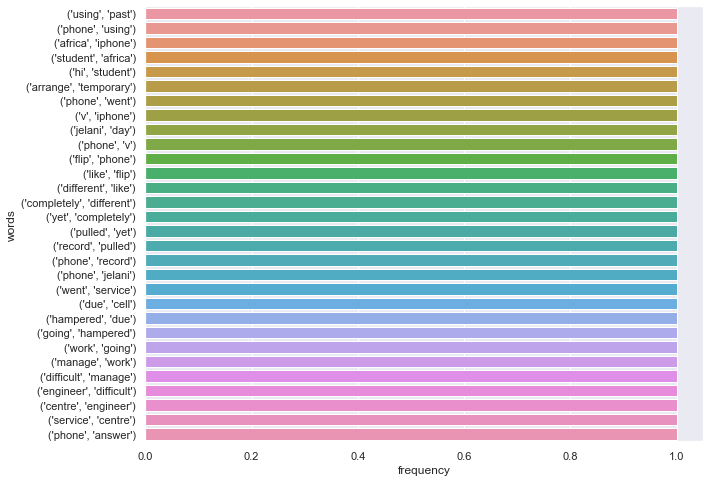

In [647]:
#fig, axes = plt.subplots(ax.set_ylim(1.5, 5.5),figsize=(8,20))
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='frequency',y='words',data=viz.tail(30))
#sns.barplot(x='frequency',y='words',data=rfw2.head(30))
#plt.savefig('proton_pos.png', dpi=300, bbox_inches='tight')
plt.show()

In [474]:
#for word cloud

# Select frequent feature threshold as (max_count)/100 
# This is an arbitrary decision as of now.
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = res
#threshold=66

#print("Threshold:" + str(threshold))

frequent_features2 = list()

for feature, count in feature_count.items():
    if count >= threshold:
        if feature in sorted(feature_count, key=feature_count.get, reverse=True)[:500]:
            frequent_features2.append(feature)
#print(' Features:')
#frequent_features=frequent_features[0:3]
#frequent_features

In [475]:
#absa_list = dict()
final_dict2 = []
# For each frequent feature
for f in frequent_features2:
    for comment in df_list:
        #q = '|'.join(f.split())
        #q=" ".join(set(i.split()))
        #find = re.search(r'\w*(' + str(f) + ')\w*', str(comment))
        if re.search(r'\w*(' + str(f) + ')\w*', str(comment)):
            if comment not in final_dict2:
            #absa_list[f].append(sentence)
                final_dict2.append(comment)

In [476]:
len(final_dict2)

5030

In [494]:
cn = 0
for f in test_list:
    if re.search(r'\w*(' + "vivo" + ')\w*', str(f)):
        cn+=1
  #      print(f)
cn

68

In [538]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
words = ['oppo','iphone','samsung','vivo','huawei','xiomi']
#=" ".join(words())

In [572]:
#filter_word = []
oppo_count=0
xiaomi_count=0
huawei_count=0
samsung_count=0
apple_count=0
sony_count=0
vivo_count=0
motorola_count=0
asus_count=0
nokia_count=0

for word in test_list:
    if re.search(r'\w*(' + 'oppo' + ')\w*', str(word)):
        oppo_count+=1
    elif re.search(r'\w*(' + 'xiaomi' + ')\w*', str(word)):
        xiaomi_count+=1
    elif re.search(r'\w*(' + 'huawei' + ')\w*', str(word)):
        huawei_count+=1
    elif re.search(r'\w*(' + 'samsung' + ')\w*', str(word)):
        samsung_count+=1
    elif re.search(r'\w*(' + 'apple' + ')\w*', str(word)):
        apple_count+=1
    elif re.search(r'\w*(' + 'sony' + ')\w*', str(word)):
        sony_count+=1
    elif re.search(r'\w*(' + 'vivo' + ')\w*', str(word)):
        vivo_count+=1
    elif re.search(r'\w*(' + 'motorola' + ')\w*', str(word)):
        motorola_count+=1
    elif re.search(r'\w*(' + 'asus' + ')\w*', str(word)):
        asus_count+=1
    elif re.search(r'\w*(' + 'nokia' + ')\w*', str(word)):
        nokia_count+=1
        
#filter_word.append(word)
print(oppo_count)
print(xiaomi_count)
print(huawei_count)
print(samsung_count)
print(apple_count)
print(sony_count)
print(vivo_count)
print(motorola_count)
print(asus_count)
print(nokia_count)

227
109
209
378
444
57
34
41
26
59


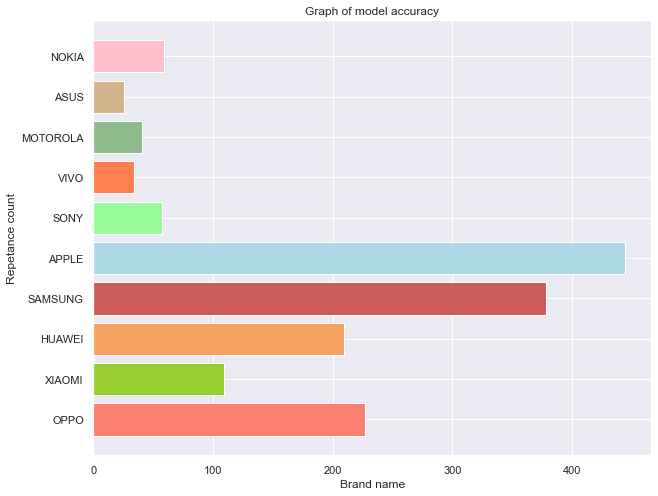

In [662]:
height = [oppo_count,xiaomi_count,huawei_count,samsung_count,apple_count,sony_count,vivo_count,motorola_count,asus_count
          ,nokia_count]
bars = ('OPPO',"XIAOMI",'HUAWEI','SAMSUNG','APPLE','SONY','VIVO','MOTOROLA','ASUS','NOKIA')
x_pos = np.arange(len(bars))

plt.figure(figsize=(10,8))
 
# Create bars
plt.barh(x_pos, height,color=['salmon','yellowgreen','sandybrown','indianred','lightblue','palegreen','coral','darkseagreen','tan','pink'])
 
# Create names on the x-axis
plt.yticks(x_pos, bars)
plt.title('Graph of model accuracy')
plt.xlabel('Brand name')
plt.ylabel('Repetance count')
plt.savefig('accuracy.png', dpi=300, bbox_inches='tight')